In [1]:
class Parent:
    def __init__(self):
        self.parent_var = "I am from Parent"


class Child(Parent):
    def __init__(self):
        super().__init__()  # Calls Parent's __init__()
        self.child_var = "I am from Child"


child = Child()
print(child.parent_var)  # Output: I am from Parent
print(child.child_var)  # Output: I am from Child

I am from Parent
I am from Child


In Python, **child classes inherit instance variables initialized in the `__init__()` method or assigned to `self` in the parent class**. However, the behavior depends on whether the child class calls the parent's `__init__()` method explicitly. Let's break this down:

### 1. **Variables in `__init__()` of Parent Class**
If a variable is initialized in the parent class's `__init__()` method, it belongs to the parent class's instance. For the child class to access those variables, the parent class's `__init__()` must be explicitly invoked, either directly or through `super()`.

#### Example:
```python
class Parent:
    def __init__(self):
        self.parent_var = "I am from Parent"

class Child(Parent):
    def __init__(self):
        super().__init__()  # Calls Parent's __init__()
        self.child_var = "I am from Child"

child = Child()
print(child.parent_var)  # Output: I am from Parent
print(child.child_var)   # Output: I am from Child
```

If the parent's `__init__()` is not called, the `parent_var` will not exist in the child instance.

#### Example without `super()`:
```python
class Parent:
    def __init__(self):
        self.parent_var = "I am from Parent"

class Child(Parent):
    def __init__(self):
        self.child_var = "I am from Child"

child = Child()
print(child.child_var)  # Output: I am from Child
# print(child.parent_var)  # AttributeError: 'Child' object has no attribute 'parent_var'
```

### 2. **Variables Assigned to `self` Outside `__init__()`**
Variables assigned to `self` in methods other than `__init__()` are still instance variables. If a child class calls such a method from the parent class, the variable will be accessible in the child instance.

#### Example:
```python
class Parent:
    def set_var(self):
        self.dynamic_var = "Set outside __init__"

class Child(Parent):
    pass

child = Child()
child.set_var()  # Calls the parent method
print(child.dynamic_var)  # Output: Set outside __init__
```

### Key Points:
1. **`super()` or explicit call**: To inherit variables from the parent's `__init__()`, the child class must call the parent's `__init__()` explicitly (e.g., `super().__init__()`).
2. **Inheritance of methods**: If the child calls methods from the parent that assign instance variables, those variables will be inherited as part of the instance.
3. **Separate `__init__()` in child**: If the child defines its own `__init__()` without calling the parent's `__init__()`, it must handle initializing variables from the parent class manually if needed.

Let me know if you need further clarification!

# How is data abstraction accomplished?
Data abstraction is accomplished with the help of abstract methods or abstract classes.

Data abstraction in object-oriented programming is the process of hiding implementation details and exposing only the essential features or functionalities of an object. This allows users to interact with the object without needing to understand the underlying complexity.

In Python, **data abstraction** is achieved using **abstract methods** and **abstract classes**. Here's how they work:

---

### 1. **Abstract Classes**
An **abstract class** is a class that cannot be instantiated directly. It serves as a blueprint for other classes. Abstract classes are created using the `abc` module (`abc` stands for Abstract Base Classes).

#### Key Points:
- An abstract class can have both concrete (implemented) methods and abstract methods.
- It provides a template for derived (child) classes to follow.
- Abstract classes ensure that derived classes implement specific methods.

#### Example:
```python
from abc import ABC, abstractmethod

class Animal(ABC):  # Abstract class
    @abstractmethod
    def make_sound(self):
        pass  # Abstract method (must be implemented in child classes)

    def sleep(self):
        print("Sleeping...")  # Concrete method (optional to override)

class Dog(Animal):  # Child class
    def make_sound(self):
        print("Woof!")

class Cat(Animal):  # Another child class
    def make_sound(self):
        print("Meow!")

# Abstract class cannot be instantiated
# animal = Animal()  # TypeError: Can't instantiate abstract class

dog = Dog()
dog.make_sound()  # Output: Woof!
dog.sleep()       # Output: Sleeping...

cat = Cat()
cat.make_sound()  # Output: Meow!
```

---

### 2. **Abstract Methods**
An **abstract method** is a method that is declared but not implemented in the abstract class. It is marked with the `@abstractmethod` decorator from the `abc` module.

#### Key Points:
- Abstract methods must be overridden in any non-abstract subclass.
- If a subclass does not implement all abstract methods, it remains abstract and cannot be instantiated.

#### Example:
```python
from abc import ABC, abstractmethod

class Shape(ABC):  # Abstract class
    @abstractmethod
    def area(self):
        pass  # Must be implemented by subclasses

    @abstractmethod
    def perimeter(self):
        pass  # Must be implemented by subclasses

class Rectangle(Shape):  # Concrete class
    def __init__(self, width, height):
        self.width = width
        self.height = height

    def area(self):
        return self.width * self.height

    def perimeter(self):
        return 2 * (self.width + self.height)

# shape = Shape()  # TypeError: Can't instantiate abstract class
rect = Rectangle(4, 5)
print(rect.area())       # Output: 20
print(rect.perimeter())  # Output: 18
```

---

### 3. **Advantages of Data Abstraction**
- **Hides implementation details**: Users interact with high-level interfaces and don't need to know the underlying complexity.
- **Enforces design contracts**: Abstract classes ensure that derived classes implement required methods.
- **Encourages code reuse**: Common functionality can be defined in the abstract class, reducing duplication in subclasses.

---

### 4. **Additional Notes**
- Abstract classes are not mandatory for abstraction in Python. Interfaces can also be defined using normal methods or protocols (like in duck typing).
- While Python uses `@abstractmethod` for abstraction, other languages (like Java and C++) achieve abstraction through similar constructs, such as interfaces or abstract classes.

Let me know if you'd like to explore more examples or details!

In C++, **data abstraction** is achieved using **abstract classes** and **pure virtual functions**. These concepts allow you to define a blueprint for derived classes while hiding implementation details from the user.

---

### **1. Abstract Classes in C++**
An **abstract class** is a class that has at least one **pure virtual function**. A pure virtual function is a function that is declared in a class but is not implemented in it. Instead, it must be implemented by derived classes.

#### Key Points:
- A pure virtual function is declared using the `= 0` syntax.
- Abstract classes cannot be instantiated directly.
- Derived classes must provide implementations for all pure virtual functions, or they will also become abstract classes.

---

### **2. Example of Data Abstraction in C++**

```cpp
#include <iostream>
using namespace std;

// Abstract class
class Shape {
public:
    // Pure virtual functions (abstract methods)
    virtual void area() const = 0;
    virtual void perimeter() const = 0;

    // Concrete method
    void description() const {
        cout << "This is a shape.\n";
    }
};

// Derived class for Rectangle
class Rectangle : public Shape {
private:
    double width, height;

public:
    Rectangle(double w, double h) : width(w), height(h) {}

    void area() const override {
        cout << "Area of Rectangle: " << width * height << endl;
    }

    void perimeter() const override {
        cout << "Perimeter of Rectangle: " << 2 * (width + height) << endl;
    }
};

// Derived class for Circle
class Circle : public Shape {
private:
    double radius;

public:
    Circle(double r) : radius(r) {}

    void area() const override {
        cout << "Area of Circle: " << 3.14159 * radius * radius << endl;
    }

    void perimeter() const override {
        cout << "Perimeter of Circle: " << 2 * 3.14159 * radius << endl;
    }
};

int main() {
    // Abstract class cannot be instantiated
    // Shape shape; // Error: Cannot instantiate abstract class

    // Use pointers or references to work with derived classes polymorphically
    Shape* rect = new Rectangle(4, 5);
    Shape* circle = new Circle(3);

    rect->description();  // Concrete method in the base class
    rect->area();
    rect->perimeter();

    circle->description();  // Concrete method in the base class
    circle->area();
    circle->perimeter();

    delete rect;
    delete circle;

    return 0;
}
```

---

### **3. Output**
```
This is a shape.
Area of Rectangle: 20
Perimeter of Rectangle: 18
This is a shape.
Area of Circle: 28.2735
Perimeter of Circle: 18.8496
```

---

### **4. Key Concepts in C++ Data Abstraction**

1. **Pure Virtual Functions**:
   - Declared using `virtual return_type function_name() = 0;`.
   - Enforces derived classes to provide their own implementation.

2. **Abstract Classes**:
   - A class with at least one pure virtual function.
   - Cannot be instantiated directly.

3. **Polymorphism**:
   - Abstract classes and pure virtual functions enable **runtime polymorphism**, where derived class objects can be used through base class pointers or references.

4. **Encapsulation**:
   - Along with abstraction, encapsulation (using `private`, `protected`, and `public` access specifiers) ensures that internal details of the class are hidden from the outside.

---

### **5. Advantages of Data Abstraction in C++**
- **Hides implementation details**: Users interact only with high-level interfaces.
- **Promotes modularity**: Allows separate development and maintenance of base and derived classes.
- **Ensures extensibility**: New derived classes can be added without changing the base class.

---

If you have further questions or need clarification, feel free to ask!

# What is an abstract class?
An abstract class is a special class containing abstract methods. The significance of abstract class is that the abstract methods inside it are not implemented and only declared. So as a result, when a subclass inherits the abstract class and needs to use its abstract methods, they need to define and implement them.



16. What is meant by Garbage Collection in OOPs world?
Object-oriented programming revolves around entities like objects. Each object consumes memory and there can be multiple objects of a class. So if these objects and their memories are not handled properly, then it might lead to certain memory-related errors and the system might fail.

Garbage collection refers to this mechanism of handling the memory in the program. Through garbage collection, the unwanted memory is freed up by removing the objects that are no longer needed.



# 18. What is Compile time Polymorphism and how is it different from Runtime Polymorphism?


**Compile-time polymorphism** and **runtime polymorphism** are two types of polymorphism in object-oriented programming. They differ in how and when the method to be executed is determined.

---

### **1. Compile-time Polymorphism**
Also known as **static polymorphism** or **early binding**, compile-time polymorphism occurs when the method to be executed is determined at **compile time**.

#### Achieved Through:
- **Function Overloading**: Defining multiple functions with the same name but different parameter lists.
- **Operator Overloading**: Defining custom behavior for operators.

#### Key Features:
- The compiler decides which method to invoke based on the method signature.
- It is faster since the decision is made at compile time.
- No runtime overhead.

#### Example (C++):
```cpp
#include <iostream>
using namespace std;

class Calculator {
public:
    // Function Overloading
    int add(int a, int b) {
        return a + b;
    }

    double add(double a, double b) {
        return a + b;
    }

    int add(int a, int b, int c) {
        return a + b + c;
    }
};

int main() {
    Calculator calc;
    cout << calc.add(3, 4) << endl;        // Output: 7
    cout << calc.add(3.5, 2.5) << endl;    // Output: 6
    cout << calc.add(1, 2, 3) << endl;     // Output: 6
    return 0;
}
```

---

### **2. Runtime Polymorphism**
Also known as **dynamic polymorphism** or **late binding**, runtime polymorphism occurs when the method to be executed is determined at **runtime**.

#### Achieved Through:
- **Function Overriding**: Redefining a method in a derived class that exists in the base class.
- Requires the use of **virtual functions** in C++ to achieve dynamic binding.

#### Key Features:
- The decision about which method to invoke is made during program execution.
- Enables polymorphism through inheritance.
- Involves runtime overhead due to dynamic dispatch (vtable lookup).

#### Example (C++):
```cpp
#include <iostream>
using namespace std;

class Animal {
public:
    virtual void sound() {  // Virtual function
        cout << "Animal makes a sound" << endl;
    }
};

class Dog : public Animal {
public:
    void sound() override {  // Overriding the base class method
        cout << "Dog barks" << endl;
    }
};

class Cat : public Animal {
public:
    void sound() override {
        cout << "Cat meows" << endl;
    }
};

int main() {
    Animal* animal;
    Dog dog;
    Cat cat;

    animal = &dog;
    animal->sound();  // Output: Dog barks

    animal = &cat;
    animal->sound();  // Output: Cat meows

    return 0;
}
```

---

### **3. Key Differences Between Compile-time and Runtime Polymorphism**

| Feature                     | Compile-time Polymorphism               | Runtime Polymorphism                  |
|-----------------------------|------------------------------------------|---------------------------------------|
| **Binding Time**            | Happens at compile time (early binding).| Happens at runtime (late binding).   |
| **Implementation**          | Achieved via function/operator overloading.| Achieved via function overriding.    |
| **Speed**                   | Faster, as it is resolved at compile time.| Slower, due to runtime method resolution.|
| **Flexibility**             | Less flexible, determined at compile time.| More flexible, allows dynamic behavior.|
| **Inheritance**             | Does not require inheritance.           | Requires inheritance and virtual functions.|
| **Overhead**                | No runtime overhead.                    | Runtime overhead due to dynamic dispatch. |

---

### **4. Practical Usage**
- **Compile-time polymorphism** is useful when the behavior can be determined based on input types or number of arguments (e.g., overloading operators, mathematical functions).
- **Runtime polymorphism** is ideal for scenarios where the exact behavior depends on the specific type of the object at runtime (e.g., designing extensible systems with a base class and derived classes).

Let me know if you need more details!

**Encapsulation** is one of the core principles of object-oriented programming (OOP). It refers to the bundling of **data (variables)** and **methods (functions)** that operate on that data into a single unit, typically a class, while restricting direct access to some components. This helps protect the integrity of the data and ensures that it is accessed and modified only in controlled ways.

---

### **Key Features of Encapsulation**

1. **Data Hiding**:
   - By restricting access to certain parts of an object, encapsulation hides the internal implementation details from the outside world.
   - Access modifiers (`private`, `protected`, `public` in C++/Java) are used to control visibility.

2. **Controlled Access**:
   - Access to the data is provided through **getter** and **setter** methods, allowing controlled read/write operations.

3. **Improved Security**:
   - Sensitive data is protected from accidental or malicious modification.

4. **Modularity**:
   - Encapsulation promotes modularity, as changes to the internal implementation do not affect the external interface.

---

### **Example in C++**

```cpp
#include <iostream>
#include <string>
using namespace std;

class BankAccount {
private:
    // Private data members
    string accountHolder;
    double balance;

public:
    // Constructor
    BankAccount(string name, double initialBalance) {
        accountHolder = name;
        balance = initialBalance > 0 ? initialBalance : 0;  // Ensure non-negative balance
    }

    // Getter for account holder
    string getAccountHolder() const {
        return accountHolder;
    }

    // Getter for balance
    double getBalance() const {
        return balance;
    }

    // Method to deposit money
    void deposit(double amount) {
        if (amount > 0) {
            balance += amount;
            cout << "Deposited: $" << amount << endl;
        } else {
            cout << "Invalid deposit amount!" << endl;
        }
    }

    // Method to withdraw money
    void withdraw(double amount) {
        if (amount > 0 && amount <= balance) {
            balance -= amount;
            cout << "Withdrew: $" << amount << endl;
        } else {
            cout << "Invalid withdrawal amount!" << endl;
        }
    }
};

int main() {
    BankAccount account("Zohaib", 1000);

    // Accessing data through methods
    cout << "Account Holder: " << account.getAccountHolder() << endl;
    cout << "Balance: $" << account.getBalance() << endl;

    // Depositing and withdrawing
    account.deposit(500);
    account.withdraw(300);

    // Direct access to private members is not allowed
    // account.balance = 2000; // Error: 'balance' is private

    cout << "Final Balance: $" << account.getBalance() << endl;

    return 0;
}
```

---

### **Output**

```
Account Holder: Zohaib
Balance: $1000
Deposited: $500
Withdrew: $300
Final Balance: $1200
```

---

### **Advantages of Encapsulation**

1. **Improved Code Security**:
   - Prevents unauthorized access to critical data.
   
2. **Code Maintainability**:
   - Changes in implementation details can be made without affecting external code that uses the class.

3. **Reusability**:
   - Encapsulation makes it easier to reuse and modify the code.

4. **Flexibility**:
   - Encapsulation allows controlled access to the data through well-defined interfaces (getters and setters).

---

### **Key Concepts Related to Encapsulation**
- **Access Modifiers**:
  - **Private**: Accessible only within the class.
  - **Protected**: Accessible within the class and derived classes.
  - **Public**: Accessible from anywhere.

- **Getter and Setter Methods**:
  - Provide controlled access to private members.

---

If you have further questions or need clarification, feel free to ask!

### **Polymorphism: A Technical Explanation**

Polymorphism is a fundamental concept in object-oriented programming (OOP) that allows entities such as functions, methods, or objects to take on multiple forms. It provides a unified interface to different underlying types, enabling flexibility and extensibility in software design.

The term *polymorphism* comes from the Greek words *poly* (many) and *morph* (form), and in software development, it refers to the ability of a single interface to represent different data types or perform different tasks.

---

### **Types of Polymorphism**

Polymorphism is typically categorized into two types based on when the method to be executed is determined:

#### **1. Compile-time Polymorphism (Static Binding/Early Binding)**
- **Definition**: The method to be executed is determined at compile time. This is achieved through method overloading or operator overloading.
- **Implementation**: Function or operator overloading allows multiple functions/operators with the same name but different signatures (parameters or types).
- **Example**: Overloading a `print()` function to handle integers, strings, or floats.

```cpp
#include <iostream>
using namespace std;

class Printer {
public:
    void print(int i) {
        cout << "Printing integer: " << i << endl;
    }

    void print(double d) {
        cout << "Printing double: " << d << endl;
    }

    void print(string s) {
        cout << "Printing string: " << s << endl;
    }
};

int main() {
    Printer p;
    p.print(42);        // Calls print(int)
    p.print(3.14);      // Calls print(double)
    p.print("Hello");   // Calls print(string)
    return 0;
}
```

---

#### **2. Runtime Polymorphism (Dynamic Binding/Late Binding)**
- **Definition**: The method to be executed is determined at runtime. This is typically achieved through method overriding using inheritance and virtual functions.
- **Implementation**: A base class defines a method as `virtual`, allowing derived classes to override its implementation. A pointer or reference to the base class is used to call the method, and the actual method invoked depends on the type of the object at runtime.
- **Example**: Overriding a `speak()` method in a base class `Animal` with derived classes `Dog` and `Cat`.

```cpp
#include <iostream>
using namespace std;

class Animal {
public:
    virtual void speak() {  // Virtual function
        cout << "Animal speaks" << endl;
    }
};

class Dog : public Animal {
public:
    void speak() override {  // Override base class method
        cout << "Dog barks" << endl;
    }
};

class Cat : public Animal {
public:
    void speak() override {
        cout << "Cat meows" << endl;
    }
};

int main() {
    Animal* animal;

    Dog dog;
    Cat cat;

    animal = &dog;
    animal->speak();  // Output: Dog barks (runtime decision)

    animal = &cat;
    animal->speak();  // Output: Cat meows (runtime decision)

    return 0;
}
```

---

### **Advantages of Polymorphism**

1. **Extensibility**:
   - New classes can be introduced without modifying existing code, as long as they conform to the interface.

2. **Code Reusability**:
   - The same interface can handle objects of different types, reducing duplication.

3. **Improved Maintainability**:
   - Changes to a base class method automatically propagate to derived classes.

4. **Dynamic Behavior**:
   - The ability to decide at runtime which method to invoke allows for flexible and adaptive code.

---

### **Use Cases**

1. **Frameworks and Libraries**:
   - APIs often use polymorphism to allow developers to extend functionality without altering the core library.

2. **UI Design**:
   - A base `Widget` class can define methods like `draw()` and `resize()`, which are overridden by derived classes like `Button`, `TextBox`, and `Slider`.

3. **Game Development**:
   - A base `GameObject` class with methods like `update()` and `render()` can be overridden by derived classes like `Player`, `Enemy`, and `Projectile`.

---

### **Comparison: Compile-time vs. Runtime Polymorphism**

| Feature                     | Compile-time Polymorphism               | Runtime Polymorphism                  |
|-----------------------------|------------------------------------------|---------------------------------------|
| **Binding Time**            | At compile time (early binding).         | At runtime (late binding).            |
| **Mechanism**               | Function/Operator overloading.           | Function overriding with virtual functions. |
| **Performance**             | Faster, no runtime overhead.             | Slower due to dynamic dispatch.       |
| **Inheritance Required**    | No.                                      | Yes.                                  |
| **Flexibility**             | Less flexible, determined at compile time.| More flexible, determined at runtime. |

---

### **Polymorphism in Design Patterns**
Polymorphism is a key enabler for many design patterns:
- **Strategy Pattern**: Allows a family of algorithms to be defined and interchanged at runtime.
- **Factory Pattern**: Uses polymorphism to return objects of different derived classes.
- **Decorator Pattern**: Dynamically adds behavior to objects.

---

Polymorphism, when used correctly, simplifies complex systems and makes them more adaptable to future changes. However, overuse or misuse can lead to unnecessary complexity and performance overhead, so it’s essential to apply it judiciously.

Yes, that's a great way to put it! Polymorphism in Object-Oriented Programming (OOP) is about **"many forms"** — it allows a single piece of code, method, or object to behave differently depending on the context in which it's used. This is achieved through two primary types of polymorphism:

### **1. Compile-time Polymorphism (Static Polymorphism)**

- **Definition**: The method to be invoked is determined at **compile time**.
- **How It Works**: This type of polymorphism is achieved through **method overloading** (same method name but different parameters) or **operator overloading** (defining how operators like `+`, `-`, etc., work for custom types).
- **Examples**: 
  - **Method Overloading**: Multiple methods with the same name but different parameter types or counts.
  - **Operator Overloading**: Overloading operators to define their behavior for user-defined types (e.g., `+` for custom objects).

**Example in C++ (Method Overloading)**:
```cpp
#include <iostream>
using namespace std;

class Printer {
public:
    void print(int i) {
        cout << "Printing integer: " << i << endl;
    }

    void print(double d) {
        cout << "Printing double: " << d << endl;
    }

    void print(string s) {
        cout << "Printing string: " << s << endl;
    }
};

int main() {
    Printer p;
    p.print(42);        // Calls print(int)
    p.print(3.14);      // Calls print(double)
    p.print("Hello");   // Calls print(string)
    return 0;
}
```

**Output**:
```
Printing integer: 42
Printing double: 3.14
Printing string: Hello
```

### **2. Runtime Polymorphism (Dynamic Polymorphism)**

- **Definition**: The method to be invoked is determined at **runtime**, i.e., when the program is running, not when it is compiled.
- **How It Works**: This type of polymorphism is achieved through **method overriding**. A method in a base class is declared as `virtual`, and it is overridden in derived classes. The actual method called is determined by the type of the object, not the type of the reference or pointer.
- **Examples**:
  - **Method Overriding**: A derived class provides a specific implementation of a method that was declared in a base class.
  
**Example in C++ (Method Overriding)**:
```cpp
#include <iostream>
using namespace std;

class Animal {
public:
    virtual void speak() {  // Virtual function for runtime polymorphism
        cout << "Animal speaks" << endl;
    }
};

class Dog : public Animal {
public:
    void speak() override {  // Override base class method
        cout << "Dog barks" << endl;
    }
};

class Cat : public Animal {
public:
    void speak() override {
        cout << "Cat meows" << endl;
    }
};

int main() {
    Animal* animal;

    Dog dog;
    Cat cat;

    animal = &dog;
    animal->speak();  // Output: Dog barks (runtime decision)

    animal = &cat;
    animal->speak();  // Output: Cat meows (runtime decision)

    return 0;
}
```

**Output**:
```
Dog barks
Cat meows
```

---

### **Key Differences between Compile-time and Runtime Polymorphism**

| Feature                       | **Compile-time Polymorphism**                 | **Runtime Polymorphism**                |
|-------------------------------|-----------------------------------------------|-----------------------------------------|
| **Binding Time**               | The method is bound at compile time (early binding). | The method is bound at runtime (late binding). |
| **Mechanism**                  | Method Overloading, Operator Overloading.      | Method Overriding with Virtual Functions. |
| **Performance**                | Faster execution (no overhead).               | Slower execution (due to dynamic dispatch). |
| **Inheritance**                | Not required.                                 | Requires inheritance and virtual functions. |
| **Flexibility**                | Less flexible, method signatures must be known at compile time. | More flexible, allows dynamic method resolution. |
| **Example**                    | Function/Operator overloading.                | Virtual function overriding in derived classes. |

---

### **Why Polymorphism Matters**

- **Code Reusability**: By using polymorphism, you can design more general, reusable code. The same code can handle different types of objects or data, reducing redundancy.
- **Extensibility**: Polymorphism makes it easier to extend and modify the behavior of programs. New derived classes can be added without changing existing code, promoting the **open/closed principle** (open for extension, closed for modification).
- **Maintainability**: It helps in maintaining the code since behavior can be updated in derived classes without affecting the base class or other parts of the code.

---

### **In Summary:**
Polymorphism in OOP enables objects or methods to take on multiple forms, making your code more flexible and extensible. It’s classified into:
- **Compile-time Polymorphism**: The decision of which method to call is made during compilation (e.g., method overloading).
- **Runtime Polymorphism**: The decision of which method to call is made at runtime (e.g., method overriding with virtual functions).

If you need further clarification or examples, feel free to ask!

# How much memory does a class occupy?
Classes do not consume any memory. They are just a blueprint based on which objects are created. Now when objects are created, they actually initialize the class members and methods and therefore consume memory.



In C++, **classes** and **structures** are very similar in terms of their functionality, but they have some key differences primarily related to default access control and their intended use. Here's a detailed comparison:

### **Key Differences Between a Class and a Structure in C++**

| Feature                         | **Class**                                    | **Structure**                              |
|----------------------------------|----------------------------------------------|--------------------------------------------|
| **Default Access Modifier**     | `private` by default                         | `public` by default                        |
| **Intended Use**                 | Used for defining complex data types, often with encapsulation and behavior (methods). | Typically used for grouping data together, with less emphasis on encapsulation and behavior. |
| **Access Control**               | Can have private, protected, and public members. | Can have public members, but access control can be explicitly specified (e.g., `private`, `protected`). |
| **Member Functions**             | Can have member functions, constructors, destructors, and accessors/mutators. | Can also have member functions, but historically used more for simple data grouping. |
| **Inheritance**                  | Supports inheritance, polymorphism, and other OOP features. | Supports inheritance (from C++ onward), but generally used for simpler data types. |
| **Memory Layout**                | Same memory layout as `struct`, no difference in terms of memory storage. | Same memory layout as `class`.             |

### **1. Default Access Control:**
- **Class**: By default, all members (variables and functions) are `private`, meaning they cannot be accessed directly from outside the class.
  ```cpp
  class MyClass {
      int x;  // private by default
  };
  ```
- **Structure**: By default, all members are `public`, meaning they can be accessed directly from outside the structure.
  ```cpp
  struct MyStruct {
      int x;  // public by default
  };
  ```

### **2. Default Use Cases:**
- **Class**: Classes are typically used when you want to model more complex behavior, where encapsulation (hiding implementation details) and data manipulation are important. Classes allow for features like **constructors**, **destructors**, **private members**, and **inheritance**.
- **Structure**: Structures were originally designed for simpler use cases, where the focus is on grouping related data without the need for complex behavior or encapsulation. Historically, structures were used for "plain old data" (POD) types, but with C++'s introduction of object-oriented features, structures can now also support methods, inheritance, and polymorphism.

### **3. Member Functions and Access Control:**
- **Class**: In classes, you can define methods, and the access to these methods can be controlled using `private`, `protected`, or `public` access specifiers.
  ```cpp
  class MyClass {
  private:
      int x;  // private
  public:
      void setX(int val) { x = val; }  // public method
      int getX() { return x; }  // public method
  };
  ```
- **Structure**: In structures, you can also define methods, but traditionally, they were not associated with methods (though this is no longer a restriction in modern C++).
  ```cpp
  struct MyStruct {
      int x;  // public by default
      void setX(int val) { x = val; }  // public method
      int getX() { return x; }  // public method
  };
  ```

### **4. Inheritance and Polymorphism:**
- **Class**: Classes fully support inheritance and polymorphism. You can derive new classes from a base class, and you can override methods, use virtual functions, etc.
  ```cpp
  class Animal {
  public:
      virtual void speak() { cout << "Animal speaks"; }
  };

  class Dog : public Animal {
  public:
      void speak() override { cout << "Dog barks"; }
  };
  ```
- **Structure**: In C++ (since C++11), structures also support inheritance and polymorphism, just like classes.
  ```cpp
  struct Animal {
      virtual void speak() { cout << "Animal speaks"; }
  };

  struct Dog : public Animal {
      void speak() override { cout << "Dog barks"; }
  };
  ```

### **5. Memory Layout:**
- **Class**: Classes and structures have the same memory layout. There is no difference in how they store data in memory. Both have members stored contiguously in memory, but the access control (public/private) does not affect memory layout.
- **Structure**: Like classes, structures are stored contiguously in memory, but historically structures were designed to be simple data containers without methods or encapsulation.

### **6. Constructors and Destructors:**
- **Class**: Classes can have constructors and destructors that allow you to initialize and clean up resources when objects are created and destroyed.
  ```cpp
  class MyClass {
  public:
      MyClass() { cout << "Constructor called"; }
      ~MyClass() { cout << "Destructor called"; }
  };
  ```
- **Structure**: Structures can also have constructors and destructors in modern C++ (since C++11). Earlier, they were used more for simple data storage without complex initialization logic.
  ```cpp
  struct MyStruct {
      MyStruct() { cout << "Constructor called"; }
      ~MyStruct() { cout << "Destructor called"; }
  };
  ```

### **Summary:**
- **Classes** are more versatile and are used to model objects with encapsulation, inheritance, and other OOP features. The members are `private` by default.
- **Structures** are used primarily for grouping data, and historically had a simpler use case. The members are `public` by default.

In modern C++, the difference between a class and a structure is minimal, as both can support methods, inheritance, and other object-oriented features. The main distinction remains the default access control: `private` for classes and `public` for structures.



# ML

# why is dimensionality reduction used in ml?



Dimensionality reduction is a key technique in machine learning (ML) and data analysis used to reduce the number of input variables (features) in a dataset while retaining as much of the relevant information as possible. The main reasons for using dimensionality reduction are:

### 1. **Reducing Computational Complexity**
   - **Less computation**: High-dimensional data often requires a significant amount of computational resources for both training models and making predictions. Reducing the number of features helps speed up the training and inference processes.
   - **Memory efficiency**: A reduced number of features means less memory usage, which is crucial when dealing with large datasets, especially in environments with limited resources.

### 2. **Mitigating the Curse of Dimensionality**
   - As the number of dimensions (features) increases, the volume of the feature space grows exponentially. This makes the data sparse, and models may struggle to generalize well. The "curse of dimensionality" refers to the issues caused by high-dimensional spaces, such as overfitting, where the model captures noise instead of the underlying pattern.
   - Dimensionality reduction helps mitigate these issues by reducing the number of irrelevant or redundant features.

### 3. **Improving Model Performance**
   - **Avoid overfitting**: In high-dimensional spaces, models are more likely to overfit because they may learn noise as part of the pattern. By reducing the dimensionality, we reduce the risk of overfitting, leading to better generalization.
   - **Improved interpretability**: In many cases, reducing the number of features makes the model easier to interpret. This is especially important in fields like healthcare or finance, where understanding the model’s decisions is critical.

### 4. **Visualization and Exploration**
   - **Data visualization**: Dimensionality reduction is particularly useful for visualizing high-dimensional data. By projecting the data into 2D or 3D spaces, you can plot the data and gain insights into the underlying patterns. Techniques like PCA (Principal Component Analysis) or t-SNE (t-Distributed Stochastic Neighbor Embedding) are commonly used for this purpose.
   - **Pattern recognition**: Reducing the number of features can help reveal hidden structures or clusters in the data, making it easier to identify important relationships between features.

### 5. **Removing Redundancy and Noise**
   - **Feature selection**: Many features in a dataset are often highly correlated or redundant. Dimensionality reduction can identify and eliminate such redundant features, retaining only the most important ones that contribute to the variance in the data.
   - **Noise reduction**: By projecting the data into a lower-dimensional space, dimensionality reduction techniques often discard noisy, irrelevant information that does not contribute to the primary patterns in the data.

### 6. **Enhancing Performance of Machine Learning Algorithms**
   - Some machine learning algorithms perform better with lower-dimensional data because they can be more efficient and avoid the curse of dimensionality. For example, algorithms like k-nearest neighbors (KNN) and clustering algorithms like k-means can become inefficient and inaccurate in high-dimensional spaces.

### 7. **Improving Data Preprocessing**
   - **Data cleaning**: Dimensionality reduction can help in identifying irrelevant or unimportant features, which can be removed during the preprocessing stage, improving the quality of the dataset.
   - **Noise filtering**: In datasets with noisy features, dimensionality reduction helps focus on the more significant features and reduce the influence of noisy data points.

### Common Dimensionality Reduction Techniques:
1. **Principal Component Analysis (PCA)**: A linear method that projects data onto a smaller number of orthogonal dimensions (principal components) that capture the maximum variance in the data.
2. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: A non-linear method particularly useful for visualizing high-dimensional data in 2D or 3D spaces.
3. **Linear Discriminant Analysis (LDA)**: A technique used for dimensionality reduction that focuses on maximizing the separability between classes.
4. **Autoencoders**: Neural network-based methods that learn a compressed representation of the data, often used in unsupervised learning for feature extraction.

### Conclusion:
Dimensionality reduction is essential in machine learning for simplifying the model, improving performance, reducing computational overhead, and enhancing data visualization. It is especially useful when dealing with high-dimensional datasets, as it helps mitigate problems like overfitting and the curse of dimensionality while preserving important information in the data.

Yes, **L1 regularization** can indeed help with dimensionality reduction, particularly in the context of **feature selection**.

### How L1 Regularization Helps with Dimensionality Reduction:

L1 regularization (also known as **Lasso** in the context of linear models) works by adding a penalty to the model's cost function that is proportional to the absolute values of the model's coefficients. The key property of L1 regularization is that it encourages **sparsity** in the learned coefficients.

### Mechanism of L1 Regularization:
- **Sparsity**: During training, L1 regularization drives many of the coefficients to **zero**. This results in a model where only a subset of the features have non-zero coefficients, effectively **selecting** the most important features and discarding the irrelevant ones.
- **Feature selection**: By setting less important feature coefficients to zero, L1 regularization effectively performs **automatic feature selection**, which can be seen as a form of **dimensionality reduction**. This is especially useful when dealing with datasets that have a large number of features, as it helps focus on the most relevant ones.
  
### L1 Regularization and Dimensionality Reduction:
While **L1 regularization** does not directly reduce the dimensionality in the same way as techniques like **Principal Component Analysis (PCA)**, it can still be considered a form of dimensionality reduction because:
1. **Sparse solutions**: L1 regularization leads to sparse solutions where many features have zero weights, thus reducing the effective number of features used by the model.
2. **Feature selection**: By forcing some features' coefficients to zero, it can automatically discard irrelevant or redundant features, reducing the feature space and helping with model simplification.
3. **Improved interpretability**: Since L1 regularization helps identify the most important features, it can improve the interpretability of the model, as you are left with only the relevant features.

### Example of L1 Regularization (Lasso Regression):
In a linear regression model, L1 regularization modifies the cost function as follows:
\[
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2 + \lambda \sum_{j=1}^{n} |\theta_j|
\]
Where:
- \( \theta \) are the model's parameters (coefficients),
- \( m \) is the number of training examples,
- \( \lambda \) is the regularization parameter,
- \( \sum_{j=1}^{n} |\theta_j| \) is the L1 penalty term that encourages sparsity.

The L1 penalty term forces some coefficients \( \theta_j \) to be exactly zero, thereby eliminating the corresponding features from the model.

### L1 Regularization vs. Dimensionality Reduction Techniques:
- **L1 regularization** is more focused on **feature selection** (i.e., choosing a subset of the most relevant features) rather than projecting data onto a lower-dimensional space.
- Techniques like **PCA** perform **linear transformations** of the data, projecting it into a lower-dimensional space where the most significant variance is captured. In contrast, L1 regularization simply selects a subset of the original features based on their importance.

### Summary:
- **L1 regularization** can help with dimensionality reduction by driving some feature coefficients to zero, effectively selecting a subset of the most relevant features.
- It does **feature selection**, not dimensionality reduction in the strict sense (like PCA or t-SNE), but the result is a model with fewer features, which can lead to reduced complexity and improved performance.
- It is particularly useful when you want to perform feature selection while training a model, and it's especially effective in situations with high-dimensional data.

# Yes, QLoRA (Quantized Low-Rank Adaptation) is essentially a variation of LoRA (Low-Rank Adaptation) with quantization applied. In QLoRA, the model weights are quantized to reduce memory and computational requirements while still leveraging the benefits of LoRA. 

LoRA itself is a technique that adapts pre-trained models by injecting low-rank trainable matrices into the model, allowing for efficient fine-tuning with fewer parameters. By adding quantization, QLoRA further compresses the model, which is particularly useful for large language models, enabling more efficient deployment and reducing the hardware requirements.

Here’s a comparison between **LoRA (Low-Rank Adaptation)** and **QLoRA (Quantized Low-Rank Adaptation)**:

### 1. **Concept**:
   - **LoRA**: It introduces trainable low-rank matrices to a pre-trained model to fine-tune it with fewer parameters. Instead of updating the entire model's weights, LoRA modifies only the low-rank components, which is memory-efficient.
   - **QLoRA**: This is essentially LoRA with **quantization**. It not only uses low-rank adaptation but also quantizes the model weights (or the low-rank matrices) to further reduce the memory footprint and computational cost.

### 2. **Efficiency**:
   - **LoRA**: Reduces the number of parameters that need to be updated during fine-tuning by injecting low-rank matrices, making it more efficient than standard fine-tuning methods.
   - **QLoRA**: Further enhances efficiency by applying quantization to the weights. This reduces the model size even more, allowing it to fit on devices with limited memory and compute resources while retaining performance.

### 3. **Memory Usage**:
   - **LoRA**: Reduces memory usage by storing only the low-rank matrices, which are smaller than the full set of model weights.
   - **QLoRA**: In addition to using low-rank matrices, quantization compresses these matrices further by reducing the precision of the weights (e.g., using 8-bit integers instead of 32-bit floating-point values).

### 4. **Model Size**:
   - **LoRA**: The model size is reduced compared to traditional fine-tuning, but not as much as QLoRA.
   - **QLoRA**: The model size is significantly smaller than LoRA, thanks to quantization, making it more suitable for resource-constrained environments (like edge devices or low-memory GPUs).

### 5. **Training Speed**:
   - **LoRA**: Training is faster compared to traditional fine-tuning since fewer parameters are being updated.
   - **QLoRA**: Training can be even faster in some cases due to reduced memory bandwidth requirements and the efficient use of quantized weights.

### 6. **Performance**:
   - **LoRA**: While it significantly reduces the number of parameters and computational requirements, it still performs well in many fine-tuning tasks, though it may not always reach the same performance as fully fine-tuned models.
   - **QLoRA**: The quantization step may cause some loss in precision, potentially impacting performance slightly. However, it still provides competitive performance with much smaller model sizes and can be a good trade-off when memory and compute are critical constraints.

### 7. **Use Cases**:
   - **LoRA**: Well-suited for fine-tuning large models on tasks where you want to save memory but still need high-quality performance, such as in NLP or computer vision.
   - **QLoRA**: Ideal for deploying models in resource-constrained environments where both memory and computation are limited, such as on mobile devices or low-power edge devices.

### Summary:
- **LoRA** focuses on reducing the number of trainable parameters using low-rank matrices.
- **QLoRA** extends LoRA by applying quantization, which reduces memory usage even further and is beneficial for environments with stricter hardware limitations.

QLoRA is generally more memory-efficient than LoRA but might sacrifice some performance due to the quantization step.

The **vanishing gradient** and **exploding gradient** problems are two common issues encountered during the training of deep neural networks, especially when using gradient-based optimization algorithms like **Stochastic Gradient Descent (SGD)**. Both issues arise due to the behavior of gradients during backpropagation, but they manifest in different ways and have different impacts on training.

### 1. **Vanishing Gradient Problem**

#### Definition:
The **vanishing gradient problem** occurs when the gradients (i.e., the partial derivatives of the loss function with respect to the model parameters) become **extremely small** as they are propagated backward through the network during training. This causes the weights in the earlier layers of the network to update very slowly, or not at all, effectively **stalling** the training process.

#### Cause:
- In deep neural networks, gradients are calculated via the **chain rule** during backpropagation. When gradients are propagated back through layers, they can be repeatedly multiplied by small numbers (for example, the derivatives of activation functions like **sigmoid** or **tanh**, which have small gradients for large positive or negative inputs).
- If the weights or activation functions cause the gradient to shrink, the gradients of the earlier layers (closer to the input) become **smaller and smaller** as the network depth increases.
  
#### Impact:
- The **earlier layers** of the network (closer to the input) receive very small gradients, making their weights update very slowly or not at all. This can result in poor learning, especially for deep networks, because the model fails to capture complex patterns in the data.
- **Training stagnation**: The model may fail to improve or converge to a good solution because of the insufficient updates to the weights.

#### Common Scenarios:
- **Activation functions like sigmoid and tanh**: These activation functions squash the input into a small range, and their gradients are small for large positive or negative inputs, contributing to the vanishing gradient problem.
- **Deep networks**: The problem becomes more pronounced as the depth of the network increases, because gradients can diminish as they are propagated backward through many layers.

#### Solutions:
- **ReLU (Rectified Linear Unit)** activation function: ReLU helps mitigate the vanishing gradient problem because its gradient is either 0 (for negative inputs) or 1 (for positive inputs), which is less likely to cause gradients to shrink.
- **He initialization**: This initialization method helps maintain the scale of gradients by ensuring that the variance of the weights is appropriately scaled.
- **Batch normalization**: Normalizing the inputs to each layer helps reduce the effect of vanishing gradients by ensuring that activations are on a consistent scale.
- **Skip connections** (Residual Networks): Networks like **ResNets** use skip connections to allow gradients to flow more easily across layers, bypassing certain layers if necessary.

---

### 2. **Exploding Gradient Problem**

#### Definition:
The **exploding gradient problem** occurs when the gradients become **very large** during backpropagation, causing the weights to update by extremely large amounts. This can lead to **instability** in the model, where the model’s weights diverge, making it impossible to find a good solution.

#### Cause:
- Similar to the vanishing gradient problem, the exploding gradient problem arises due to the **chain rule** in backpropagation. However, in this case, the gradients get multiplied by **large values** (e.g., large weights or large derivatives of the activation functions), causing them to grow exponentially as they are propagated back through the network.
- If the weights are not properly initialized or if the learning rate is too high, the gradients can blow up and lead to extremely large updates to the weights.

#### Impact:
- The **weights of the network** can become extremely large, which leads to instability in the training process.
- The model may **diverge** rather than converge to a good solution. In the worst case, the training process can fail completely, with the model’s weights growing to infinity.

#### Common Scenarios:
- **Deep networks with poor initialization**: If the network’s weights are initialized too large, gradients can accumulate and explode as they propagate back through the layers.
- **High learning rates**: If the learning rate is too high, even small gradients can lead to large updates to the weights, causing instability.
- **Activation functions with large derivatives**: Some activation functions can have very large gradients for certain inputs, which can exacerbate the exploding gradient problem.

#### Solutions:
- **Gradient clipping**: This technique involves capping the gradients during backpropagation to a predefined maximum value, preventing them from becoming too large.
- **Weight regularization**: Techniques like **L2 regularization** can help prevent the weights from becoming too large, reducing the chances of exploding gradients.
- **Proper initialization**: Using weight initialization techniques like **Xavier** or **He initialization** helps prevent the gradients from exploding or vanishing.
- **Lower learning rate**: Using a smaller learning rate can help reduce the magnitude of weight updates and prevent gradients from growing too large.

---

### Summary of Differences:

| Feature                  | Vanishing Gradient Problem                          | Exploding Gradient Problem                           |
|--------------------------|------------------------------------------------------|------------------------------------------------------|
| **Cause**                 | Gradients become very small during backpropagation, leading to small weight updates. | Gradients become very large, causing large weight updates. |
| **Impact**                | Causes slow or no learning in the earlier layers, preventing the model from converging. | Causes model instability, where weights can grow uncontrollably and the model fails to converge. |
| **Common Activation Functions** | Sigmoid, tanh, and other saturating activation functions. | Poor weight initialization, large learning rates, or activation functions with large gradients. |
| **Solution**              | Use ReLU or variants, batch normalization, skip connections, He initialization. | Gradient clipping, proper weight initialization, lower learning rates, and regularization. |

Both vanishing and exploding gradients are critical challenges when training deep neural networks, and understanding how to mitigate them is crucial for building effective models.

### **Masked Attention** vs **Bidirectional Attention**:

Both masked attention and bidirectional attention are mechanisms used in attention-based models like transformers, but they are applied in different contexts and serve different purposes. Here's a breakdown of the two:

### 1. **Masked Attention**:
   - **Purpose**: Masked attention is primarily used to **prevent information leakage** from future tokens during training or inference. It is typically used in **autoregressive models** like GPT (Generative Pre-trained Transformer) where the model is trained to predict the next token in a sequence.
   - **How it works**: 
     - In masked attention, during the self-attention process, a **mask** is applied to prevent the model from attending to future tokens. This means that when the model is processing token `i`, it can only attend to tokens from `1` to `i` (or the current token and previous tokens) and not to any future tokens.
     - The mask is usually applied to the attention weights, setting the weights of the future tokens to negative infinity or zero, ensuring that they don't contribute to the current token's attention.
   - **Use case**: This is crucial for tasks where you need to predict the next token in a sequence or generate text in a left-to-right fashion, as in autoregressive models like GPT.

   **Example**: In GPT, when predicting the 5th word, the model is only allowed to attend to words 1 to 4 and not 6 to the end of the sequence.

   - **Pros**:
     - Prevents "cheating" by ensuring the model only has access to past context when predicting the next token.
     - Essential for autoregressive generation.
   - **Cons**:
     - Limits the model's ability to fully understand the context from the entire sequence during training.

### 2. **Bidirectional Attention**:
   - **Purpose**: Bidirectional attention allows the model to **attend to all tokens** in the sequence (both past and future) simultaneously. It is typically used in **non-autoregressive models** like BERT (Bidirectional Encoder Representations from Transformers).
   - **How it works**: 
     - In bidirectional attention, during self-attention, the model can attend to **all tokens** in the sequence (both left and right context). This allows the model to fully capture the context for each token, leading to a richer understanding of the sequence.
     - There is no masking, and the model can attend to the entire sequence in both directions, making it "bidirectional."
   - **Use case**: This is useful for tasks where you need to understand the full context of the sequence at once, such as in **masked language modeling (MLM)** tasks, question answering, or sentence classification.

   **Example**: In BERT, when processing the word "apple" in the sentence "I ate an apple," the model can attend to both "I ate" and "an apple," understanding the context in both directions.

   - **Pros**:
     - Provides a full understanding of the sequence by attending to both past and future tokens.
     - Improves performance on tasks that require a holistic understanding of the entire sequence.
   - **Cons**:
     - Not suitable for autoregressive generation tasks, as the model has access to future tokens during training.

### Key Differences:

| **Feature**               | **Masked Attention**                                     | **Bidirectional Attention**                              |
|---------------------------|----------------------------------------------------------|----------------------------------------------------------|
| **Context**                | Only attends to past tokens (unidirectional).            | Attends to both past and future tokens (bidirectional).   |
| **Use Case**               | Autoregressive tasks (e.g., text generation, GPT).       | Tasks requiring full context understanding (e.g., BERT). |
| **Training Objective**     | Predict the next token given the previous tokens.       | Predict missing tokens using full sequence context.      |
| **Masking**                | Future tokens are masked (not attended to).             | No masking; all tokens can attend to each other.         |
| **Example Models**         | GPT, autoregressive models.                             | BERT, masked language models.                            |

### Summary:
- **Masked Attention**: Used in autoregressive models where future tokens must not be seen during training, ensuring the model predicts tokens sequentially.
- **Bidirectional Attention**: Used in models like BERT where the entire context (both past and future tokens) is available for understanding the sequence. This is typically used for tasks like classification, QA, and other non-generative tasks.

# so only difference is actually what type of mask we use?



Yes, you're right in a way! The key difference between **masked attention** and **bidirectional attention** primarily comes down to the **masking strategy** used during the attention mechanism. Here’s how the masking strategy differentiates them:

### 1. **Masked Attention**:
   - The model uses a **mask** to block access to future tokens. 
   - This mask ensures that the model can only attend to the current token and previous tokens (i.e., tokens on the left of the current position).
   - The mask is typically **causal** or **autoregressive**, where future tokens are prevented from being attended to, which simulates the process of generating text token-by-token.

   **Example**: For the sequence "I ate an apple," when predicting the token "an," the model can only attend to "I ate" (tokens to the left) and not "apple" (tokens to the right).

### 2. **Bidirectional Attention**:
   - In this case, **no mask** is used to block access to any part of the sequence. The model can attend to **all tokens** in the sequence (both past and future) during training.
   - The model has a complete understanding of the entire sequence context at once, which is useful for tasks where understanding the full context is crucial.

   **Example**: In BERT, when processing the word "apple" in the sentence "I ate an apple," the model can attend to both "I ate" and "an apple," utilizing both the left and right context.

### In Summary:
- **Masked Attention** involves applying a **mask** that limits the attention to past tokens only, which is essential for tasks like autoregressive text generation.
- **Bidirectional Attention** doesn't apply any mask and allows the model to attend to both past and future tokens, enabling a richer understanding of the entire sequence, which is great for tasks like sentence classification or masked language modeling.

So yes, the **main difference** lies in the **masking strategy**: masked attention restricts the model’s access to future tokens, while bidirectional attention allows access to the full sequence.

# MAE is not deffernetiable at orgin that's why we use MSE

Actually, the statement that **Mean Absolute Error (MAE)** is not differentiable at the origin is **correct**, but the reasoning for why we might prefer **Mean Squared Error (MSE)** in some cases needs a bit more clarification.

### Differentiability of MAE:
The **Mean Absolute Error (MAE)** is defined as:

\[
MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
\]

Where:
- \( y_i \) is the true value,
- \( \hat{y}_i \) is the predicted value,
- \( n \) is the number of samples.

The issue with MAE arises at the point where the absolute error \( |y_i - \hat{y}_i| \) is **zero** (i.e., when the prediction is exactly correct). This creates a **kink** in the function at the origin (where the error is zero), making the derivative undefined at this point.

Mathematically, the derivative of \( |y_i - \hat{y}_i| \) with respect to \( \hat{y}_i \) is:

\[
\frac{d}{d\hat{y}_i} |y_i - \hat{y}_i| =
\begin{cases}
1 & \text{if } y_i - \hat{y}_i > 0 \\
-1 & \text{if } y_i - \hat{y}_i < 0 \\
\text{undefined} & \text{if } y_i - \hat{y}_i = 0
\end{cases}
\]

The gradient is undefined when \( \hat{y}_i = y_i \), so MAE is **non-differentiable** at the origin.

### Why MSE is Used Instead:
The **Mean Squared Error (MSE)** is defined as:

\[
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\]

Unlike MAE, the squared error function is **differentiable everywhere**, including at the origin. The derivative of \( (y_i - \hat{y}_i)^2 \) is:

\[
\frac{d}{d\hat{y}_i} (y_i - \hat{y}_i)^2 = -2(y_i - \hat{y}_i)
\]

Since this is well-defined and continuous everywhere, **MSE is differentiable at all points**, including when \( \hat{y}_i = y_i \).

### Why MSE is Preferred in Many ML Models:
1. **Smooth Gradient**: The differentiability of MSE at all points (including the origin) provides a smooth gradient, which makes it easier to optimize using gradient-based methods like **Gradient Descent**. This smoothness helps avoid problems during optimization, especially when using deep learning models or more complex regression techniques.

2. **Convexity**: MSE is a **convex function**, meaning that it has a single global minimum. This property is useful for optimization because it ensures that gradient-based optimization algorithms can reliably converge to the optimal solution without getting stuck in local minima.

3. **Smoother Adjustments**: Since MSE squares the error, it tends to penalize larger errors more heavily than MAE. This can lead to a model that fits outliers better, which may be desirable in certain contexts, especially when large errors are undesirable.

### When MAE is Preferred:
Despite MSE being differentiable and often used in practice, **MAE** has its advantages in some cases:
- **Robustness to Outliers**: MAE is less sensitive to large outliers than MSE. Since the error is not squared, large deviations in predictions don't get penalized as heavily, which can be beneficial when outliers are not as important or should not disproportionately affect the model.
- **Interpretability**: MAE is more interpretable because it directly measures the average absolute error in the same units as the data, while MSE gives the error in squared units, which can sometimes be harder to interpret.

### Summary:
- **MAE** is not differentiable at the origin, but it is still useful in many applications, especially when robustness to outliers is desired.
- **MSE** is differentiable everywhere, making it easier to optimize with gradient-based methods and often preferred in many machine learning models.
- The choice between MAE and MSE depends on the specific requirements of the problem, such as sensitivity to outliers or the need for smooth gradients for optimization.

### Linear Regression: A Comprehensive Overview

Linear regression is a fundamental algorithm in machine learning and statistics used to model the relationship between one or more independent variables (features) and a dependent variable (target). Here's an in-depth explanation of linear regression, its equations, and the mathematical flow.

---

## **1. Objective**
The goal of linear regression is to find the best-fit line (or hyperplane in higher dimensions) that minimizes the difference between the predicted values (\(\hat{y}\)) and the actual values (\(y\)).

---

## **2. Hypothesis Function**
In linear regression, the hypothesis function is:
\[
\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p
\]
- \(\hat{y}\): Predicted value.
- \(\beta_0\): Intercept (bias term).
- \(\beta_1, \beta_2, \dots, \beta_p\): Coefficients (weights) of the independent variables.
- \(x_1, x_2, \dots, x_p\): Independent variables (features).

In vectorized form:
\[
\hat{y} = X \beta
\]
- \(X\): Matrix of input features (\(n \times (p+1)\)), where \(n\) is the number of samples and \(p\) is the number of features. The first column is typically 1 to account for \(\beta_0\).
- \(\beta\): Coefficient vector (\((p+1) \times 1\)).

---

## **3. Cost Function**
The cost function measures the error between predicted and actual values. For linear regression, the most common cost function is the **Mean Squared Error (MSE)**:
\[
J(\beta) = \frac{1}{2n} \sum_{i=1}^{n} \left( \hat{y}_i - y_i \right)^2
\]
In vectorized form:
\[
J(\beta) = \frac{1}{2n} \| X\beta - y \|^2
\]
- \(\| X\beta - y \|\): Euclidean norm of the residual vector.

---

## **4. Optimization: Minimizing the Cost Function**
To find the optimal \(\beta\) values, we minimize \(J(\beta)\). This is done using either **Analytical Methods** or **Gradient Descent**.

---

### **4.1 Analytical Solution (Normal Equation)**
The normal equation directly computes \(\beta\) that minimizes \(J(\beta)\):
\[
\beta = (X^T X)^{-1} X^T y
\]
- \(X^T\): Transpose of \(X\).
- \((X^T X)^{-1}\): Inverse of the Gram matrix (\(X^T X\)).
- \(X^T y\): Correlation between features and the target.

---

### **4.2 Gradient Descent**
Gradient descent iteratively updates \(\beta\) to minimize \(J(\beta)\):
\[
\beta := \beta - \alpha \frac{\partial J(\beta)}{\partial \beta}
\]
Where:
- \(\alpha\): Learning rate.
- \(\frac{\partial J(\beta)}{\partial \beta}\): Gradient of the cost function w.r.t. \(\beta\).

The gradient is:
\[
\frac{\partial J(\beta)}{\partial \beta} = \frac{1}{n} X^T (X\beta - y)
\]

Update rule:
\[
\beta := \beta - \frac{\alpha}{n} X^T (X\beta - y)
\]

---

## **5. Assumptions of Linear Regression**
1. **Linearity**: The relationship between \(X\) and \(y\) is linear.
2. **Independence**: Observations are independent.
3. **Homoscedasticity**: Constant variance of residuals.
4. **Normality**: Residuals are normally distributed.
5. **No Multicollinearity**: Independent variables are not highly correlated.

---

## **6. Evaluation Metrics**
To assess the performance of the linear regression model, we use:
- **Mean Squared Error (MSE)**:
  \[
  MSE = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2
  \]
- **Mean Absolute Error (MAE)**:
  \[
  MAE = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
  \]
- **\(R^2\) (Coefficient of Determination)**:
  \[
  R^2 = 1 - \frac{\sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2}{\sum_{i=1}^{n} \left( y_i - \bar{y} \right)^2}
  \]

---

## **7. Regularization**
To prevent overfitting, regularization can be added to the cost function:
- **Ridge Regression (L2 Regularization)**:
  \[
  J(\beta) = \frac{1}{2n} \| X\beta - y \|^2 + \lambda \| \beta \|^2
  \]
- **Lasso Regression (L1 Regularization)**:
  \[
  J(\beta) = \frac{1}{2n} \| X\beta - y \|^2 + \lambda \| \beta \|_1
  \]

---

## **8. Multivariate Linear Regression**
When \(p > 1\) (multiple features), the process remains the same:
- The hypothesis is extended to multiple features.
- The cost function, gradient, and update rules are computed for all dimensions.

---

### **Flow of Linear Regression**
1. **Define Hypothesis**: \(\hat{y} = X\beta\).
2. **Compute Cost Function**: \(J(\beta) = \frac{1}{2n} \| X\beta - y \|^2\).
3. **Optimize**:
   - Analytical: Solve \(\beta = (X^T X)^{-1} X^T y\).
   - Gradient Descent: Update \(\beta := \beta - \alpha \frac{1}{n} X^T (X\beta - y)\).
4. **Evaluate Model**: Use metrics like \(R^2\), MSE, or MAE.
5. **Regularize (if needed)**: Apply L1/L2 regularization for robustness.

---

Let me know if you'd like any part explained further!

### Support Vector Machine (SVM) in Machine Learning: An In-Depth Overview

Support Vector Machine (SVM) is a supervised learning algorithm used for classification and regression tasks. It aims to find the optimal hyperplane that best separates data into different classes.

---

## **1. Core Idea of SVM**

SVM finds the **hyperplane** in an \(n\)-dimensional space (\(n\) being the number of features) that separates the data points of different classes with the **maximum margin**.

- **Margin**: The distance between the hyperplane and the nearest data points (support vectors) from each class.
- **Support Vectors**: The data points closest to the hyperplane that influence its position.

---

## **2. Mathematical Formulation**

### Binary Classification:
Given a dataset of \(n\) points \((x_i, y_i)\), where:
- \(x_i \in \mathbb{R}^d\) (feature vector),
- \(y_i \in \{-1, +1\}\) (class labels).

The goal is to find a hyperplane:
\[
w \cdot x + b = 0
\]

Where:
- \(w\) is the weight vector (normal to the hyperplane),
- \(b\) is the bias (offset from the origin).

### Conditions for Separation:
For a correctly classified point:
\[
y_i (w \cdot x_i + b) \geq 1 \quad \forall i
\]

---

## **3. Optimization Problem**

SVM maximizes the margin while ensuring all points are correctly classified.

### Margin:
The margin is given by:
\[
\text{Margin} = \frac{2}{\|w\|}
\]

### Objective Function:
To maximize the margin, we minimize \(\|w\|^2\), leading to the following optimization problem:

\[
\min_{w, b} \frac{1}{2} \|w\|^2
\]
Subject to:
\[
y_i (w \cdot x_i + b) \geq 1 \quad \forall i
\]

---

## **4. Soft Margin SVM**

Real-world data may not be linearly separable. To handle this, SVM introduces a **slack variable** (\(\xi_i\)) to allow some misclassifications.

### Modified Optimization Problem:
\[
\min_{w, b, \xi} \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{n} \xi_i
\]
Subject to:
\[
y_i (w \cdot x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0 \quad \forall i
\]

Where:
- \(C\) is the regularization parameter controlling the trade-off between margin maximization and misclassification penalty.

---

## **5. Kernel Trick**

When data is not linearly separable in the input space, SVM uses the **kernel trick** to map the data to a higher-dimensional space where it becomes linearly separable.

### Kernel Function:
\[
K(x_i, x_j) = \phi(x_i) \cdot \phi(x_j)
\]

Common kernels include:
1. **Linear Kernel**: \(K(x_i, x_j) = x_i \cdot x_j\)
2. **Polynomial Kernel**: \(K(x_i, x_j) = (\gamma x_i \cdot x_j + r)^d\)
3. **Radial Basis Function (RBF) Kernel**: \(K(x_i, x_j) = \exp(-\gamma \|x_i - x_j\|^2)\)
4. **Sigmoid Kernel**: \(K(x_i, x_j) = \tanh(\gamma x_i \cdot x_j + r)\)

---

## **6. Dual Formulation**

The optimization problem can be expressed in its dual form, which allows the use of kernel functions.

### Dual Objective Function:
\[
\max_{\alpha} \sum_{i=1}^{n} \alpha_i - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_i \alpha_j y_i y_j K(x_i, x_j)
\]
Subject to:
\[
0 \leq \alpha_i \leq C, \quad \sum_{i=1}^{n} \alpha_i y_i = 0
\]

Where:
- \(\alpha_i\) are the Lagrange multipliers.

The decision boundary is then given by:
\[
f(x) = \sum_{i=1}^{n} \alpha_i y_i K(x_i, x) + b
\]

---

## **7. SVM for Multi-Class Classification**

SVM is inherently a binary classifier. For multi-class problems, common strategies include:
1. **One-vs-One (OvO)**: Train \(k(k-1)/2\) classifiers for \(k\) classes.
2. **One-vs-Rest (OvR)**: Train \(k\) classifiers, one for each class against the rest.

---

## **8. Advantages of SVM**

1. **Effective in High Dimensions**: Works well even when the number of features exceeds the number of samples.
2. **Robust to Overfitting**: Especially with proper regularization.
3. **Kernel Trick**: Handles non-linear relationships.

---

## **9. Disadvantages of SVM**

1. **Computationally Intensive**: Training time scales poorly with the number of samples (\(O(n^3)\)).
2. **Choice of Kernel**: Requires careful tuning.
3. **Hard to Interpret**: Especially with non-linear kernels.

---

## **10. Python Implementation**

```python
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic data
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM with RBF kernel
svm = SVC(kernel='rbf', C=1.0, gamma='scale')
svm.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
```

---

Would you like a deeper dive into kernels, optimization, or specific applications?

The **conditions for separation** in Support Vector Machines (SVM) are derived from the goal of finding a hyperplane that separates two classes such that all points lie on the correct side of the decision boundary with the maximum margin. Here's a detailed breakdown:

---

### **1. General Form of the Hyperplane**
The hyperplane equation is:
\[
w \cdot x + b = 0
\]
Where:
- \(w\) is the weight vector (normal to the hyperplane),
- \(x\) is the feature vector,
- \(b\) is the bias term.

The decision rule for classification is:
\[
f(x) = \text{sign}(w \cdot x + b)
\]

---

### **2. Separation Conditions**
To ensure that data points are correctly classified, the following conditions must hold for each data point \((x_i, y_i)\), where \(y_i \in \{-1, +1\}\):

1. For a point in the positive class (\(y_i = +1\)):
   \[
   w \cdot x_i + b \geq +1
   \]

2. For a point in the negative class (\(y_i = -1\)):
   \[
   w \cdot x_i + b \leq -1
   \]

These can be combined into a single condition:
\[
y_i (w \cdot x_i + b) \geq 1 \quad \forall i
\]

---

### **3. Geometric Interpretation**
- **Correct Classification**: A point is correctly classified if it satisfies \(y_i (w \cdot x_i + b) \geq 1\).
- **Margin**: The margin is the distance between the hyperplane and the nearest data points. SVM maximizes this margin to ensure robust classification.
- **Support Vectors**: The points that lie exactly on the margin boundary (\(y_i (w \cdot x_i + b) = 1\)) are called **support vectors**. These points define the hyperplane.

---

### **4. Non-Separable Case**
In real-world scenarios, perfect separation may not be possible. To handle this:
- **Soft Margin SVM** introduces slack variables (\(\xi_i\)) to allow some misclassifications:
  \[
  y_i (w \cdot x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0
  \]
- The optimization objective includes a penalty for these violations, controlled by the regularization parameter \(C\).

---

Would you like to dive deeper into any of these concepts, such as the role of support vectors or how the margin is computed geometrically?

### Lasso (L1) vs. Ridge (L2) Regularization: A Detailed Comparison

Regularization techniques are used in machine learning to prevent overfitting by adding a penalty term to the loss function. The penalty discourages overly complex models, helping them generalize better to unseen data. **Lasso (L1)** and **Ridge (L2)** regularization are two popular methods, and they differ in how they penalize model complexity.

---

## **1. Overview of Regularization**

In linear regression, the cost function (mean squared error) is augmented with a penalty term to enforce simplicity:

\[
J(\beta) = \frac{1}{2n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2 + \lambda \cdot \text{Penalty}
\]

Where:
- \(\lambda\): Regularization parameter controlling the strength of the penalty.
- Penalty: Defined differently for L1 and L2 regularization.

---

## **2. Ridge Regression (L2 Regularization)**

### Penalty Term:
\[
\text{Penalty} = \| \beta \|^2 = \sum_{j=1}^{p} \beta_j^2
\]

### Updated Cost Function:
\[
J(\beta) = \frac{1}{2n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2 + \lambda \sum_{j=1}^{p} \beta_j^2
\]

### Key Characteristics:
1. **Effect on Coefficients**: L2 regularization shrinks coefficients closer to zero but does not set them exactly to zero.
2. **Smoothness**: L2 encourages small, distributed coefficients across all features.
3. **Solution**: The optimization problem for Ridge is convex and differentiable, making it computationally efficient to solve.

### Analytical Solution:
The optimal coefficients can be computed using:
\[
\beta = \left( X^T X + \lambda I \right)^{-1} X^T y
\]
Where \(I\) is the identity matrix.

---

## **3. Lasso Regression (L1 Regularization)**

### Penalty Term:
\[
\text{Penalty} = \| \beta \|_1 = \sum_{j=1}^{p} |\beta_j|
\]

### Updated Cost Function:
\[
J(\beta) = \frac{1}{2n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2 + \lambda \sum_{j=1}^{p} |\beta_j|
\]

### Key Characteristics:
1. **Effect on Coefficients**: L1 regularization encourages sparsity by setting some coefficients exactly to zero, effectively performing feature selection.
2. **Solution**: The optimization problem for Lasso is not differentiable at \(\beta_j = 0\), requiring specialized solvers like coordinate descent.
3. **Feature Selection**: L1 is particularly useful when many features are irrelevant.

---

## **4. Comparison**

| **Aspect**               | **Ridge (L2)**                                      | **Lasso (L1)**                                    |
|---------------------------|----------------------------------------------------|--------------------------------------------------|
| **Penalty Term**          | \(\sum_{j=1}^{p} \beta_j^2\)                      | \(\sum_{j=1}^{p} |\beta_j|\)                     |
| **Effect on Coefficients**| Shrinks coefficients closer to zero but keeps all | Shrinks some coefficients to exactly zero        |
| **Feature Selection**     | Does not perform feature selection                | Performs automatic feature selection             |
| **Complexity**            | Computationally simpler (differentiable)          | Computationally more complex (non-differentiable)|
| **Best Use Case**         | When all features are relevant                    | When there are many irrelevant features          |

---

## **5. Elastic Net Regularization**

Elastic Net combines L1 and L2 regularization:
\[
J(\beta) = \frac{1}{2n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2 + \lambda_1 \sum_{j=1}^{p} |\beta_j| + \lambda_2 \sum_{j=1}^{p} \beta_j^2
\]

### Advantages:
- Combines the strengths of Lasso (sparsity) and Ridge (stability).
- Useful when features are highly correlated, as Lasso alone can randomly select one among correlated features.

---

## **6. Practical Scenarios**

### When to Use Ridge (L2):
- Most features are believed to contribute to the target variable.
- Multicollinearity exists among features.
- Smooth models with small coefficients are desired.

### When to Use Lasso (L1):
- There are many irrelevant or redundant features.
- Sparse solutions (with fewer active features) are required.

---

## **7. Visualization**

- **Ridge**: Penalizes large coefficients proportionally, creating circular contours in parameter space.
- **Lasso**: Penalizes coefficients proportionally to their magnitude, creating diamond-shaped contours that lead to sparsity.

Let me know if you'd like a code example or further details!

### Logistic Regression in Machine Learning: An In-Depth Exploration

Logistic regression is a statistical method used in machine learning for binary classification tasks. It predicts the probability of an instance belonging to one of two classes. Despite its name, logistic regression is a classification algorithm, not a regression algorithm.

---

## **1. Why Logistic Regression?**
Linear regression is unsuitable for classification because:
1. Its predictions can exceed the range \([0, 1]\), making them unsuitable for probabilities.
2. It is sensitive to outliers and may not handle binary outcomes well.

Logistic regression solves this by transforming the output of linear regression using a **sigmoid function**, ensuring predictions lie between 0 and 1.

---

## **2. The Sigmoid Function**

The sigmoid (or logistic) function maps any real-valued number to a range between 0 and 1:
\[
\sigma(z) = \frac{1}{1 + e^{-z}}
\]

Where:
- \(z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p = X \beta\) (linear combination of features).

The sigmoid function ensures the output is interpreted as the probability of the positive class (\(P(y=1|X)\)).

---

## **3. Logistic Regression Model**

For a binary classification problem, the logistic regression model predicts:
\[
P(y=1|X) = \frac{1}{1 + e^{-z}}
\]
Where:
- \(P(y=1|X)\) is the probability of the positive class.
- \(z = X \beta\) is the linear combination of features and coefficients.

The probability of the negative class (\(y=0\)) is:
\[
P(y=0|X) = 1 - P(y=1|X)
\]

---

## **4. Decision Boundary**

Logistic regression predicts \(y=1\) if \(P(y=1|X) \geq 0.5\), and \(y=0\) otherwise. The threshold can be adjusted based on the problem.

---

## **5. Log-Odds and Logit Function**

The relationship between the linear model (\(z\)) and probabilities is expressed in terms of log-odds:
\[
\text{Odds} = \frac{P(y=1|X)}{P(y=0|X)} = e^z
\]

Taking the logarithm:
\[
\text{Log-Odds (Logit)} = \log\left(\frac{P(y=1|X)}{1 - P(y=1|X)}\right) = z = X \beta
\]

Thus, logistic regression is linear in the log-odds space.

---

## **6. Loss Function for Logistic Regression**

Instead of minimizing mean squared error (as in linear regression), logistic regression minimizes the **log loss** or **cross-entropy loss**, derived from the likelihood of the data.

### Likelihood Function:
The likelihood function is the probability of observing the given data:
\[
L(\beta) = \prod_{i=1}^{n} P(y_i|X_i) = \prod_{i=1}^{n} \left[ \sigma(z_i) \right]^{y_i} \left[ 1 - \sigma(z_i) \right]^{1-y_i}
\]

Where:
- \(z_i = X_i \beta\).

### Log-Likelihood:
Taking the logarithm simplifies the computation:
\[
\ell(\beta) = \sum_{i=1}^{n} \left[ y_i \log(\sigma(z_i)) + (1 - y_i) \log(1 - \sigma(z_i)) \right]
\]

### Loss Function (Negative Log-Likelihood):
To minimize the loss, we negate the log-likelihood:
\[
J(\beta) = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(\sigma(z_i)) + (1 - y_i) \log(1 - \sigma(z_i)) \right]
\]

---

## **7. Gradient Descent for Optimization**

Logistic regression coefficients (\(\beta\)) are estimated using **gradient descent** by minimizing the log-loss function.

### Gradient of the Loss Function:
The gradient with respect to \(\beta\) is:
\[
\frac{\partial J(\beta)}{\partial \beta} = \frac{1}{n} \sum_{i=1}^{n} \left( \sigma(z_i) - y_i \right) X_i
\]

Where:
- \(\sigma(z_i) = P(y=1|X_i)\).

### Gradient Descent Update Rule:
\[
\beta \gets \beta - \alpha \cdot \frac{\partial J(\beta)}{\partial \beta}
\]

Where:
- \(\alpha\): Learning rate.

---

## **8. Regularization in Logistic Regression**

To prevent overfitting, regularization terms are added to the loss function:

### Ridge (L2 Regularization):
\[
J(\beta) = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(\sigma(z_i)) + (1 - y_i) \log(1 - \sigma(z_i)) \right] + \frac{\lambda}{2} \sum_{j=1}^{p} \beta_j^2
\]

### Lasso (L1 Regularization):
\[
J(\beta) = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(\sigma(z_i)) + (1 - y_i) \log(1 - \sigma(z_i)) \right] + \lambda \sum_{j=1}^{p} |\beta_j|
\]

---

## **9. Multiclass Logistic Regression**

For multiclass problems (\(K > 2\)), logistic regression is extended using the **softmax function**:
\[
P(y=k|X) = \frac{e^{z_k}}{\sum_{j=1}^{K} e^{z_j}}
\]

Where:
- \(z_k = X \beta_k\) is the linear score for class \(k\).

The loss function becomes the categorical cross-entropy:
\[
J(\beta) = -\frac{1}{n} \sum_{i=1}^{n} \sum_{k=1}^{K} y_{i,k} \log(P(y=k|X_i))
\]

---

## **10. Assumptions of Logistic Regression**

1. **Linearity in Log-Odds**: The log-odds are a linear function of the input features.
2. **Independence of Observations**: Data points are independent of each other.
3. **No Multicollinearity**: Features are not highly correlated.

---

## **11. Advantages and Disadvantages**

### Advantages:
- Simple and interpretable.
- Works well for linearly separable data.
- Probabilistic predictions.

### Disadvantages:
- Struggles with non-linear relationships (requires feature engineering).
- Sensitive to outliers.
- Assumes linearity in log-odds.

---

Would you like a practical Python implementation or more details on specific aspects?

### **Kernel in Support Vector Machines (SVM)**

In SVM, the **kernel trick** is a mathematical technique that enables the algorithm to solve non-linear problems by transforming the input data into a higher-dimensional space where a linear decision boundary can be found.

---

### **1. Why Use Kernels?**
Real-world data is often **not linearly separable** in its original feature space. Kernels allow SVM to work efficiently in these scenarios by applying a non-linear transformation \(\phi(x)\) to the data, implicitly mapping it to a higher-dimensional space.

The SVM optimization problem only involves the **dot product** of data points. Instead of explicitly transforming the data to a higher dimension (which can be computationally expensive), the kernel function

# ### Recurrent Neural Networks (RNNs) in Depth

**Recurrent Neural Networks (RNNs)** are a class of neural networks designed to handle sequential data, making them ideal for tasks such as time series prediction, natural language processing (NLP), speech recognition, and more. Unlike traditional feedforward neural networks, RNNs have connections that form cycles within the network, allowing them to maintain a form of memory and use information from previous time steps to influence the output.

### Key Characteristics of RNNs:
- **Sequential Data Processing**: RNNs process data sequentially, meaning that they take inputs one at a time, maintaining a state (memory) of the previous inputs to make predictions or decisions.
- **Shared Parameters**: The weights used in an RNN are shared across time steps. This weight sharing helps the network generalize across sequences of different lengths.
- **Hidden State**: RNNs have a hidden state that is updated at each time step based on the current input and the previous hidden state.

### Basic Architecture of an RNN:
An RNN processes a sequence of inputs \(\{x_1, x_2, ..., x_T\}\), and at each time step \(t\), the network updates its hidden state \(h_t\) and generates an output \(y_t\). The process can be described by the following equations:

1. **Hidden State Update**:
   \[
   h_t = \text{activation}(W_h h_{t-1} + W_x x_t + b)
   \]
   Where:
   - \(h_t\) is the hidden state at time step \(t\),
   - \(h_{t-1}\) is the hidden state from the previous time step,
   - \(x_t\) is the input at time step \(t\),
   - \(W_h\) and \(W_x\) are weight matrices, and
   - \(b\) is a bias term.
   
2. **Output Generation**:
   \[
   y_t = \text{activation}(W_y h_t + c)
   \]
   Where:
   - \(y_t\) is the output at time step \(t\),
   - \(W_y\) is the output weight matrix,
   - \(c\) is a bias term.

### Backpropagation Through Time (BPTT):
To train an RNN, we use **Backpropagation Through Time (BPTT)**, which is an extension of backpropagation for sequential data. In BPTT, we unfold the RNN across all time steps, treating it as a deep network, and compute the gradients for each time step. These gradients are then used to update the weights.

The process involves:
1. **Forward Pass**: Passing the input sequence through the network to compute the output at each time step.
2. **Loss Calculation**: Computing the loss (e.g., mean squared error or cross-entropy loss) based on the predicted outputs.
3. **Backward Pass**: Calculating the gradients of the loss with respect to the weights at each time step and propagating them back through the sequence to update the weights.

### Challenges in Training RNNs:

1. **Vanishing Gradient Problem**:
   - The vanishing gradient problem occurs when gradients become extremely small as they are propagated backward through time. This leads to slow or no learning in the earlier time steps, especially in long sequences. This is because the gradients are multiplied by the same weights at each time step, and if the weights are small, the gradients shrink exponentially.
   
2. **Exploding Gradient Problem**:
   - On the other hand, gradients can also become too large and cause the weights to update in an unstable manner. This can lead to the model diverging and failing to converge.

### Variants of RNNs:

To address the challenges in training traditional RNNs, several advanced architectures have been developed:

1. **Long Short-Term Memory (LSTM)**:
   - **LSTMs** are a type of RNN designed to combat the vanishing gradient problem by introducing **gates** that regulate the flow of information.
   - LSTMs have three main gates:
     - **Forget Gate**: Decides what information from the previous hidden state should be discarded.
     - **Input Gate**: Controls how much of the new information should be stored in the memory cell.
     - **Output Gate**: Determines how much of the memory cell should be passed to the next layer or output.
   - The key feature of LSTMs is the **memory cell**, which can store information over long periods and be updated selectively, helping them retain long-term dependencies in sequences.

2. **Gated Recurrent Unit (GRU)**:
   - **GRUs** are a simplified version of LSTMs. They combine the forget and input gates into a single gate, and they don't have a separate memory cell. Instead, they use the hidden state directly.
   - GRUs have fewer parameters than LSTMs, which can make them faster to train and less prone to overfitting in some cases.

3. **Bidirectional RNNs**:
   - A **Bidirectional RNN (BiRNN)** processes the input sequence in both forward and backward directions, allowing the network to use both past and future context to make predictions.
   - This can be particularly useful in tasks like speech recognition and machine translation, where future context can provide valuable information.

4. **Attention Mechanism**:
   - The **Attention Mechanism** is often used in conjunction with RNNs (especially LSTMs and GRUs) to improve performance on tasks that require the model to focus on different parts of the input sequence.
   - Instead of treating all time steps equally, attention mechanisms allow the model to weigh the importance of different time steps dynamically, enabling it to focus on the most relevant parts of the input.

### Applications of RNNs:
RNNs are particularly well-suited for tasks involving sequential data. Some common applications include:

1. **Natural Language Processing (NLP)**:
   - **Language modeling**: Predicting the next word in a sequence.
   - **Machine translation**: Translating sentences from one language to another.
   - **Sentiment analysis**: Analyzing the sentiment of a sentence or document.
   - **Named Entity Recognition (NER)**: Identifying entities such as names, dates, and locations in text.

2. **Speech Recognition**:
   - Converting spoken language into text by processing audio sequences.

3. **Time Series Prediction**:
   - Predicting future values based on past data (e.g., stock prices, weather forecasting).

4. **Video Analysis**:
   - Recognizing actions or objects in video sequences by processing the frames over time.

5. **Music Generation**:
   - Generating new music by learning patterns from existing musical compositions.

### Summary:
- **RNNs** are powerful for processing sequential data because they can capture temporal dependencies by maintaining a hidden state across time steps.
- Training RNNs can be challenging due to the vanishing and exploding gradient problems, but variants like **LSTMs** and **GRUs** have been developed to mitigate these issues.
- RNNs are widely used in NLP, speech recognition, time series forecasting, and other domains where sequential information is important.








# issues with RNN
















Recurrent Neural Networks (RNNs) are a powerful tool for handling sequential data, but they come with several challenges that can hinder their performance, particularly when dealing with long sequences. Here are the main issues with RNNs:

### 1. **Vanishing Gradient Problem**
   - **Description**: During backpropagation, gradients can become exceedingly small as they are propagated backward through many time steps. This is especially problematic for long sequences, as the gradients shrink exponentially with each time step.
   - **Impact**: The vanishing gradients cause the weights of earlier time steps to receive minimal updates, making it difficult for the network to learn long-term dependencies in the data.
   - **Example**: If you're training an RNN on a sentence with long-term dependencies, the network may fail to connect the first word to the last one.

### 2. **Exploding Gradient Problem**
   - **Description**: In contrast to vanishing gradients, the exploding gradient problem occurs when gradients grow exponentially during backpropagation, resulting in excessively large updates to the weights.
   - **Impact**: This leads to instability in training, causing the model to diverge and fail to converge to a solution.
   - **Example**: If the model’s weights become too large, the model may not be able to learn in a stable manner, resulting in poor performance or complete failure.

### 3. **Difficulty in Learning Long-Term Dependencies**
   - **Description**: RNNs struggle to learn long-term dependencies because of the vanishing gradient problem. When a sequence has long-term dependencies, the network is expected to remember information from far earlier in the sequence, but the gradient-based learning process has trouble preserving this information.
   - **Impact**: RNNs tend to focus more on recent inputs, and long-term dependencies often get "forgotten" over time.
   - **Example**: In tasks like language translation or sentiment analysis, RNNs may fail to capture relationships between distant words or phrases.

### 4. **Slow Training and Computationally Expensive**
   - **Description**: RNNs process one element of the sequence at a time, which makes them inherently slower to train compared to feedforward networks, where the entire batch of data can be processed simultaneously.
   - **Impact**: Training RNNs can be computationally expensive, especially for long sequences, as the model must maintain a hidden state for each time step and propagate gradients back through time.
   - **Example**: Training a language model on long paragraphs or a speech recognition model on long audio sequences can take a long time, especially on large datasets.

### 5. **Difficulty with Parallelization**
   - **Description**: RNNs process sequences one time step at a time, which limits the ability to parallelize the computations across time steps. This contrasts with feedforward neural networks, where all inputs can be processed simultaneously in parallel.
   - **Impact**: Training RNNs on large datasets with long sequences is inefficient, as the computation for each time step depends on the previous one.
   - **Example**: If you are training a neural machine translation model, each word in the sentence must be processed sequentially, making it hard to take advantage of parallel computation.

### 6. **Sensitivity to Initial Conditions**
   - **Description**: RNNs are highly sensitive to the initial weights and biases, as small changes in these parameters can significantly impact the network's performance.
   - **Impact**: This sensitivity can lead to instability during training or cause the model to get stuck in local minima, making it hard to train effectively.
   - **Example**: If the model starts with poorly initialized weights, it might fail to converge or take a long time to learn meaningful patterns.

### 7. **Difficulty in Handling Very Long Sequences**
   - **Description**: As the length of the sequence increases, RNNs struggle to maintain relevant information in their hidden states, especially in cases where dependencies span a long duration.
   - **Impact**: RNNs may fail to capture critical information from earlier in the sequence, leading to poor performance on tasks requiring long-term memory.
   - **Example**: For tasks like video captioning, where each frame might depend on the previous few frames, an RNN might lose track of earlier frames as the sequence length increases.

### 8. **Limited Memory Capacity**
   - **Description**: RNNs have limited memory capacity due to the way they store information in the hidden state. The hidden state vector typically has a fixed size, which can limit the amount of information it can store, especially for long sequences.
   - **Impact**: As the sequence length increases, the hidden state might no longer be able to represent all the necessary information, causing important details to be lost.
   - **Example**: In tasks like document classification, where the context from the entire document is needed, the fixed-size hidden state may not be able to capture all the important information.

### 9. **Overfitting**
   - **Description**: Like many other deep learning models, RNNs are prone to overfitting, especially when there is insufficient training data or when the model is too complex for the problem at hand.
   - **Impact**: Overfitting can result in poor generalization to new, unseen data.
   - **Example**: An RNN trained on a small dataset for sentiment analysis might memorize the training examples, leading to poor performance on real-world data.

### 10. **Training Difficulty with Non-stationary Data**
   - **Description**: RNNs are designed to learn patterns from sequential data, but they can struggle when the underlying data distribution changes over time, such as in cases of non-stationary data.
   - **Impact**: The model might fail to adapt to changes in the data distribution, leading to suboptimal performance.
   - **Example**: In time series forecasting, if the data exhibits sudden shifts (e.g., market crashes), an RNN may have trouble adapting to the new pattern.

---

### Solutions to RNN Issues:
1. **Long Short-Term Memory (LSTM)** and **Gated Recurrent Units (GRU)**: Both LSTM and GRU architectures address the vanishing gradient problem by introducing gating mechanisms that regulate the flow of information and allow the model to capture long-term dependencies more effectively.
2. **Gradient Clipping**: To prevent exploding gradients, gradient clipping can be applied to limit the size of gradients during training.
3. **Bidirectional RNNs**: These RNNs process data in both forward and backward directions, which can help capture context from both the past and the future.
4. **Attention Mechanisms**: Attention mechanisms allow the model to focus on different parts of the sequence at each time step, improving performance on tasks requiring the model to capture long-range dependencies.
5. **Transformer Models**: The Transformer model, which replaces RNNs with self-attention mechanisms, has largely addressed many of the issues with RNNs, particularly the difficulty in handling long sequences and the inefficiency of sequential processing.

---

### Conclusion:
While RNNs are powerful for sequential data tasks, they come with several challenges such as vanishing/exploding gradients, difficulty with long-term dependencies, and computational inefficiency. Advanced architectures like LSTMs, GRUs, and attention-based models like Transformers have been developed to overcome these limitations, making them more effective for tasks like machine translation, speech recognition, and time series forecasting.

# ### **Long Short-Term Memory (LSTM)**

LSTM is a type of **Recurrent Neural Network (RNN)** architecture designed to address the **vanishing gradient problem** in standard RNNs, enabling the model to learn long-term dependencies in sequential data.

---

### **1. Why LSTM?**
- **Vanishing Gradient Problem**: Standard RNNs struggle to maintain information over long sequences because gradients diminish during backpropagation.
- **Long-Term Dependencies**: LSTM introduces a memory cell that explicitly retains information over long periods, making it effective for tasks like time series prediction, language modeling, and sequence classification.

---

### **2. Key Components of LSTM**
An LSTM unit consists of the following components:

1. **Cell State (\(C_t\))**:
   - Acts as the "memory" of the network.
   - Information can flow through the cell state unchanged, subject to modifications by gates.

2. **Hidden State (\(h_t\))**:
   - The output of the LSTM at time \(t\), which is passed to the next time step.

3. **Gates**:
   Gates control the flow of information, enabling the LSTM to selectively remember or forget information:
   - **Forget Gate (\(f_t\))**: Decides what information to discard from the cell state.
   - **Input Gate (\(i_t\))**: Decides what new information to add to the cell state.
   - **Output Gate (\(o_t\))**: Decides what part of the cell state to output as the hidden state.

---

### **3. Equations in LSTM**

At each time step \(t\), the LSTM performs the following computations:

1. **Forget Gate**:
   \[
   f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)
   \]
   - \(W_f\): Weight matrix for forget gate,
   - \(b_f\): Bias for forget gate,
   - \(\sigma\): Sigmoid activation function.

2. **Input Gate**:
   - Compute the candidate values:
     \[
     \tilde{C}_t = \tanh(W_C \cdot [h_{t-1}, x_t] + b_C)
     \]
   - Compute the input gate:
     \[
     i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)
     \]

3. **Update Cell State**:
   \[
   C_t = f_t \odot C_{t-1} + i_t \odot \tilde{C}_t
   \]
   - \(\odot\): Element-wise multiplication.

4. **Output Gate**:
   \[
   o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)
   \]

5. **Hidden State**:
   \[
   h_t = o_t \odot \tanh(C_t)
   \]

---

### **4. Workflow**
1. Input \(x_t\) and previous hidden state \(h_{t-1}\) are concatenated and fed into the gates.
2. Gates control how much of the information is passed through.
3. Cell state \(C_t\) is updated based on the forget and input gates.
4. Hidden state \(h_t\) is derived from the output gate and the updated cell state.

---

### **5. LSTM Diagram**
```
          Input (x_t)
              |
      +-------+-------+
      |               |
  Forget Gate      Input Gate
      |               |
      +-------+-------+
              |
          Cell State (C_t)
              |
         Output Gate
              |
         Hidden State (h_t)
```

---

### **6. Applications**
- **Natural Language Processing (NLP)**: Text generation, sentiment analysis, and language translation.
- **Time Series Analysis**: Stock price prediction, weather forecasting.
- **Speech Processing**: Speech recognition, text-to-speech systems.

---

### **7. Python Implementation**

Using TensorFlow/Keras:

```python
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Generate synthetic sequential data
X = np.random.random((1000, 10, 5))  # (samples, timesteps, features)
y = np.random.random((1000, 1))

# Define LSTM model
model = Sequential([
    LSTM(50, input_shape=(10, 5), return_sequences=False),
    Dense(1)
])

# Compile and train
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=10, batch_size=32)
```

---

### **8. Advantages of LSTM**
- Handles long-term dependencies effectively.
- Mitigates vanishing gradient issues.
- Flexible for a wide range of sequence-based tasks.

---

### **9. Limitations**
- Computationally expensive due to the complexity of gates.
- Prone to overfitting for small datasets.
- Slower training compared to simpler architectures.

Would you like a comparison with GRU, or further examples and visualizations?

Long Short-Term Memory (LSTM) networks were designed to address many of the issues faced by traditional RNNs, particularly the vanishing gradient problem. However, they come with their own set of challenges and limitations:

### 1. **Complexity and Computational Cost**
   - **Description**: LSTM networks are more complex than standard RNNs because they introduce additional gates (input, forget, and output gates) that control the flow of information. This increases the number of parameters and operations required during both training and inference.
   - **Impact**: The added complexity can result in higher computational costs and slower training times, particularly when dealing with large datasets or deep networks.
   - **Example**: In tasks such as machine translation or speech recognition, LSTMs may require significantly more computational resources than simpler models, which can be a barrier when scaling to large datasets or real-time applications.

### 2. **Difficulty with Very Long Sequences**
   - **Description**: While LSTMs mitigate the vanishing gradient problem and can capture long-term dependencies better than vanilla RNNs, they are still limited when dealing with extremely long sequences.
   - **Impact**: In practice, LSTMs may still struggle with sequences that are long enough for the network to forget important information, especially if the dependencies span many time steps.
   - **Example**: For tasks such as document classification or long-form text generation, where dependencies might stretch over hundreds or thousands of words, LSTMs may still fail to capture all relevant information.

### 3. **Overfitting**
   - **Description**: LSTMs, like other deep learning models, are prone to overfitting, especially when there is a small amount of training data relative to the complexity of the model.
   - **Impact**: If the LSTM model is too complex for the data, it can memorize the training examples, leading to poor generalization on unseen data.
   - **Example**: In applications like time series forecasting, if the dataset is too small, the LSTM might overfit to the noise in the data rather than learning meaningful patterns.

### 4. **Difficulty in Parallelization**
   - **Description**: LSTMs process one time step at a time, which makes it difficult to fully parallelize computations. Each time step depends on the previous one, so LSTMs cannot take full advantage of modern parallel computing hardware like GPUs or TPUs.
   - **Impact**: This sequential nature limits the efficiency of training and inference, especially when dealing with long sequences.
   - **Example**: When training an LSTM on a large dataset of time series or video frames, the sequential nature of the model means that each time step must be processed in order, leading to slower training compared to models that can be fully parallelized.

### 5. **Memory and Storage Requirements**
   - **Description**: Due to the additional gates and internal state variables (cell state and hidden state), LSTMs require more memory and storage than simpler RNNs or other architectures.
   - **Impact**: The increased memory requirements can be a limitation, particularly when deploying LSTMs on resource-constrained devices or when training large models with millions of parameters.
   - **Example**: For applications like real-time speech recognition or edge-based inference on mobile devices, the memory overhead of LSTMs might make them impractical.

### 6. **Optimization Challenges**
   - **Description**: Despite being designed to mitigate the vanishing gradient problem, LSTMs can still face challenges in optimization, particularly when dealing with very deep or very large networks.
   - **Impact**: Training LSTMs on large datasets can sometimes be slow or unstable, and finding optimal hyperparameters (e.g., learning rate, batch size) can be difficult.
   - **Example**: When training on a very large dataset, such as millions of sequences, tuning the hyperparameters to avoid slow convergence or unstable training can be a significant challenge.

### 7. **Lack of Long-Term Memory for Complex Dependencies**
   - **Description**: While LSTMs are better at remembering long-term dependencies compared to vanilla RNNs, they still face challenges in maintaining complex, multi-step dependencies across very long sequences.
   - **Impact**: For tasks that require understanding intricate relationships over long periods of time, LSTMs may still struggle to capture these dependencies.
   - **Example**: In tasks like multi-turn dialogue generation, LSTMs may have difficulty keeping track of context across multiple interactions, leading to incoherent responses.

### 8. **Training Instability**
   - **Description**: LSTMs are still prone to certain types of training instability, especially when dealing with high learning rates, poor weight initialization, or inappropriate activation functions.
   - **Impact**: This instability can lead to poor convergence, slow training, or the model failing to learn effectively.
   - **Example**: If an LSTM model is trained with a learning rate that is too high, it might oscillate and fail to converge to an optimal solution.

### 9. **Limited by Recurrent Structure**
   - **Description**: While LSTMs are designed to handle sequential data, they still rely on the recurrent structure, which limits their ability to capture non-sequential dependencies or relationships that are not time-based.
   - **Impact**: For tasks that do not involve sequences, or when the data is better represented in a non-sequential format, LSTMs may not be the most efficient model.
   - **Example**: In tasks like image classification or non-sequential tabular data, LSTMs may not be as effective as models like CNNs or fully connected networks.

### 10. **Hyperparameter Sensitivity**
   - **Description**: LSTMs have several hyperparameters (e.g., number of layers, hidden units, dropout rates) that can significantly affect their performance.
   - **Impact**: Finding the optimal combination of these hyperparameters can be a time-consuming process and may require significant experimentation.
   - **Example**: In a sentiment analysis task, tuning the number of LSTM layers and the size of the hidden units could dramatically change the model's accuracy.

---

### Solutions to Some LSTM Issues:
1. **GRUs (Gated Recurrent Units)**: GRUs are a simplified version of LSTMs that can sometimes perform equally well while being computationally less expensive.
2. **Attention Mechanisms**: Attention mechanisms, which are the basis for Transformer models, allow the model to focus on relevant parts of the sequence at each time step, addressing issues related to long-term dependencies and the sequential nature of LSTMs.
3. **Transformer Models**: Transformers, which use self-attention rather than recurrence, have largely overcome many of the limitations of LSTMs, such as difficulty with very long sequences and inefficiency in training. They have become the go-to model for many sequential tasks.
4. **Dropout and Regularization**: Techniques like dropout and L2 regularization can help mitigate overfitting, especially in large models.
5. **Layer Normalization**: Applying normalization techniques like layer normalization can help improve the stability of training.

---

### Conclusion:
While LSTMs are an improvement over traditional RNNs and have been widely successful in tasks like machine translation, speech recognition, and time series forecasting, they still face several challenges such as computational inefficiency, overfitting, and difficulty in handling very long sequences. Newer architectures like GRUs, attention mechanisms, and Transformers have been developed to address these issues and are increasingly being used in place of LSTMs for many applications.

### **RNN vs LSTM**

Recurrent Neural Networks (RNNs) and Long Short-Term Memory (LSTM) networks are both designed to handle sequential data. However, they have key differences in how they manage long-term dependencies, which significantly impacts their performance on tasks involving long sequences.

---

### **1. Recurrent Neural Networks (RNN)**

#### **Basic Concept**:
- RNNs are neural networks designed to process sequences of data by maintaining a hidden state that gets updated at each time step.
- At each time step \( t \), the network takes the current input \( x_t \) and the previous hidden state \( h_{t-1} \) to produce the current hidden state \( h_t \).

#### **RNN Equations**:
At each time step \( t \), an RNN computes the following:
1. **Hidden State Update**:
   \[
   h_t = \sigma(W_h \cdot x_t + U_h \cdot h_{t-1} + b_h)
   \]
   - \(W_h\): Weight matrix for input \(x_t\),
   - \(U_h\): Weight matrix for the previous hidden state \(h_{t-1}\),
   - \(b_h\): Bias term,
   - \(\sigma\): Activation function (typically \(\tanh\) or \(\text{ReLU}\)).

2. **Output**:
   \[
   y_t = W_y \cdot h_t + b_y
   \]
   - \(W_y\): Weight matrix for output,
   - \(b_y\): Bias for output.

#### **Drawbacks**:
- **Vanishing Gradient Problem**: When training deep RNNs, gradients tend to become very small as they are backpropagated through many time steps, making it difficult to learn long-term dependencies.
- **Limited Memory**: Standard RNNs struggle to remember information from earlier time steps, especially for long sequences.

---

### **2. Long Short-Term Memory (LSTM)**

#### **Basic Concept**:
- LSTMs are a specialized form of RNN designed to address the vanishing gradient problem by introducing a memory cell that can store information over long periods.
- LSTM units contain **gates** that regulate the flow of information, enabling the model to learn long-term dependencies effectively.

#### **LSTM Equations**:
At each time step \( t \), an LSTM computes the following:
1. **Forget Gate**:
   \[
   f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)
   \]
   - Decides what to forget from the previous memory.

2. **Input Gate**:
   \[
   i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)
   \]
   - Decides what new information to store in the memory.

3. **Cell State Update**:
   \[
   C_t = f_t \odot C_{t-1} + i_t \odot \tilde{C}_t
   \]
   - Combines the previous memory \( C_{t-1} \) with new information.

4. **Output Gate**:
   \[
   o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)
   \]
   - Controls what part of the memory should be output.

5. **Hidden State**:
   \[
   h_t = o_t \odot \tanh(C_t)
   \]
   - The output of the LSTM at time step \( t \).

#### **Advantages**:
- **Memory Cells**: LSTMs have a memory cell that can maintain information over long periods, allowing them to capture long-term dependencies.
- **Gates**: The forget, input, and output gates regulate the flow of information, enabling LSTMs to selectively remember or forget data.

---

### **3. Key Differences Between RNN and LSTM**

| **Aspect**                  | **RNN**                              | **LSTM**                               |
|-----------------------------|--------------------------------------|----------------------------------------|
| **Memory**                   | Limited memory, struggles with long-term dependencies. | Can maintain long-term memory using a memory cell. |
| **Vanishing Gradient**       | Prone to vanishing gradients during backpropagation. | Designed to mitigate the vanishing gradient problem. |
| **Gates**                    | No gates, all information is processed similarly. | Uses forget, input, and output gates to control memory flow. |
| **Complexity**               | Simpler architecture.               | More complex with multiple gates and memory cells. |
| **Training Time**            | Faster to train due to simpler structure. | Slower to train due to additional complexity. |
| **Performance on Long Sequences** | Struggles with long sequences.       | Excels at learning long-term dependencies. |
| **Use Cases**                | Suitable for simpler sequential tasks. | Suitable for complex sequential tasks, like language modeling, speech recognition, and time series prediction. |

---

### **4. Use Cases**
- **RNN**: Can be used for tasks with relatively short sequences, such as:
  - Sentiment analysis (on short text),
  - Simple sequence prediction.
  
- **LSTM**: More suited for tasks requiring learning from long sequences, such as:
  - Speech recognition,
  - Machine translation,
  - Video analysis,
  - Time series forecasting.

---

### **5. Practical Example (Comparison)**

```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense

# Example: Sequence data (samples, timesteps, features)
X = np.random.random((1000, 10, 5))
y = np.random.random((1000, 1))

# RNN Model
rnn_model = Sequential([
    SimpleRNN(50, input_shape=(10, 5)),
    Dense(1)
])

# LSTM Model
lstm_model = Sequential([
    LSTM(50, input_shape=(10, 5)),
    Dense(1)
])

# Compile and fit models
rnn_model.compile(optimizer='adam', loss='mse')
lstm_model.compile(optimizer='adam', loss='mse')

rnn_model.fit(X, y, epochs=10, batch_size=32)
lstm_model.fit(X, y, epochs=10, batch_size=32)
```

---

### **6. Conclusion**
- **RNN**: Suitable for simpler tasks where long-term dependencies are not critical.
- **LSTM**: The preferred choice for tasks that involve long-term dependencies due to its ability to store and regulate memory over time.

If you're working on complex tasks such as natural language processing or time series forecasting, LSTMs are typically more effective than RNNs. Would you like to explore GRU (Gated Recurrent Unit), which is a simpler alternative to LSTM?

# LSTM VS TRANSFOERM 


When comparing **LSTMs (Long Short-Term Memory)** networks with **Transformers**, it's clear that while LSTMs were a significant advancement in handling sequential data, Transformers have largely surpassed them in many natural language processing (NLP) and machine learning tasks. Below are the **key issues with LSTMs** when compared to Transformers:

### 1. **Sequential Nature vs. Parallelization**
   - **LSTM**: LSTMs process input sequences one step at a time, meaning the output at each time step depends on the previous time step. This inherently makes them **sequential**, which **limits parallelization** during training. This sequential processing slows down training time and makes LSTMs less efficient on modern hardware like GPUs or TPUs.
   - **Transformer**: In contrast, Transformers use **self-attention** mechanisms, allowing them to process all tokens in a sequence simultaneously. This enables **full parallelization**, drastically improving training speed and efficiency, especially for long sequences.

   **Impact**: LSTMs are much slower to train and infer, especially for long sequences, whereas Transformers scale much better with large datasets.

---

### 2. **Difficulty with Long-Range Dependencies**
   - **LSTM**: While LSTMs were designed to mitigate the vanishing gradient problem and capture long-term dependencies, they still struggle with **very long-range dependencies**. The memory of LSTMs can degrade over time, especially for sequences that span hundreds or thousands of time steps.
   - **Transformer**: Transformers excel at capturing **long-range dependencies** due to the self-attention mechanism. Each token can directly attend to every other token in the sequence, regardless of the distance, which helps capture global dependencies much more effectively.

   **Impact**: For tasks requiring long-term memory, like document-level text understanding or long-form generation, Transformers significantly outperform LSTMs.

---

### 3. **Memory and Computational Efficiency**
   - **LSTM**: LSTMs have a relatively large memory footprint due to the additional gates (input, forget, output gates) that need to be stored and updated during training. This makes LSTMs **memory-intensive** and harder to scale.
   - **Transformer**: Although Transformers also require significant memory, their architecture is more **efficient** in handling large amounts of data due to the parallel processing capability. However, Transformer models like BERT or GPT can become computationally expensive for very large datasets.

   **Impact**: While both LSTMs and Transformers require significant resources, Transformers are generally more efficient at utilizing parallel computation and memory, leading to better scaling.

---

### 4. **Training Stability**
   - **LSTM**: LSTMs, although better than vanilla RNNs, can still face challenges with **training instability** and difficulties in convergence, especially with very deep or complex networks. Hyperparameter tuning, like choosing the right learning rate or batch size, can be difficult.
   - **Transformer**: Transformers, especially with attention mechanisms, tend to be **more stable** during training, partly because they don't rely on recurrent steps, which can cause instability in gradient flow. The use of techniques like **Layer Normalization** and **Positional Encoding** further helps stabilize training.

   **Impact**: Transformers often provide better training stability, especially in large-scale tasks.

---

### 5. **Difficulty with Extremely Long Sequences**
   - **LSTM**: While LSTMs can handle sequences of varying lengths, they still face **difficulty** when sequences are extremely long, and the model needs to capture complex dependencies over a large span of time.
   - **Transformer**: The Transformer’s **self-attention mechanism** is more effective at handling long sequences, but the quadratic complexity (O(n²)) of self-attention can become a bottleneck for very long sequences. However, techniques like **sparse attention** or **memory-augmented attention** (used in models like Longformer) help alleviate this issue.

   **Impact**: LSTMs can struggle with very long sequences, while Transformers have better scalability but may need modifications for extremely long sequences.

---

### 6. **Overfitting and Hyperparameter Sensitivity**
   - **LSTM**: LSTMs are prone to **overfitting** on small datasets, especially if the model is too complex. Their performance is also sensitive to hyperparameters like the number of layers, hidden units, and dropout rates.
   - **Transformer**: While Transformers can also overfit, they generally require **less tuning** of hyperparameters compared to LSTMs. Additionally, pre-trained Transformer models (like BERT, GPT) can be fine-tuned on specific tasks with much less data, which mitigates overfitting in many cases.

   **Impact**: LSTMs require more careful tuning to avoid overfitting, while Transformers can be more robust, especially when pre-trained models are available.

---

### 7. **Handling Variable-Length Sequences**
   - **LSTM**: LSTMs process sequences in a **step-by-step manner**, making them naturally suited for tasks where sequence length can vary, such as time series forecasting or speech recognition. However, they still require padding or truncation when dealing with varying sequence lengths, which can affect model performance.
   - **Transformer**: Transformers require **positional encoding** to handle sequence order, and while they are also capable of handling variable-length sequences, the padding operation (to standardize sequence length) can introduce inefficiencies, especially in the attention mechanism.

   **Impact**: Both LSTMs and Transformers can handle variable-length sequences, but Transformers might require more careful handling of padding and positional encodings.

---

### 8. **Interpretability**
   - **LSTM**: LSTMs are considered **less interpretable** due to the complexity of their internal state, including the gates and cell states. It’s difficult to understand why a specific prediction was made.
   - **Transformer**: While still complex, the **self-attention mechanism** in Transformers provides a clearer interpretation of how the model attends to different parts of the input sequence. This is useful for understanding which tokens are most important for a given prediction.

   **Impact**: Transformers offer more interpretability through attention scores, which help in understanding the model's decision-making process.

---

### 9. **Generalization to Non-Sequential Tasks**
   - **LSTM**: LSTMs are designed primarily for **sequential data** (time series, text, etc.), and while they can be adapted for other tasks, they may not perform as well when the task doesn’t involve sequential dependencies.
   - **Transformer**: Transformers are more **flexible** and have been successfully applied to both sequential tasks (e.g., NLP) and non-sequential tasks (e.g., image classification, multi-modal tasks). The architecture's adaptability has made it a go-to solution for a wide variety of problems beyond sequence modeling.

   **Impact**: Transformers can generalize to a broader range of tasks, while LSTMs are more specialized for sequential data.

---

### Conclusion:
While **LSTMs** were groundbreaking for sequence modeling, **Transformers** have largely surpassed them in terms of performance, scalability, and flexibility. The main advantages of Transformers include their ability to **parallelize** computations, **handle long-range dependencies** effectively, and be more **scalable** for large datasets. LSTMs, despite their improvements over vanilla RNNs, still face challenges related to **sequential processing**, **long-range dependencies**, and **training inefficiency**.

For many modern NLP and sequence modeling tasks, **Transformers** (like BERT, GPT, and T5) have become the go-to architecture, while LSTMs are being gradually replaced or supplemented by Transformer-based models. However, LSTMs may still be useful in certain scenarios where the computational cost of Transformers is prohibitive or when dealing with smaller datasets.

# ### **Object Classification in Deep Learning: In-Depth Overview**

Object classification is the task of assigning a label to an object in an image or video. Deep learning-based object classification typically uses convolutional neural networks (CNNs), which are specifically designed to handle grid-like data, such as images. The goal is to predict the class (category) of an object in an image, where the classes could be anything from animals, vehicles, and people to more specialized objects like medical images or satellite data.

In this explanation, we will cover:
- The core concepts behind object classification in deep learning.
- A detailed look at how CNNs work for object classification.
- Equations and architectures involved.
- Training and evaluation strategies.

---

### **1. Object Classification with Deep Learning: Overview**

Deep learning models, particularly **Convolutional Neural Networks (CNNs)**, have revolutionized object classification tasks by automatically learning spatial hierarchies of features. Unlike traditional machine learning methods, deep learning models do not require manual feature extraction.

---

### **2. Convolutional Neural Networks (CNNs)**

CNNs are composed of several types of layers that extract features from images and learn hierarchical representations of those features.

#### **Key Layers in CNNs:**
1. **Convolutional Layer**: Extracts local features by applying filters (kernels).
2. **Activation Layer (ReLU)**: Introduces non-linearity to the model.
3. **Pooling Layer**: Reduces spatial dimensions (downsampling).
4. **Fully Connected Layer**: Maps learned features to class scores.
5. **Softmax Layer**: Converts raw scores into class probabilities.

---

### **3. Mathematical Formulation of CNN Layers**

#### **a) Convolutional Layer**

The convolutional operation applies a filter (kernel) to the input image to extract features. For a 2D image and a 3x3 filter, the convolution operation is as follows:

\[
y(i,j) = (x * w)(i,j) = \sum_m \sum_n x(i+m, j+n) \cdot w(m,n)
\]
Where:
- \( x \) is the input image,
- \( w \) is the filter,
- \( y(i,j) \) is the output feature map.

The convolution operation is applied across the entire image to produce feature maps.

#### **b) Activation Function (ReLU)**

The activation function introduces non-linearity. The **Rectified Linear Unit (ReLU)** is commonly used:

\[
f(x) = \max(0, x)
\]

This activation function outputs zero for negative values and passes positive values unchanged.

#### **c) Pooling Layer**

The pooling layer reduces the spatial size of the feature maps to reduce computation and overfitting. A common type is **Max Pooling**:

\[
y(i,j) = \max \{x(i,j), x(i+1,j), x(i,j+1), x(i+1,j+1)\}
\]

Where:
- \( y(i,j) \) is the output after pooling,
- \( x(i,j) \) is the input image or feature map.

#### **d) Fully Connected Layer**

After several convolutional and pooling layers, the output feature maps are flattened into a vector and passed through one or more fully connected layers:

\[
z = W \cdot x + b
\]

Where:
- \( W \) is the weight matrix,
- \( x \) is the input vector (flattened features),
- \( b \) is the bias vector,
- \( z \) is the output of the fully connected layer.

#### **e) Softmax Activation for Classification**

For multi-class classification, the final layer typically uses the **Softmax** function to output class probabilities. Softmax transforms the raw scores into a probability distribution:

\[
P(y = c_i | x) = \frac{e^{z_i}}{\sum_{j=1}^{C} e^{z_j}}
\]
Where:
- \( P(y = c_i | x) \) is the probability of class \( c_i \),
- \( z_i \) is the raw score (logits) for class \( c_i \),
- \( C \) is the total number of classes.

---

### **4. Object Classification Process Flow**

The overall process of object classification involves the following steps:

1. **Input Image**: A raw image is passed into the CNN.
2. **Convolutional Layers**: Filters are applied to the image to extract features (e.g., edges, textures, patterns).
3. **Activation Function**: Non-linear transformations are applied using ReLU.
4. **Pooling Layers**: Spatial dimensions are reduced, keeping the important features.
5. **Fully Connected Layers**: Flattened feature maps are passed through fully connected layers to learn high-level features.
6. **Output Layer (Softmax)**: The final layer computes the class probabilities for each class.
7. **Prediction**: The class with the highest probability is selected as the predicted class.

---

### **5. Training a CNN for Object Classification**

Training a CNN involves optimizing the model's weights through backpropagation. The key steps include:

#### **a) Loss Function**

For classification tasks, **Cross-Entropy Loss** is typically used:

\[
L = - \sum_{i=1}^{C} y_i \log(p_i)
\]
Where:
- \( C \) is the number of classes,
- \( y_i \) is the ground truth (one-hot encoded vector),
- \( p_i \) is the predicted probability for class \( i \).

#### **b) Backpropagation**

The loss function is minimized using gradient descent. The gradients of the loss with respect to the weights are computed using the chain rule and propagated backward through the network.

\[
\frac{\partial L}{\partial W} = \frac{\partial L}{\partial z} \cdot \frac{\partial z}{\partial W}
\]
Where:
- \( \frac{\partial L}{\partial W} \) is the gradient of the loss with respect to the weights,
- \( z \) is the output of the fully connected layer.

#### **c) Optimization**

The weights are updated using an optimization algorithm such as **Stochastic Gradient Descent (SGD)** or **Adam**:

\[
W = W - \eta \cdot \frac{\partial L}{\partial W}
\]
Where:
- \( \eta \) is the learning rate.

---

### **6. Evaluation Metrics for Object Classification**

To evaluate the performance of an object classification model, we typically use the following metrics:

1. **Accuracy**:
   \[
   \text{Accuracy} = \frac{\text{Correct Predictions}}{\text{Total Predictions}}
   \]
   
2. **Precision, Recall, and F1-Score**:
   - **Precision**: Measures how many of the predicted positive instances are actually positive.
   \[
   \text{Precision} = \frac{TP}{TP + FP}
   \]
   - **Recall**: Measures how many of the actual positive instances were correctly predicted.
   \[
   \text{Recall} = \frac{TP}{TP + FN}
   \]
   - **F1-Score**: The harmonic mean of precision and recall.
   \[
   F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
   \]
   Where:
   - \( TP \) = True Positives,
   - \( FP \) = False Positives,
   - \( FN \) = False Negatives.

---

### **7. Python Example of Object Classification with CNN (Keras)**

```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Assuming 10 classes
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=32)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")
```

---

### **8. Conclusion**

Object classification in deep learning, primarily through CNNs, has become a powerful tool for various applications. The process involves multiple stages, from feature extraction through convolution to final classification using softmax. Understanding the equations and flow of these operations is essential for improving model performance and for tackling real-world classification tasks efficiently.

Let me know if you'd like to explore any specific part in more detail!

# ### **ROC Curve (Receiver Operating Characteristic Curve)**

The **ROC curve** is a graphical representation of the performance of a binary classification model as its decision threshold is varied. It is used to evaluate how well a model distinguishes between two classes (positive and negative). The ROC curve plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** for different threshold values.

### **Key Definitions:**
1. **True Positive (TP)**: The number of positive samples correctly classified as positive.
2. **True Negative (TN)**: The number of negative samples correctly classified as negative.
3. **False Positive (FP)**: The number of negative samples incorrectly classified as positive.
4. **False Negative (FN)**: The number of positive samples incorrectly classified as negative.

### **Important Metrics:**
- **True Positive Rate (TPR)** or **Recall**:
  \[
  \text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
  \]
  This measures the proportion of actual positives correctly identified by the model.

- **False Positive Rate (FPR)**:
  \[
  \text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}} = \frac{\text{False Positives}}{\text{False Positives} + \text{True Negatives}}
  \]
  This measures the proportion of actual negatives incorrectly identified as positive by the model.

### **How the ROC Curve is Plotted:**
- The **x-axis** of the ROC curve represents the **False Positive Rate (FPR)**.
- The **y-axis** represents the **True Positive Rate (TPR)**.
- Each point on the ROC curve corresponds to a different decision threshold, which determines how the model classifies a sample as positive or negative.

As the threshold is varied, the model will produce different combinations of **TPR** and **FPR**. At a very high threshold, the model will classify most samples as negative, resulting in a low **TPR** and a low **FPR**. As the threshold is lowered, the **TPR** increases, but the **FPR** may also increase, leading to a trade-off between sensitivity and specificity.

### **Steps to Plot the ROC Curve:**
1. **Generate the predicted probabilities** for each sample in the dataset.
2. **Sort the predicted probabilities** in descending order.
3. For each threshold (from 0 to 1), calculate the **TPR** and **FPR**.
4. Plot **FPR** vs. **TPR** on the graph.

### **Area Under the Curve (AUC):**
- **AUC (Area Under the Curve)** is a metric that summarizes the performance of a classifier. It quantifies the entire 2D area underneath the ROC curve.
- AUC ranges from 0 to 1:
  - **AUC = 1**: Perfect model.
  - **AUC = 0.5**: The model has no discrimination ability (equivalent to random guessing).
  - **AUC < 0.5**: The model is worse than random guessing.

### **Interpretation of the ROC Curve:**
- The **closer the ROC curve is to the top-left corner**, the better the model is at distinguishing between the positive and negative classes. A curve closer to the diagonal (from bottom-left to top-right) indicates a poor classifier.
- **Diagonal line (45-degree line)**: This line represents random guessing. Any model with an ROC curve above this line is better than random guessing.

### **Example of ROC Curve:**

If we have a classifier that predicts probabilities for the positive class, and the thresholds are adjusted to classify samples as positive or negative, the ROC curve might look something like this:

- **High threshold**: The model is conservative, predicting positive only for very confident samples. **TPR** is low, and **FPR** is low.
- **Low threshold**: The model becomes more liberal, predicting more positives, so **TPR** increases, but **FPR** might also increase.

### **ROC Curve in Practice:**
The ROC curve is especially useful when:
- **Class distribution is imbalanced**: In cases where one class is much more frequent than the other, traditional accuracy metrics may be misleading, but the ROC curve and AUC give a better understanding of the model’s performance.
- **Threshold tuning**: The ROC curve helps you to choose the optimal threshold for your model depending on whether you want to optimize for **sensitivity** (high **TPR**) or **specificity** (low **FPR**).

### **Summary:**
- **ROC Curve**: A plot of **TPR** vs **FPR** as the decision threshold is varied.
- **AUC**: A scalar value that summarizes the performance of the model, with values closer to 1 indicating better performance.
- The **ROC curve** helps in understanding the trade-off between **sensitivity** and **specificity** across different threshold values.

# ### **Image Segmentation in Deep Learning: In-depth Explanation**

Image segmentation in deep learning refers to the task of dividing an image into multiple segments or regions, each of which represents a different object or part of the object. This is crucial in many applications such as medical imaging, autonomous driving, and object detection. Segmentation involves classifying each pixel of the image into one of the predefined classes.

Here’s an in-depth breakdown of **image segmentation**, the equations, and how it works.

---

### **1. Overview of Image Segmentation**

The goal of **image segmentation** is to assign a label to each pixel in an image. These labels represent the different objects or regions in the image.

- **Semantic Segmentation**: Classifies each pixel as belonging to a particular class, e.g., road, car, building, etc.
- **Instance Segmentation**: Differentiates between distinct objects of the same class, e.g., distinguishing two cars from each other.
- **Panoptic Segmentation**: Combines semantic and instance segmentation, providing a complete view of both object categories and individual object instances.

---

### **2. Convolutional Neural Networks (CNNs) for Segmentation**

CNNs are the backbone of most modern image segmentation techniques. Specifically, **Fully Convolutional Networks (FCNs)** have become popular for segmentation tasks because they can take input images of arbitrary size and output a segmentation map of the same size.

#### **FCN Architecture for Image Segmentation**:

An FCN is similar to a standard CNN but with a few key differences:
- **No Fully Connected Layers**: In a traditional CNN, fully connected layers are used at the end of the network. FCNs replace these layers with convolutional layers that allow the network to output spatial maps.
- **Upsampling/Deconvolution**: After the CNN processes the image, the feature maps are upsampled to match the input image's size using deconvolution (also known as transposed convolution).

---

### **3. Loss Function for Image Segmentation**

The choice of loss function depends on the segmentation task (e.g., binary or multi-class segmentation). Common loss functions include **Cross-Entropy Loss**, **Dice Coefficient**, and **Intersection over Union (IoU)**.

#### **Cross-Entropy Loss**:

For **binary classification**, the cross-entropy loss is given by:

\[
\text{Loss}_{CE} = - \frac{1}{n} \sum_{i=1}^{n} \left( y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right)
\]

Where:
- \( n \) is the number of pixels.
- \( y_i \) is the ground truth label for pixel \( i \) (1 for object, 0 for background).
- \( \hat{y}_i \) is the predicted probability for pixel \( i \) being part of the object (output of the sigmoid function).

For **multi-class classification**, the cross-entropy loss becomes:

\[
\text{Loss}_{CE} = - \frac{1}{n} \sum_{i=1}^{n} \sum_{c=1}^{C} y_i^c \log(\hat{y}_i^c)
\]

Where:
- \( C \) is the number of classes.
- \( y_i^c \) is the ground truth for pixel \( i \) for class \( c \).
- \( \hat{y}_i^c \) is the predicted probability for pixel \( i \) for class \( c \) (output of the softmax function).

---

### **4. Dice Coefficient (Dice Similarity Index)**

The **Dice Coefficient** is a metric for evaluating the overlap between two sets, often used in image segmentation tasks. It is especially useful for **binary segmentation** tasks.

\[
\text{Dice} = \frac{2 \times \text{Intersection}}{\text{Union} + \text{Intersection}} = \frac{2 \sum_{i=1}^{n} y_i \hat{y}_i}{\sum_{i=1}^{n} y_i + \sum_{i=1}^{n} \hat{y}_i}
\]

Where:
- \( y_i \) is the ground truth binary label for pixel \( i \).
- \( \hat{y}_i \) is the predicted binary label for pixel \( i \).

The Dice coefficient ranges from 0 (no overlap) to 1 (perfect overlap).

---

### **5. Intersection over Union (IoU)**

The **Intersection over Union (IoU)** is another metric commonly used to evaluate the performance of segmentation models.

\[
\text{IoU} = \frac{\text{Intersection of Ground Truth and Prediction}}{\text{Union of Ground Truth and Prediction}} = \frac{\sum_{i=1}^{n} y_i \hat{y}_i}{\sum_{i=1}^{n} (y_i + \hat{y}_i) - \sum_{i=1}^{n} y_i \hat{y}_i}
\]

Where:
- \( y_i \) is the ground truth label for pixel \( i \).
- \( \hat{y}_i \) is the predicted label for pixel \( i \).

IoU is commonly used to evaluate the performance of **instance segmentation** tasks and typically measures how well the predicted segmentation overlaps with the ground truth.

---

### **6. U-Net Architecture for Segmentation**

The **U-Net** architecture is one of the most widely used models for image segmentation, especially in medical image segmentation. It is a type of FCN that consists of two parts:
- **Encoder**: A typical CNN that extracts features from the image.
- **Decoder**: Upsamples the features to match the original image size, using **skip connections** to combine low-level features with high-level features for more accurate segmentation.

#### **U-Net Architecture Flow:**
1. **Encoder**: Downsampling using convolution and pooling layers to extract high-level features.
2. **Bottleneck**: The lowest level of the network, capturing the most abstract features.
3. **Decoder**: Upsampling using transposed convolutions (deconvolutions), and combining features from the encoder via skip connections.
4. **Output**: The final layer uses a softmax activation to predict the class for each pixel.

The U-Net architecture has been successful in a variety of segmentation tasks due to its ability to retain fine-grained spatial information through skip connections.

---

### **7. Training the Model**

The model is typically trained using **gradient-based optimization** methods, such as **Stochastic Gradient Descent (SGD)** or **Adam optimizer**, with backpropagation to update the weights.

#### **Backpropagation for Image Segmentation**:
1. **Forward Pass**: Pass the input image through the network to get the predicted segmentation map.
2. **Loss Calculation**: Compute the loss function (e.g., Cross-Entropy Loss, Dice Coefficient).
3. **Backward Pass**: Calculate the gradients of the loss with respect to the model parameters.
4. **Parameter Update**: Use an optimization algorithm to update the model parameters (e.g., weights of convolutional layers).

---

### **8. Common Architectures for Image Segmentation**

- **FCN (Fully Convolutional Networks)**: A CNN architecture modified to output a segmentation map.
- **U-Net**: Popular for medical image segmentation due to its skip connections.
- **DeepLab**: Uses **Atrous Convolution** (dilated convolutions) for better feature extraction at different scales.
- **Mask R-CNN**: Combines **Region Proposal Networks (RPNs)** for object detection with segmentation, making it ideal for instance segmentation.

---

### **Summary of Key Equations in Image Segmentation**

1. **Cross-Entropy Loss (Binary):**

\[
\text{Loss}_{CE} = - \frac{1}{n} \sum_{i=1}^{n} \left( y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right)
\]

2. **Cross-Entropy Loss (Multi-Class):**

\[
\text{Loss}_{CE} = - \frac{1}{n} \sum_{i=1}^{n} \sum_{c=1}^{C} y_i^c \log(\hat{y}_i^c)
\]

3. **Dice Coefficient:**

\[
\text{Dice} = \frac{2 \times \text{Intersection}}{\text{Union} + \text{Intersection}} = \frac{2 \sum_{i=1}^{n} y_i \hat{y}_i}{\sum_{i=1}^{n} y_i + \sum_{i=1}^{n} \hat{y}_i}
\]

4. **Intersection over Union (IoU):**

\[
\text{IoU} = \frac{\sum_{i=1}^{n} y_i \hat{y}_i}{\sum_{i=1}^{n} (y_i + \hat{y}_i) - \sum_{i=1}^{n} y_i \hat{y}_i}
\]

These equations define how image segmentation models are trained and evaluated, providing the foundation for tasks like semantic, instance, and panoptic segmentation.

# ### **Object Tracking in Deep Learning: In-Depth Overview**

Object tracking is the process of locating a moving object over time across a sequence of frames in video data. In deep learning, object tracking typically leverages convolutional neural networks (CNNs), recurrent neural networks (RNNs), or a combination of both to track objects across frames. Object tracking is a key component in many applications such as autonomous vehicles, video surveillance, and augmented reality.

There are two main types of object tracking:
1. **Single Object Tracking (SOT)**: Tracking one object across a sequence of frames.
2. **Multiple Object Tracking (MOT)**: Tracking multiple objects in the scene simultaneously.

Deep learning-based tracking methods can be broadly categorized into:
- **Tracking-by-Detection**: Objects are detected in each frame, and the tracking algorithm links the detections across frames.
- **End-to-End Tracking**: The model directly learns to track objects over time without explicit detection.

---

### **1. Object Tracking Frameworks**

#### **Tracking-by-Detection Approach**
- **Step 1**: **Object Detection** in each frame.
  - Use pre-trained object detection models like **YOLO**, **Faster R-CNN**, or **SSD** to detect objects in each frame.
  
- **Step 2**: **Data Association** between frames.
  - Link detected objects across consecutive frames using various methods like **Kalman Filter**, **Hungarian Algorithm**, or **Optical Flow**.

- **Step 3**: **Tracking**: Use the associations to track objects over time.

#### **End-to-End Tracking Approach**
- A deep learning model is trained to predict object trajectories over time. This approach is more complex but can learn to track objects directly from raw video data.

---

### **2. Object Tracking Algorithms**

#### **a) Kalman Filter-based Tracking**
- The Kalman filter is used to predict the object's position in the next frame based on its motion model (position, velocity, and acceleration). It's often combined with object detection methods to provide accurate tracking.

**Equations for Kalman Filter**:
- **Prediction Step**:
  \[
  \hat{x}_t^- = F \cdot \hat{x}_{t-1} + B \cdot u_t
  \]
  \[
  P_t^- = F \cdot P_{t-1} \cdot F^T + Q
  \]
  Where:
  - \( \hat{x}_t^- \) is the predicted state (position and velocity),
  - \( F \) is the state transition matrix,
  - \( B \) is the control input matrix,
  - \( u_t \) is the control vector,
  - \( P_t^- \) is the predicted covariance matrix,
  - \( Q \) is the process noise covariance matrix.

- **Update Step**:
  \[
  K_t = P_t^- \cdot H^T \cdot (H \cdot P_t^- \cdot H^T + R)^{-1}
  \]
  \[
  \hat{x}_t = \hat{x}_t^- + K_t \cdot (z_t - H \cdot \hat{x}_t^-)
  \]
  \[
  P_t = (I - K_t \cdot H) \cdot P_t^-
  \]
  Where:
  - \( K_t \) is the Kalman gain,
  - \( H \) is the observation matrix,
  - \( R \) is the observation noise covariance,
  - \( z_t \) is the measurement (detected object in the current frame),
  - \( I \) is the identity matrix.

---

#### **b) Optical Flow-based Tracking**
- **Optical Flow** computes the motion of objects by comparing pixel intensities between consecutive frames. It is used for tracking objects by estimating the velocity of pixel movements.

**Optical Flow Equation**:
\[
I_x u + I_y v + I_t = 0
\]
Where:
- \( I_x \) and \( I_y \) are the image gradients in the x and y directions,
- \( u \) and \( v \) are the optical flow velocities in the x and y directions,
- \( I_t \) is the time derivative of the image intensity.

The optical flow method can track object movement without needing explicit detection but may be less robust to occlusions and lighting changes.

---

#### **c) Siamese Network-based Tracking (Deep Learning Approach)**
- **Siamese Networks** are often used for object tracking in deep learning. These networks learn to compare image patches and predict whether they correspond to the same object.

- **Siamese Network Architecture**:
  - A **Siamese Network** consists of two identical sub-networks that share weights and take two inputs: a reference image (previous frame) and a target image (current frame).
  - The network computes a similarity score between the two images.

**Loss Function** for Siamese Network:
\[
L(x_1, x_2, y) = \frac{1}{2} \cdot y \cdot D(x_1, x_2)^2 + \frac{1}{2} \cdot (1 - y) \cdot \max(0, m - D(x_1, x_2))^2
\]
Where:
- \( x_1, x_2 \) are the feature vectors of the reference and target images,
- \( D(x_1, x_2) \) is the Euclidean distance between the feature vectors,
- \( y \) is the label (1 if the images are from the same object, 0 otherwise),
- \( m \) is the margin (used for negative pairs).

---

### **3. Deep Learning-based Tracking Frameworks**

#### **a) Tracking-Learning-Detection (TLD)**
- TLD is a framework that combines **tracking**, **learning**, and **detection**:
  - **Tracking**: Predicts the object's movement based on previous frames.
  - **Learning**: Updates the object model to adapt to changes in appearance.
  - **Detection**: Detects the object in each frame.

#### **b) DeepSORT (Deep Learning-based SORT)**
- **SORT** (Simple Online and Realtime Tracking) is an efficient tracking algorithm based on Kalman filtering and the Hungarian algorithm for data association.
- **DeepSORT** extends SORT by incorporating deep learning features to improve object re-identification, making it more robust to occlusions and appearance changes.

---

### **4. Applications of Object Tracking**
- **Autonomous Vehicles**: Tracking pedestrians, vehicles, and other obstacles in real-time.
- **Surveillance**: Monitoring people and objects in security camera feeds.
- **Sports Analytics**: Tracking players and ball movement during a game.
- **Human-Computer Interaction**: Gesture tracking and interactive systems.
- **Robotics**: Object tracking for robotic manipulation and navigation.

---

### **5. Python Example Using DeepSORT**

```python
import cv2
from deep_sort import DeepSort

# Initialize DeepSORT and object detection model
tracker = DeepSort()

# Load video and object detection model (YOLO, SSD, etc.)
video = cv2.VideoCapture('video.mp4')
while True:
    ret, frame = video.read()
    if not ret:
        break
    
    # Step 1: Perform object detection (YOLO/SSD/Faster R-CNN)
    detections = detect_objects(frame)
    
    # Step 2: Track objects using DeepSORT
    tracker.update(detections)
    
    # Step 3: Draw bounding boxes and IDs
    for track in tracker.tracks:
        if track.is_confirmed():
            x1, y1, x2, y2 = track.to_tlbr()  # Get bounding box
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, str(track.track_id), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    # Display the frame
    cv2.imshow('Object Tracking', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video.release()
cv2.destroyAllWindows()
```

---

### **6. Conclusion**
Object tracking is essential for various real-world applications. While traditional methods like Kalman filtering and optical flow are effective in many scenarios, deep learning approaches such as Siamese Networks and DeepSORT offer superior performance, especially for complex tracking tasks in dynamic environments.

If you're interested, I can dive deeper into any of the specific algorithms or provide more implementation details!

# In machine learning, **bias** and **variance** are two fundamental sources of error that influence the performance of a model. Understanding the trade-off between them is crucial for building models that generalize well to unseen data.

### **Bias**
Bias refers to the error introduced by approximating a real-world problem with a simplified model. A model with **high bias** makes strong assumptions about the data and typically oversimplifies the underlying patterns, leading to **underfitting**. In other words, it fails to capture the complexity of the data.

- **High Bias**: The model makes assumptions that are too simple, leading to systematic errors. This happens when the model is too simple (e.g., a linear model for non-linear data).
- **Low Bias**: The model is more flexible and can capture the complexities of the data, leading to a better fit.

**Impact**:
- High bias leads to poor performance on both training and test data.
- The model fails to learn from the data and misses important patterns.

### **Variance**
Variance refers to the model’s sensitivity to small fluctuations in the training data. A model with **high variance** is overly complex and learns not only the underlying patterns but also the noise in the training data, leading to **overfitting**. This means the model performs well on the training data but fails to generalize to unseen data.

- **High Variance**: The model is too complex, capturing noise and random fluctuations in the training data. It can perform very well on the training set but poorly on the test set.
- **Low Variance**: The model is less sensitive to fluctuations in the training data, leading to a more stable and generalizable model.

**Impact**:
- High variance leads to excellent performance on training data but poor performance on test data.
- The model overfits, meaning it’s too tailored to the training data and fails to generalize.

### **Bias-Variance Trade-off**
There is an inherent **trade-off** between bias and variance:

- **High Bias and Low Variance**: The model is too simple, and its predictions are consistent but inaccurate (underfitting).
- **Low Bias and High Variance**: The model is too complex, and it fits the training data well but generalizes poorly to new data (overfitting).
- **Ideal Scenario**: A model with **low bias** and **low variance** is ideal, meaning it captures the underlying patterns of the data while being stable enough to generalize to unseen data.

### **Visualizing the Trade-off**
- **Underfitting**: Occurs when the model has high bias and low variance. The model is too simple and cannot capture the complexity of the data, leading to poor performance.
- **Overfitting**: Occurs when the model has low bias and high variance. The model fits the training data too well, capturing both the signal and the noise, resulting in poor generalization.

### **Strategies to Manage Bias and Variance**
1. **High Bias (Underfitting)**:
   - Use a more complex model (e.g., moving from linear regression to decision trees or neural networks).
   - Add more features to the model or use polynomial features.
   - Decrease regularization strength if too much is applied.

2. **High Variance (Overfitting)**:
   - Use simpler models (e.g., reduce the number of parameters or layers in a neural network).
   - Increase the amount of training data.
   - Apply regularization techniques like **L2 regularization (Ridge)** or **L1 regularization (Lasso)**.
   - Use **cross-validation** to evaluate model performance and prevent overfitting.
   - Apply **early stopping** in the case of neural networks.

### **Summary**
- **Bias**: Error due to overly simplistic models (underfitting).
- **Variance**: Error due to overly complex models (overfitting).
- The goal is to find a balance where both bias and variance are minimized to achieve **good generalization** on unseen data.

# err(x) = bias**2 + variance = irereduciable error



# The equation you provided, \( \text{err}(x) = \text{bias}^2 + \text{variance} \), is related to the **bias-variance decomposition** of the **mean squared error (MSE)** in machine learning, particularly in regression tasks. However, it is important to note that this equation doesn't directly describe the "irreducible error," but rather the **total error** in a model.

Let's break it down in detail:

### **1. Mean Squared Error (MSE) Decomposition**

In supervised learning, the total error in a model can be decomposed into three components:
- **Bias**: The error due to overly simplistic assumptions in the model.
- **Variance**: The error due to the model's sensitivity to fluctuations in the training data.
- **Irreducible Error**: The inherent noise in the data that cannot be reduced by any model.

#### **MSE Decomposition:**
\[
\text{MSE} = \text{Bias}^2 + \text{Variance} + \text{Irreducible Error}
\]

- **Bias**: Measures how much on average the predicted values deviate from the true values. A high bias means the model is too simple and makes strong assumptions (underfitting).
  
- **Variance**: Measures how much the model’s predictions vary for different training sets. A high variance means the model is very sensitive to small changes in the training data (overfitting).
  
- **Irreducible Error**: This is the noise or random variation in the data that cannot be predicted by any model. It is the error that is outside of the model’s control, and thus cannot be reduced through training.

### **2. Explanation of Each Component:**

- **Bias** (\( \text{Bias} \)): The difference between the expected prediction of the model and the true values. If the model is too simple (e.g., linear regression on non-linear data), the bias is high.
  
- **Variance** (\( \text{Variance} \)): The variability of the model's predictions for different training datasets. High variance occurs when the model is too complex and overfits the data.

- **Irreducible Error** (\( \epsilon \)): This is the error that comes from the data itself. It includes things like noise, measurement errors, and unmodeled variables. It is the minimum error that any model can achieve for a given problem.

### **3. Irreducible Error:**
The irreducible error, denoted as \( \epsilon \), is often represented as part of the error that is independent of the model. It is caused by factors that the model cannot control, such as:
- Randomness in the data.
- Inherent uncertainty in the process that generated the data.

In practical terms, the irreducible error is often viewed as a constant, and it sets a lower bound on the performance of any model.

### **4. Total Error Equation:**
The total error can be viewed as:
\[
\text{err}(x) = \text{Bias}^2 + \text{Variance} + \text{Irreducible Error}
\]

This means that even the best possible model cannot achieve perfect accuracy, as there will always be some irreducible error in the data.

---

### **Summary:**
- The equation \( \text{err}(x) = \text{Bias}^2 + \text{Variance} \) represents the total error from bias and variance, but **irreducible error** is an additional component that is independent of the model.
- **Bias** and **variance** can be controlled to some extent by tuning the model (e.g., regularization, complexity of the model), but the **irreducible error** cannot be reduced by improving the model.


# The statement that **ReLU (Rectified Linear Unit)** is not differentiable is **partially correct** but requires clarification. Let's break it down:

### **ReLU Function:**
The **ReLU** activation function is defined as:
\[
\text{ReLU}(x) = \max(0, x)
\]
This means:
- For any positive input, the output is equal to the input.
- For any negative input, the output is zero.

### **Differentiability of ReLU:**
The ReLU function is **differentiable almost everywhere** except at **\(x = 0\)**.

- **For \(x > 0\)**: The function behaves like \( f(x) = x \), which is differentiable, and its derivative is 1.
- **For \(x < 0\)**: The function behaves like \( f(x) = 0 \), which is also differentiable, and its derivative is 0.
- **At \(x = 0\)**: The function is **not differentiable** because there is a discontinuity in the slope. The left-hand derivative is 0, and the right-hand derivative is 1. Since the derivatives do not match at this point, ReLU is **not differentiable at \(x = 0\)**.

### **Why is ReLU not differentiable at \(x = 0\)?**
At \(x = 0\), the ReLU function has a sharp corner. A function is differentiable at a point if the slope of the tangent is well-defined at that point. In the case of ReLU, the function changes from a flat line (slope = 0) to a line with a slope of 1, which causes the derivative to be undefined at \(x = 0\).

### **In Practice:**
In deep learning and neural networks, **this non-differentiability at \(x = 0\)** is usually not an issue. During training, optimization algorithms like **gradient descent** do not often encounter the exact value of \(x = 0\), because most of the input values are not exactly zero. Additionally, the **subgradient** method is often used at points of non-differentiability.

For most practical purposes:
- The ReLU function is considered **differentiable almost everywhere** except at \(x = 0\).
- In implementations, if the input is exactly zero, the derivative can be treated as **0** or **1**, or the system can rely on subgradients.

### **Summary:**
- **ReLU is differentiable almost everywhere**, except at \(x = 0\).
- At \(x = 0\), it is not differentiable because the function has a corner, and the left-hand and right-hand derivatives do not match.
- In practice, this is not usually a problem for training deep networks, and subgradients are often used for optimization at non-differentiable points.

The non-differentiability of the ReLU function at \( x = 0 \) is typically handled in deep learning through a few practical solutions:

### 1. **Subgradient Approach**:
Since ReLU is not differentiable at \( x = 0 \), one way to deal with this is by using a **subgradient**. A subgradient is a generalization of the derivative concept for non-differentiable points. For ReLU, the subgradient at \( x = 0 \) can be any value between the left-hand derivative (0) and the right-hand derivative (1). In practice, during backpropagation:
- The subgradient is typically set to **0** or **1** when the input is exactly zero.
- The choice of the subgradient value at \( x = 0 \) doesn't significantly affect the learning process because it occurs so rarely, and in most cases, the value of \( x \) will not be exactly zero.

### 2. **Leaky ReLU**:
A more commonly used solution is to use **Leaky ReLU**. Leaky ReLU modifies the original ReLU function to allow a small negative slope for values less than zero, preventing a sharp corner at \( x = 0 \).
\[
\text{Leaky ReLU}(x) = \begin{cases}
x & \text{if } x > 0 \\
\alpha x & \text{if } x \leq 0
\end{cases}
\]
Here, \( \alpha \) is a small constant (e.g., \( \alpha = 0.01 \)). This small slope ensures that the function is differentiable everywhere, including at \( x = 0 \), and helps mitigate the problem of "dying neurons" where neurons never activate (due to ReLU's flat region for negative values).

### 3. **Parametric ReLU (PReLU)**:
An extension of Leaky ReLU is **Parametric ReLU (PReLU)**, where the slope for negative values is learned as a parameter during training.
\[
\text{PReLU}(x) = \begin{cases}
x & \text{if } x > 0 \\
\alpha x & \text{if } x \leq 0
\end{cases}
\]
Here, \( \alpha \) is a parameter that is learned during training. This allows the model to learn the best slope for the negative side, which can lead to better performance in some cases.

### 4. **Softmax/Swish Activation Functions**:
- **Swish** is a newer activation function defined as:
  \[
  \text{Swish}(x) = \frac{x}{1 + e^{-x}}
  \]
  Swish is differentiable everywhere, including at \( x = 0 \), and it can perform better than ReLU in certain situations.
- **Softmax** can also be used in some cases where you're working with multi-class classification tasks, but it's typically not a direct replacement for ReLU.

### 5. **Randomized ReLU (RReLU)**:
Another variation is **Randomized ReLU (RReLU)**, where a random slope is used for negative inputs during training and the slope is fixed during testing:
\[
\text{RReLU}(x) = \begin{cases}
x & \text{if } x > 0 \\
\alpha x & \text{if } x \leq 0
\end{cases}
\]
Here, \( \alpha \) is sampled randomly from a uniform distribution between some bounds (e.g., \( \alpha \in [0, 0.1] \)). This introduces some randomness during training, which can help with regularization.

### 6. **Other Smooth Activation Functions**:
Some alternatives to ReLU that are differentiable everywhere include:
- **ELU (Exponential Linear Unit)**:
  \[
  \text{ELU}(x) = \begin{cases}
  x & \text{if } x > 0 \\
  \alpha (e^x - 1) & \text{if } x \leq 0
  \end{cases}
  \]
  ELU has a smooth transition for negative values, which makes it differentiable everywhere and can avoid the problem of dead neurons.
  
- **SELU (Scaled Exponential Linear Unit)**: 
  A variant of ELU, which automatically scales its output for each layer, providing a self-normalizing property that can help with training deep networks.

### **Summary of Solutions**:
1. **Subgradients**: Use 0 or 1 at \( x = 0 \) during backpropagation.
2. **Leaky ReLU**: Adds a small slope for negative inputs, ensuring differentiability.
3. **PReLU**: Allows the negative slope to be learned as a parameter.
4. **Swish**: A smooth activation function that avoids sharp corners.
5. **RReLU**: Introduces randomness in the negative slope during training.
6. **ELU/SELU**: Smooth activation functions that are differentiable everywhere.

Each of these solutions can address the non-differentiability issue, and the choice depends on the specific use case and the performance characteristics you desire in your model.

# ### **U-Net**: 

U-Net is a **convolutional neural network (CNN)** architecture that was originally designed for **semantic image segmentation** tasks, particularly for biomedical image segmentation. The architecture has proven highly effective in various domains, especially when there is a limited amount of labeled data.

### **Key Features of U-Net**:
1. **Encoder-Decoder Structure**: U-Net follows an **encoder-decoder** architecture, where the encoder extracts features, and the decoder reconstructs the image or its segmentation map. 
2. **Skip Connections**: One of the main innovations in U-Net is the use of **skip connections**, which connect the corresponding layers of the encoder and decoder to retain spatial information that may be lost during downsampling.
3. **Symmetry**: The architecture is symmetric, with the number of feature maps increasing as we go deeper into the encoder and decreasing symmetrically in the decoder.
4. **Pixel-wise Output**: U-Net is designed to produce pixel-wise classification, meaning each pixel in the output corresponds to a class label (e.g., foreground or background).

### **Architecture Overview**:

The U-Net architecture consists of two parts:
1. **Contracting Path (Encoder)**: 
   - The encoder extracts high-level features using convolutional layers followed by max-pooling layers.
   - Each step in the encoder typically doubles the number of feature channels and reduces the spatial dimensions of the feature map.
   
2. **Bottleneck**:
   - The bottleneck is the deepest part of the network where the feature maps are most compressed. It typically contains several convolutional layers.

3. **Expansive Path (Decoder)**: 
   - The decoder progressively upsamples the feature maps to the original input size.
   - The upsampling is followed by a convolutional layer to refine the features.
   - **Skip connections** are used here to concatenate the feature maps from the encoder with the corresponding feature maps in the decoder, helping the decoder retain fine-grained spatial information.

### **Detailed U-Net Architecture**:

1. **Encoder (Contracting Path)**:
   - Consists of repeated **blocks** that each contain:
     - A **convolutional layer** (usually 3x3) followed by a **ReLU activation**.
     - A **max-pooling layer** (usually 2x2) to reduce spatial dimensions and increase receptive field.
   - Each block increases the number of feature channels.

2. **Bottleneck**:
   - This part contains several convolutional layers without any pooling, making it the deepest part of the network. 
   - The bottleneck captures the most abstract and high-level features of the image.

3. **Decoder (Expansive Path)**:
   - The decoder consists of **up-sampling** (transposed convolution or interpolation) followed by **convolution**.
   - The **skip connections** from the encoder are concatenated with the corresponding feature maps in the decoder, allowing the model to learn more detailed information from earlier layers.

4. **Output Layer**:
   - The final output layer is a **1x1 convolution** that reduces the feature maps to the number of classes (for segmentation, this is typically the number of object categories or 1 for binary segmentation).
   - A **softmax activation** is usually applied to get pixel-wise class probabilities.

### **U-Net Equations**:
For each layer \(i\) in the contracting path (encoder):
\[
x_i = \text{Conv}(x_{i-1}) \quad \text{(Convolution Layer)}
\]
\[
x_i = \text{ReLU}(x_i)
\]
\[
x_i = \text{MaxPooling}(x_i)
\]
Where:
- \(x_{i-1}\) is the input to the current layer, and
- \(\text{Conv}\), \(\text{ReLU}\), and \(\text{MaxPooling}\) are standard operations in the encoder.

In the expansive path (decoder), we have:
\[
x_i = \text{UpSampling}(x_{i-1})
\]
\[
x_i = \text{Conv}(x_i)
\]
Where:
- \(x_i\) is the feature map after upsampling and convolution, and
- \(\text{UpSampling}\) can be transposed convolution (also called deconvolution).

For skip connections, we concatenate the feature maps from the encoder to the decoder at corresponding levels:
\[
x_{\text{skip}} = \text{Concat}(x_{\text{encoder}}, x_{\text{decoder}})
\]
This helps the decoder reconstruct finer spatial details that might be lost in the encoding process.

### **Loss Function**:
In semantic segmentation, the loss function is usually the **cross-entropy loss** (for classification tasks), or **dice coefficient loss** (for overlapping object segmentation tasks):
- **Cross-Entropy Loss**:
\[
\text{Loss} = - \sum_{i=1}^{N} \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right]
\]
Where:
- \(y_i\) is the true label, and
- \(p_i\) is the predicted probability for class 1 (or the object of interest).

- **Dice Loss** (for overlap-sensitive tasks):
\[
\text{Dice Loss} = 1 - \frac{2 |A \cap B|}{|A| + |B|}
\]
Where:
- \(A\) is the set of predicted pixels, and
- \(B\) is the set of ground truth pixels.

### **U-Net Variants**:
1. **U-Net++**: A variation of U-Net that adds additional skip pathways to improve the information flow between encoder and decoder, leading to better performance.
2. **3D U-Net**: An extension of U-Net that handles 3D data (e.g., volumetric medical images) by replacing 2D convolutions with 3D convolutions.
3. **Attention U-Net**: Introduces attention mechanisms to U-Net, allowing the model to focus on the relevant regions of the image, which is useful for complex segmentation tasks.

### **Applications of U-Net**:
- **Biomedical Image Segmentation**: U-Net was initially designed for **cell segmentation** and other biomedical tasks like tumor segmentation.
- **Satellite Image Segmentation**: U-Net has been used for tasks such as identifying roads, buildings, and other objects in satellite imagery.
- **Autonomous Driving**: U-Net can be used to segment road scenes, vehicles, and pedestrians in autonomous driving systems.
- **General Semantic Segmentation**: U-Net is also used for general image segmentation tasks, where the goal is to classify each pixel into a predefined class.

### **Advantages of U-Net**:
1. **Effective with limited data**: U-Net can work well with relatively small datasets, especially when combined with data augmentation techniques.
2. **High accuracy**: Due to the skip connections, U-Net can retain fine spatial details, leading to better segmentation performance.
3. **Flexibility**: It can be applied to both binary and multi-class segmentation problems.

### **Challenges**:
- **Memory and Computational Load**: The skip connections and deep architecture can lead to high memory usage, especially with large input images or 3D data.
- **Overfitting**: U-Net can overfit on small datasets, though this can be mitigated by using techniques like data augmentation, dropout, or using smaller architectures like U-Net++.

### **Summary**:
U-Net is a powerful and efficient architecture for image segmentation tasks, especially in medical imaging. Its key innovation—**skip connections**—helps the model retain high-resolution information during downsampling and upsampling. This enables it to achieve precise pixel-wise segmentation, making it suitable for tasks that require fine-grained classification of each pixel in an image.

# object detection losses 

### **Object Detection Losses**:

In **object detection**, the goal is to not only classify the object in an image but also predict the location (bounding box) of the object. Object detection typically involves a combination of two tasks:
1. **Classification**: Predicting the class of the object (e.g., car, person, dog).
2. **Regression**: Predicting the bounding box that encloses the object (usually represented by coordinates: \([x_{\text{center}}, y_{\text{center}}, w, h]\), where \(x_{\text{center}}\) and \(y_{\text{center}}\) are the coordinates of the box center, and \(w\) and \(h\) are the width and height of the box).

### **Common Losses in Object Detection**:

Object detection losses are generally a **combination of classification loss** and **bounding box regression loss**. Below is a breakdown of the two main components of the loss:

---

### **1. Classification Loss**:

For the classification task, object detection models typically use **cross-entropy loss** to predict the class of each object in the image.

#### **Multi-Class Cross-Entropy Loss**:

If there are \(C\) classes, including a background class (usually denoted as class 0), the classification loss for a particular bounding box \(i\) with class label \(y_i\) and predicted probability \(p_i\) is:

\[
\text{Classification Loss}_i = - \sum_{c=1}^{C} y_{i,c} \log(p_{i,c})
\]

Where:
- \(y_{i,c}\) is the one-hot encoded ground truth for bounding box \(i\) in class \(c\).
- \(p_{i,c}\) is the predicted probability that bounding box \(i\) belongs to class \(c\).

The total classification loss is computed by summing the losses over all the bounding boxes (both foreground and background):

\[
\text{Total Classification Loss} = \frac{1}{N} \sum_{i=1}^{N} \text{Classification Loss}_i
\]

Where:
- \(N\) is the number of bounding boxes.

---

### **2. Bounding Box Regression Loss**:

For the regression task, the goal is to predict the coordinates of the bounding box as accurately as possible. The loss function for bounding box regression typically uses **smooth L1 loss** (also called **Huber loss**), which combines **L2 loss** for small errors and **L1 loss** for large errors, making it more robust to outliers.

#### **Smooth L1 Loss**:

The **Smooth L1 loss** for bounding box regression is given by:

\[
\text{Smooth L1 Loss}(x) = \begin{cases} 
0.5 x^2 & \text{if } |x| < 1 \\
|x| - 0.5 & \text{if } |x| \geq 1
\end{cases}
\]

Where:
- \(x\) is the difference between the predicted bounding box coordinate and the ground truth coordinate.
- This loss is applied independently to each coordinate (\(x_{\text{center}}, y_{\text{center}}, w, h\)).

The total regression loss is:

\[
\text{Total Regression Loss} = \sum_{i=1}^{N} \text{Smooth L1 Loss}(x_{\text{pred}} - x_{\text{gt}}) + \text{Smooth L1 Loss}(y_{\text{pred}} - y_{\text{gt}}) + \text{Smooth L1 Loss}(w_{\text{pred}} - w_{\text{gt}}) + \text{Smooth L1 Loss}(h_{\text{pred}} - h_{\text{gt}})
\]

Where:
- \(x_{\text{pred}}, y_{\text{pred}}, w_{\text{pred}}, h_{\text{pred}}\) are the predicted coordinates of the bounding box.
- \(x_{\text{gt}}, y_{\text{gt}}, w_{\text{gt}}, h_{\text{gt}}\) are the ground truth coordinates of the bounding box.

---

### **3. Combined Loss**:

In **object detection**, the total loss is a weighted sum of the classification loss and the regression loss. The loss for the entire model is:

\[
\text{Total Loss} = \lambda_{\text{cls}} \cdot \text{Classification Loss} + \lambda_{\text{reg}} \cdot \text{Regression Loss}
\]

Where:
- \(\lambda_{\text{cls}}\) is a weight factor for the classification loss.
- \(\lambda_{\text{reg}}\) is a weight factor for the regression loss.

The weights \(\lambda_{\text{cls}}\) and \(\lambda_{\text{reg}}\) are chosen to balance the importance of classification and regression tasks. These values are typically chosen based on experimentation or heuristics.

---

### **4. Other Losses (Optional)**:

In some object detection architectures, other loss functions are included, such as:

#### **Objectness Loss** (for models like YOLO):

The objectness loss refers to predicting whether a region contains an object or not. It is typically a binary classification problem (object vs. no-object). This loss is often combined with the classification loss in models like YOLO.

#### **Focal Loss** (for imbalanced datasets):

Focal loss is a modification of cross-entropy loss designed to focus on hard-to-classify examples. It down-weights easy examples and focuses the model's attention on hard examples.

The focal loss is given by:

\[
\text{Focal Loss} = - \alpha_t (1 - p_t)^\gamma \log(p_t)
\]

Where:
- \(\alpha_t\) is a weighting factor for class \(t\).
- \(\gamma\) is the focusing parameter, which adjusts the rate at which easy examples are down-weighted.
- \(p_t\) is the predicted probability for the true class.

Focal loss is particularly useful for object detection tasks with class imbalance, where there are many more background pixels than object pixels.

---

### **Summary of Object Detection Losses**:

1. **Classification Loss**: Typically uses **cross-entropy loss** (binary or multi-class).
2. **Regression Loss**: Typically uses **smooth L1 loss** for bounding box coordinates.
3. **Total Loss**: A weighted sum of classification and regression losses.

In some cases, additional losses like **focal loss** and **objectness loss** may be included, depending on the model architecture. The goal is to simultaneously minimize classification errors and improve the accuracy of the predicted bounding boxes.

# In **image segmentation**, the goal is to classify each pixel in an image as belonging to a specific class. For training deep learning models for segmentation tasks, different loss functions are used to optimize the model’s performance. These losses can be divided into pixel-wise classification losses and boundary-based losses.

### 1. **Pixel-wise Classification Loss**
This loss measures the difference between the predicted class probabilities for each pixel and the ground truth class labels. The most commonly used pixel-wise loss functions are **Cross-Entropy Loss** and **Dice Loss**.

#### **1.1 Cross-Entropy Loss (for Multi-Class Segmentation)**

Cross-entropy loss is widely used in classification problems, including pixel-wise classification for segmentation. For each pixel, we predict a probability distribution over the classes, and the loss is computed as the negative log likelihood of the correct class.

\[
\text{CE Loss}_i = - \sum_{c=1}^{C} y_{i,c} \log(p_{i,c})
\]

Where:
- \( C \) is the total number of classes (including background).
- \( y_{i,c} \) is the ground truth label for pixel \(i\) in class \(c\) (1 if pixel \(i\) belongs to class \(c\), 0 otherwise).
- \( p_{i,c} \) is the predicted probability for pixel \(i\) being in class \(c\).

The total loss is averaged across all pixels in the image:

\[
\text{Total Cross-Entropy Loss} = \frac{1}{N} \sum_{i=1}^{N} \text{CE Loss}_i
\]

Where \(N\) is the total number of pixels.

#### **1.2 Dice Loss (for Binary Segmentation or Imbalanced Data)**

Dice Loss is a popular loss function for **binary segmentation** and works well when there is class imbalance (e.g., when foreground objects are much smaller than the background). It is based on the **Dice coefficient**, which measures the overlap between the predicted and ground truth regions.

The Dice coefficient is given by:

\[
\text{Dice Coefficient} = \frac{2 \cdot |A \cap B|}{|A| + |B|}
\]

Where \(A\) and \(B\) are the predicted and ground truth regions, respectively. The **Dice Loss** is:

\[
\text{Dice Loss} = 1 - \frac{2 \cdot \sum_{i=1}^{N} y_i p_i}{\sum_{i=1}^{N} y_i + \sum_{i=1}^{N} p_i}
\]

Where:
- \( y_i \) is the ground truth label for pixel \(i\) (1 for foreground, 0 for background).
- \( p_i \) is the predicted probability for pixel \(i\) being foreground (1).

#### **1.3 Combined Cross-Entropy and Dice Loss**

For many segmentation tasks, it is common to combine **Cross-Entropy Loss** and **Dice Loss** to leverage the benefits of both. The total loss is typically a weighted sum of the two:

\[
\text{Total Loss} = \lambda_{\text{CE}} \cdot \text{Cross-Entropy Loss} + \lambda_{\text{Dice}} \cdot \text{Dice Loss}
\]

Where:
- \( \lambda_{\text{CE}} \) and \( \lambda_{\text{Dice}} \) are the weights for the Cross-Entropy and Dice Loss components, respectively.

---

### 2. **Boundary-based Losses**
These losses focus on improving the prediction of boundaries between objects, which is crucial for segmentation tasks where fine boundaries are important.

#### **2.1 Boundary Loss**

Boundary Loss is designed to enforce smoothness around the object boundaries and improve the segmentation of thin structures or small objects. It compares the predicted and ground truth boundary pixels and minimizes the difference between them.

\[
\text{Boundary Loss} = \sum_{i \in \text{boundary pixels}} |y_i - p_i|
\]

Where:
- \( y_i \) is the ground truth label for pixel \(i\) (1 for boundary, 0 otherwise).
- \( p_i \) is the predicted probability for pixel \(i\) being part of the boundary.

#### **2.2 Hausdorff Loss**

Hausdorff Distance is a metric used to measure the distance between two sets (in this case, the predicted and ground truth boundaries). The **Hausdorff Loss** is defined as:

\[
\text{Hausdorff Loss} = \max(\text{Hausdorff Distance}_{\text{pred}}(Y, P), \text{Hausdorff Distance}_{\text{true}}(P, Y))
\]

Where:
- \( Y \) is the set of ground truth boundary points.
- \( P \) is the set of predicted boundary points.

The Hausdorff distance measures the maximum distance between a point in one set and the closest point in the other set, encouraging better alignment between predicted and ground truth boundaries.

---

### 3. **Generalized Dice Loss**

Generalized Dice Loss is a variant of Dice Loss that works well with **multi-class segmentation** tasks and **imbalanced datasets**. It computes the Dice coefficient for each class separately and averages them. It is defined as:

\[
\text{Generalized Dice Loss} = 1 - \frac{2 \sum_{c=1}^{C} \sum_{i=1}^{N} y_{i,c} p_{i,c}}{\sum_{c=1}^{C} \sum_{i=1}^{N} y_{i,c} + \sum_{c=1}^{C} \sum_{i=1}^{N} p_{i,c}}
\]

Where:
- \( C \) is the number of classes.
- \( y_{i,c} \) is the ground truth for pixel \(i\) in class \(c\).
- \( p_{i,c} \) is the predicted probability for pixel \(i\) in class \(c\).

---

### 4. **Tversky Loss**

The **Tversky Loss** is a generalization of the Dice and IoU losses and is particularly useful for **highly imbalanced data**. It is defined as:

\[
\text{Tversky Loss} = 1 - \frac{\sum_{i=1}^{N} y_i p_i}{\sum_{i=1}^{N} y_i p_i + \alpha \sum_{i=1}^{N} (1 - y_i) p_i + \beta \sum_{i=1}^{N} y_i (1 - p_i)}
\]

Where:
- \( \alpha \) and \( \beta \) control the balance between false positives and false negatives. By adjusting these, the loss can emphasize precision or recall.

---

### 5. **Focal Loss**

Focal Loss is used to address class imbalance by down-weighting the loss assigned to well-classified pixels and focusing on hard-to-classify pixels. It is an extension of **Cross-Entropy Loss** and is defined as:

\[
\text{Focal Loss} = - \alpha (1 - p_t)^\gamma \log(p_t)
\]

Where:
- \( p_t \) is the predicted probability for the true class.
- \( \alpha \) is a balancing factor for the classes.
- \( \gamma \) is the focusing parameter that adjusts the rate at which easy examples are down-weighted.

Focal Loss helps improve the model's performance on hard-to-detect objects by focusing on them more.

---

### 6. **Total Loss for Image Segmentation**

For image segmentation, a common loss function is a weighted combination of the pixel-wise loss (such as Cross-Entropy or Dice Loss) and boundary-based losses. For example:

\[
\text{Total Loss} = \lambda_{\text{CE}} \cdot \text{Cross-Entropy Loss} + \lambda_{\text{Dice}} \cdot \text{Dice Loss} + \lambda_{\text{Boundary}} \cdot \text{Boundary Loss}
\]

Where:
- \( \lambda_{\text{CE}} \), \( \lambda_{\text{Dice}} \), and \( \lambda_{\text{Boundary}} \) are the respective weights for each loss term.

---

### **Summary of Loss Functions for Image Segmentation**
1. **Pixel-wise Losses**:
   - **Cross-Entropy Loss** (for multi-class segmentation).
   - **Dice Loss** (for binary segmentation and imbalanced data).
   - **Combined Cross-Entropy and Dice Loss**.
   - **Generalized Dice Loss** (for multi-class and imbalanced datasets).
   - **Focal Loss** (for handling class imbalance).

2. **Boundary-based Losses**:
   - **Boundary Loss**.
   - **Hausdorff Loss**.

These loss functions can be combined depending on the segmentation task and dataset characteristics, helping the model improve both pixel-wise classification and boundary delineation.

# **IoU (Intersection over Union) loss** is commonly used in **object detection** tasks, particularly when training models to predict bounding boxes around objects. It measures the overlap between the predicted bounding box and the ground truth bounding box, and is often used as a loss function to optimize the accuracy of the predicted bounding boxes.

### **What is IoU (Intersection over Union)?**
IoU is a metric used to evaluate the accuracy of an object detection model's predicted bounding box. It is defined as the ratio of the area of intersection of the predicted bounding box and the ground truth bounding box to the area of their union.

\[
\text{IoU} = \frac{\text{Area of Intersection}}{\text{Area of Union}}
\]

Where:
- **Intersection** is the area where the predicted bounding box and the ground truth bounding box overlap.
- **Union** is the total area covered by both the predicted and ground truth bounding boxes.

### **Why is IoU used in Object Detection?**
In object detection, the goal is to predict the bounding box around an object as accurately as possible. IoU is a natural choice because it quantifies how well the predicted box overlaps with the true box, giving a clear metric for performance.

- **IoU values** range from 0 to 1:
  - **IoU = 1** means the predicted box perfectly overlaps with the ground truth box.
  - **IoU = 0** means there is no overlap between the predicted and ground truth boxes.
  
- **Thresholding**: In many object detection tasks, a threshold for IoU (e.g., 0.5) is set to determine if a predicted bounding box is a "true positive" or a "false positive". If the IoU is above the threshold, the prediction is considered correct; otherwise, it's a false prediction.

### **IoU Loss in Object Detection**
When used as a **loss function**, IoU loss measures the discrepancy between the predicted bounding box and the ground truth bounding box. The goal is to **minimize IoU loss** during training, encouraging the model to predict bounding boxes that maximize the overlap with the ground truth boxes.

- **IoU loss function** can be defined as:

\[
\text{IoU Loss} = 1 - \text{IoU}
\]

The **1 - IoU** loss is commonly used because we want to minimize the IoU, so minimizing the loss corresponds to maximizing the IoU.

### **Types of IoU Loss**
1. **Standard IoU Loss**: Directly uses the formula \( 1 - \text{IoU} \) to compute the loss between predicted and ground truth bounding boxes.

2. **Soft IoU Loss**: A smoother version of the IoU loss, used to avoid the issue of sparse gradients when the IoU is very low or zero. It uses continuous approximations of IoU for better gradient flow during training.

3. **IoU with Focal Loss**: This combination helps address class imbalance in object detection, especially in datasets where most objects are small or less frequent. Focal loss focuses on hard-to-detect examples by down-weighting easy examples.

4. **Generalized IoU (GIoU) Loss**: An extension of the IoU loss that also penalizes the predicted box for being far from the ground truth box, not just for poor overlap. This helps improve localization, especially in cases where the predicted box and ground truth box have a low IoU but are spatially far apart.

### **Benefits of IoU Loss**
- **Better alignment**: It encourages better spatial alignment between predicted and true bounding boxes.
- **Focus on overlap**: Directly optimizes the overlap between predicted and true boxes, which is the primary objective in object detection.
- **Interpretability**: IoU provides an intuitive measure of how well the model is performing, as it directly measures the accuracy of bounding box predictions.

### **Limitations of IoU Loss**
- **Non-differentiability**: IoU is not a smooth, differentiable function, which can make it challenging to use as a loss function in gradient-based optimization methods.
- **Challenges in small object detection**: IoU loss can be less effective for small objects, as the overlap between predicted and ground truth boxes might be small, leading to high variance in the loss.
- **Sensitivity to box aspect ratio**: IoU loss may struggle when the aspect ratios of the predicted and ground truth boxes differ significantly.

### **Summary**
- **IoU loss** is used in object detection tasks to optimize the accuracy of predicted bounding boxes by maximizing their overlap with ground truth boxes.
- It directly measures the intersection-over-union between predicted and ground truth bounding boxes.
- **IoU loss** is often used in conjunction with other loss functions, such as **classification loss** (e.g., cross-entropy) or **regression loss** (e.g., smooth L1 loss), in multi-task learning setups for object detection.

# 0s at left and 0s at right

In [2]:
s = [0, 1, 0, 255, 300, 1, 0, 0, 1]
print(f"Original list: {s}")
n = len(s)
left = 0
right = n - 1
i = 0

while i <= right:
    if s[i] == 0:
        s[left], s[i] = s[i], s[left]  # Swap `0` to the left
        left += 1
        i += 1
    elif s[i] == 1:
        print(f"Before swap:\t{i=}\t{right=}\t\t{s[i]=}\t{s[right]=}")
        s[right], s[i] = s[i], s[right]  # Swap `1` to the right
        print(f"After swap: \t{i=}\t{right=}\t\t{s[i]=}\t{s[right]=}")
        right -= 1
        print(f"Updated list: {s}\n")
    else:
        i += 1  # Move past non-0, non-1 elements

print(f"Final list: {s}")

Original list: [0, 1, 0, 255, 300, 1, 0, 0, 1]
Before swap:	i=1	right=8		s[i]=1	s[right]=1
After swap: 	i=1	right=8		s[i]=1	s[right]=1
Updated list: [0, 1, 0, 255, 300, 1, 0, 0, 1]

Before swap:	i=1	right=7		s[i]=1	s[right]=0
After swap: 	i=1	right=7		s[i]=0	s[right]=1
Updated list: [0, 0, 0, 255, 300, 1, 0, 1, 1]

Before swap:	i=5	right=6		s[i]=1	s[right]=0
After swap: 	i=5	right=6		s[i]=0	s[right]=1
Updated list: [0, 0, 0, 255, 300, 0, 1, 1, 1]

Final list: [0, 0, 0, 0, 300, 255, 1, 1, 1]


Gradient Descent is a fundamental optimization algorithm, but it can encounter several issues depending on the problem and setup. Here are common problems with Gradient Descent and ways to address them:

---

### **1. Vanishing Gradients**
- **Problem**: In deep networks, gradients can become very small during backpropagation, especially in sigmoid or tanh activations. This slows learning for earlier layers.
- **Causes**:
  - Activation functions that squash inputs into small ranges (e.g., sigmoid, tanh).
  - Poor weight initialization.
- **Solutions**:
  - Use activation functions like ReLU, Leaky ReLU, or variants.
  - Use proper weight initialization (e.g., Xavier, He initialization).
  - Consider normalization techniques like Batch Normalization.

---

### **2. Exploding Gradients**
- **Problem**: Gradients grow uncontrollably, leading to large updates and numerical instability.
- **Causes**:
  - Poor weight initialization.
  - Deep networks without proper gradient flow control.
- **Solutions**:
  - Gradient clipping (limit the magnitude of gradients).
  - Use proper weight initialization.
  - Use smaller learning rates.

---

### **3. Local Minima or Saddle Points**
- **Problem**: Gradient Descent can get stuck in local minima or flat saddle points, slowing convergence or preventing improvement.
- **Solutions**:
  - Use optimization algorithms like Adam or RMSProp that incorporate momentum and adaptive learning rates.
  - Introduce noise in training (e.g., dropout, stochasticity in data batches).

---

### **4. Slow Convergence**
- **Problem**: Gradient Descent can take many iterations to converge, especially with poorly chosen learning rates.
- **Causes**:
  - Poor choice of learning rate (too small or too large).
  - Ill-conditioned loss surfaces (sharp in some directions, flat in others).
- **Solutions**:
  - Use learning rate schedules (e.g., cosine annealing, exponential decay).
  - Use adaptive optimizers like Adam, Adagrad, or RMSProp.
  - Precondition the problem using normalization or whitening of input data.

---

### **5. Overfitting**
- **Problem**: Gradient Descent can overfit the training data, especially when the model is overparameterized.
- **Solutions**:
  - Use regularization techniques (e.g., L2 regularization, dropout).
  - Increase the size of the training dataset (data augmentation or synthetic data generation).
  - Apply early stopping based on validation performance.

---

### **6. Oscillations or Divergence**
- **Problem**: Gradient Descent oscillates around the minimum or diverges.
- **Causes**:
  - Learning rate is too high.
  - Loss surface is poorly conditioned.
- **Solutions**:
  - Reduce the learning rate.
  - Use momentum-based optimizers like SGD with Momentum or Nesterov Momentum.
  - Normalize input data to make the loss surface smoother.

---

### **7. Sensitivity to Initialization**
- **Problem**: Poor weight initialization can lead to slow convergence or suboptimal solutions.
- **Solutions**:
  - Use initialization strategies like Xavier (Glorot) or He initialization.
  - Consider pretraining or transfer learning.

---

### **8. Computational Inefficiency**
- **Problem**: Computing gradients for large datasets can be time-consuming.
- **Solutions**:
  - Use Mini-batch Gradient Descent or Stochastic Gradient Descent (SGD).
  - Parallelize computations using GPUs or distributed training.

---

### **9. Lack of Robustness**
- **Problem**: Gradient Descent can fail in the presence of noisy or non-stationary data.
- **Solutions**:
  - Use robust optimizers like Adam or RMSProp.
  - Perform data cleaning and outlier detection.
  - Normalize input data.

---

### **10. Non-Convex Loss Surfaces**
- **Problem**: In non-convex problems, Gradient Descent might get stuck in suboptimal solutions.
- **Solutions**:
  - Use advanced optimizers like Adam, or add noise to escape local minima.
  - Experiment with larger or smaller batch sizes to alter the optimization dynamics.
  - Use ensembles or other model-averaging techniques.

---

Would you like to explore any of these issues in more detail, or do you have a specific problem you're encountering?

Using **accuracy** directly as a loss function is not ideal in most machine learning models, and here's why:

---

### **Why Accuracy Is Not Suitable as a Loss Function**
1. **Non-Differentiability**:
   - Accuracy is a step-wise function, meaning it evaluates whether a prediction is correct or not (e.g., \( \text{Accuracy} = \frac{\text{Correct Predictions}}{\text{Total Predictions}} \)).
   - Step functions are not differentiable, so gradient-based optimization algorithms like SGD or Adam cannot use them to update model parameters.

2. **No Gradient Information**:
   - Loss functions like cross-entropy or mean squared error provide a continuous gradient that guides the model on how to adjust its parameters to improve.
   - Accuracy does not provide this gradient, so the model would have no signal on how to improve its predictions.

3. **Insensitive to Small Changes**:
   - Accuracy only considers whether a prediction is correct, ignoring how confident or close the prediction is. For example:
     - A model predicting \( 0.51 \) for a class with a true label of \( 1 \) is as correct as one predicting \( 0.99 \), even though the second prediction is more confident.
   - This lack of sensitivity makes it unsuitable for training.

---

### **Alternatives**
While accuracy itself cannot be used as a loss function, you can use surrogate loss functions that align with improving accuracy. Common choices include:
1. **Cross-Entropy Loss**:
   - For classification problems, cross-entropy encourages the model to output probabilities closer to the true class labels.
   - Works well with softmax activations for multi-class problems or sigmoid for binary classification.

2. **Hinge Loss**:
   - Commonly used in SVMs, hinge loss encourages correct classification with a margin, indirectly improving accuracy.

3. **Focal Loss**:
   - A variant of cross-entropy that focuses on hard-to-classify examples, which can indirectly improve accuracy on imbalanced datasets.

---

### **When to Use Accuracy**
While accuracy is not a good choice for a loss function, it is an excellent **metric** to evaluate the model's performance during training or validation.

---

### **Workaround to Use Accuracy-Like Behavior**
If you want a loss function that mimics accuracy but is differentiable, consider using **soft approximations** of accuracy. For example:
- Use the sigmoid or softmax outputs as probabilities and design a custom differentiable loss based on how close predictions are to the correct class.

Example:
```python
import torch
import torch.nn.functional as F

# Example custom loss approximating accuracy
def differentiable_accuracy_loss(predictions, targets):
    # Predictions are logits; targets are one-hot encoded or class indices
    probabilities = F.softmax(predictions, dim=1)
    max_probs, predicted_classes = probabilities.max(dim=1)
    correct = (predicted_classes == targets).float()
    # Encourage higher probabilities for correct predictions
    return 1 - correct.mean()  # Maximizing accuracy means minimizing (1 - accuracy)
```

---

Would you like help implementing or testing a specific loss function for your problem?

ChromaDB (or similar vector databases) doesn't actually **decode embeddings back into text**. Instead, it uses embeddings to find semantically similar entries and retrieves the associated text stored alongside those embeddings. Here's a breakdown of how this works:

---

### **1. How Embeddings Work**
- An **embedding** is a fixed-size numerical representation (vector) of text, capturing its semantic meaning. For example, a sentence like *"I love programming"* might be converted into a 512-dimensional vector.
- Embeddings are typically created using models like OpenAI's `text-embedding-ada-002`, Sentence Transformers, or other NLP models.

---

### **2. Storing Embeddings in ChromaDB**
- When you add data to ChromaDB, it stores:
  - **Text:** The original text (e.g., "I love programming").
  - **Embedding:** The vector representation of the text (e.g., `[0.12, -0.34, 0.56, ...]`).
  - **Metadata (Optional):** Any additional information you provide (e.g., tags, IDs).

---

### **3. Querying ChromaDB**
When you perform a query in ChromaDB:
1. **Create a Query Embedding:**
   - The query (e.g., *"I enjoy coding"*) is converted into an embedding using the same model used for the stored data.
2. **Similarity Search:**
   - ChromaDB calculates the similarity (e.g., cosine similarity) between the query embedding and all stored embeddings.
3. **Retrieve Text:**
   - It retrieves the text (and associated metadata) corresponding to the most similar embeddings.

---

### **4. No Decoding of Embeddings**
ChromaDB doesn’t decode the embedding back into the original text. Instead:
- It **maps embeddings to their associated text** during the query process.
- The retrieved text is the original data stored alongside the embeddings.

---

### **5. Example Workflow**
Here’s how this process looks in Python:

```python
from chromadb import Client
from chromadb.config import Settings

# Initialize ChromaDB
client = Client(Settings(chroma_db_impl="duckdb+parquet"))

# Add text and embeddings to ChromaDB
collection = client.get_or_create_collection("example_collection")
collection.add(
    documents=["I love programming", "I enjoy hiking", "I like reading books"],
    metadatas=[{"id": 1}, {"id": 2}, {"id": 3}],
    embeddings=[
        [0.12, -0.34, 0.56],  # Example embeddings
        [0.23, -0.12, 0.78],
        [0.67, -0.89, 0.45],
    ],
)

# Query using a new embedding
query_embedding = [0.15, -0.33, 0.58]  # Example query embedding
results = collection.query(
    query_embeddings=[query_embedding],
    n_results=2,
)

# Results contain the most similar stored documents
print(results["documents"])  # ["I love programming", "I enjoy hiking"]
```

---

### **Why Can’t Embeddings Be Decoded Back?**
Embeddings are lossy representations:
- They don’t store the exact text but rather its semantic essence.
- Many different texts could map to similar embeddings, making decoding impossible.
- Embeddings are not reversible—they are designed for efficient similarity search, not reconstruction.

If you need the original text, it must be stored alongside the embeddings (as ChromaDB does).

Would you like to dive deeper into embedding creation or the retrieval process?

Handling missing values in tabular data, especially when data is scarce, requires careful consideration to avoid losing valuable information. Here’s how you can approach this:

---

### **1. Analyze the Missingness**
- **Understand the nature of missing values:**
  - Are they missing at random (MAR)?
  - Missing completely at random (MCAR)?
  - Missing not at random (MNAR)?
- Check the percentage of missing values in each column.

---

### **2. Imputation Techniques**
Imputation is critical when data is scarce to preserve as much information as possible.

#### **Numerical Features**
- **Mean/Median Imputation:** Replace missing values with the mean or median of the column. Median is more robust to outliers.
- **K-Nearest Neighbors (KNN) Imputation:** Use KNN to find similar rows and impute missing values based on neighbors.
- **Regression Imputation:** Predict the missing value using a regression model trained on other features.
- **Iterative Imputation:** Use models like Random Forest or Bayesian Ridge to iteratively impute missing values (e.g., `IterativeImputer` in scikit-learn).

#### **Categorical Features**
- **Mode Imputation:** Replace missing values with the most frequent category.
- **Label Propagation:** Use similar rows (e.g., clustering or KNN) to infer the missing category.
- **Add a Missing Category:** Treat missing values as a separate category (e.g., "Unknown").

---

### **3. Feature Engineering**
- **Create Missing Indicators:** Add binary features to indicate whether a value is missing for each column. This can help models learn patterns associated with missingness.
- **Group-based Imputation:** Use group-level statistics for imputation. For example:
  - Fill missing values in `income` based on the average income of people in the same `job_title`.

---

### **4. Leverage Domain Knowledge**
- If domain knowledge is available, use it to guide imputation. For instance:
  - If missing values in a medical dataset are more likely to mean "not measured," treat them accordingly.

---

### **5. Model-Specific Handling**
- Some machine learning models can handle missing values directly, such as:
  - Decision Trees, Random Forests, and Gradient Boosting (e.g., XGBoost, LightGBM, CatBoost).
  - These models can often process missing values without explicit imputation.

---

### **6. Augment the Data**
- **Synthetic Data Generation:** Use techniques like SMOTE, GANs, or VAE to generate synthetic samples, especially for underrepresented classes or patterns.
- **Data Augmentation:** For example, perturbing existing rows slightly to create new samples.

---

### **7. Experimentation and Validation**
- Test different imputation strategies using cross-validation to see which method works best for your specific dataset.
- Avoid imputing values for the test set based on training data alone.

---

### Example Workflow in Python
```python
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Mean/Median Imputation for Numerical Features
mean_imputer = SimpleImputer(strategy='mean')
data['num_feature'] = mean_imputer.fit_transform(data[['num_feature']])

# Mode Imputation for Categorical Features
mode_imputer = SimpleImputer(strategy='most_frequent')
data['cat_feature'] = mode_imputer.fit_transform(data[['cat_feature']])

# KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)
data = knn_imputer.fit_transform(data)

# Iterative Imputation
iter_imputer = IterativeImputer()
data = iter_imputer.fit_transform(data)
```

---

Would you like help implementing any specific technique or guidance on how to choose the best approach for your dataset?

If you're not allowed to use activation functions like sigmoid or softmax in the output layer of a neural network for a two-class classification problem, the raw outputs of the dense layer (also called **logits**) can still be used. Here's how:

### 1. **Use Raw Logits for Decision Making**
   - The dense layer will output 10 neurons, which are unbounded real numbers.
   - You can interpret the logits directly to determine the class. For example:
     - If the logits corresponding to class 1 are greater than those for class 0, assign the instance to class 1.
     - This assumes the logits are ordered, e.g., 5 neurons for class 0 and 5 neurons for class 1, or a similar structure.

### 2. **Post-Processing Logits**
   - Even without in-layer activation, you can apply a softmax function **externally** to the logits to interpret them as probabilities for the two classes:
     \[
     P(\text{class } i) = \frac{\exp(z_i)}{\sum_{j} \exp(z_j)}
     \]
   - This does not involve modifying the network but allows you to convert logits to probabilities during evaluation.

### 3. **Loss Function**
   - If you’re training the model, the **loss function** must handle raw logits. Use loss functions designed to work with logits directly:
     - **Binary Cross-Entropy with Logits** for two-class problems (e.g., `torch.nn.BCEWithLogitsLoss` in PyTorch).
     - **Cross-Entropy Loss** for multi-class problems with raw logits (e.g., `torch.nn.CrossEntropyLoss`).

### 4. **Practical Use Case**
   If you want to bypass activation functions:
   - Train the network as usual using the appropriate loss function.
   - At inference time, compare the raw outputs (logits) or apply post-processing (like softmax) outside the model to make decisions.

Would you like help with an implementation or specific framework details?

### **Standardization vs. Normalization**

Both are techniques for scaling data, but they serve different purposes and are suited for different scenarios.

---

### **1. Standardization**
- **Definition**: Transforms data to have a mean (\( \mu \)) of 0 and a standard deviation (\( \sigma \)) of 1. The formula is:
  \[
  z = \frac{x - \mu}{\sigma}
  \]
  Where:
  - \( x \): Original value
  - \( \mu \): Mean of the feature
  - \( \sigma \): Standard deviation of the feature

- **Effect**: Keeps the original shape of the data's distribution but rescales it to have unit variance.

- **When to Use**:
  1. **Assumes Gaussian Distribution**: When the data follows a normal (or approximately normal) distribution.
  2. **Features with Different Units**: Ensures that features measured in different units (e.g., height in cm and weight in kg) are treated equally.
  3. **Models Sensitive to Scale**:
     - Logistic Regression
     - SVMs
     - PCA
     - Gradient-based models (e.g., neural networks)
  4. **When Outliers Are Present**: Less sensitive to outliers compared to normalization.

---

### **2. Normalization**
- **Definition**: Scales data to a fixed range, typically [0, 1] or [-1, 1]. The formula is:
  \[
  x' = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)}
  \]
  Where:
  - \( \text{min}(x) \): Minimum value of the feature
  - \( \text{max}(x) \): Maximum value of the feature

- **Effect**: Rescales the data so all features have the same range, often between 0 and 1.

- **When to Use**:
  1. **Does Not Assume Distribution**: When the data does not follow a Gaussian distribution.
  2. **Feature Range Matters**: When features have different scales and absolute values are important (e.g., pixel intensities in images).
  3. **Distance-Based Models**:
     - KNN
     - K-means
     - Clustering algorithms
  4. **Sensitive to Outliers**: Avoid if the dataset contains significant outliers unless preprocessing is done to handle them.

---

### **Comparison**

| **Aspect**          | **Standardization**                    | **Normalization**                  |
|----------------------|----------------------------------------|------------------------------------|
| **Output Range**     | Mean = 0, SD = 1                      | Typically [0, 1] or [-1, 1]       |
| **Assumption**       | Assumes normal distribution           | No assumption about distribution  |
| **Sensitive to Outliers** | Less sensitive                     | Highly sensitive                  |
| **Use Cases**        | Models sensitive to variance or scale | Models relying on absolute ranges |

---

### **When to Use Which?**

| **Scenario**                                      | **Recommended Technique** |
|---------------------------------------------------|---------------------------|
| Data is approximately normally distributed        | Standardization           |
| Features have different units or scales           | Standardization           |
| Distance-based models (e.g., KNN, K-means)        | Normalization             |
| Data needs to fit within a specific range (e.g., [0, 1]) | Normalization             |
| Presence of outliers                              | Standardization (or handle outliers first) |
| Preparing data for PCA or SVM                     | Standardization           |
| Image pixel data                                  | Normalization             |

---

### **Example in Python**

```python
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

# Sample data
data = np.array([[1, 2, 3],
                 [4, 5, 6],
                 [7, 8, 9]])

# Standardization
scaler_std = StandardScaler()
data_standardized = scaler_std.fit_transform(data)

# Normalization
scaler_norm = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler_norm.fit_transform(data)

print("Standardized Data:\n", data_standardized)
print("Normalized Data:\n", data_normalized)
```

Would you like to explore further with specific datasets or algorithms?

### **Dropout Layer: An In-Depth Explanation**

A **dropout layer** is a regularization technique used in neural networks to prevent overfitting. It works by randomly "dropping out" (i.e., setting to zero) a subset of neurons during each forward pass of training, effectively creating a thinner network.

---

### **What is Dropout?**
- Introduced by **Srivastava et al. in 2014**, dropout is a simple yet powerful technique to improve generalization in deep learning models.
- It randomly sets a fraction \( p \) (the dropout rate) of the neurons' activations to zero during training. This prevents the network from becoming overly reliant on specific neurons, encouraging redundancy and robustness.

---

### **How Dropout Works**

1. **Training Phase**:
   - For each forward pass, randomly select a subset of neurons in the layer to "drop out" (set their outputs to zero).
   - The dropout rate \( p \) determines the proportion of neurons to drop (e.g., \( p = 0.5 \) drops 50% of neurons).
   - The remaining neurons are scaled by \( \frac{1}{1-p} \) to maintain the expected output.

   Mathematically:
   \[
   y_i = \begin{cases} 
   0 & \text{with probability } p \\
   \frac{a_i}{1-p} & \text{with probability } 1-p
   \end{cases}
   \]
   Where:
   - \( y_i \): Output of neuron \( i \)
   - \( a_i \): Activation of neuron \( i \)

2. **Inference Phase**:
   - During inference, dropout is turned off (i.e., no neurons are dropped).
   - To maintain consistency, the activations are scaled down by \( 1-p \) during training. This ensures that the expected sum of activations remains the same between training and inference.

---

### **Why Use Dropout?**

1. **Prevent Overfitting**:
   - Neural networks tend to memorize training data, leading to poor generalization on unseen data. Dropout combats this by forcing the network to learn more generalized features.

2. **Promote Redundancy**:
   - By dropping out neurons, the network learns to distribute its knowledge across multiple pathways instead of relying heavily on specific neurons.

3. **Ensemble Effect**:
   - Dropout can be thought of as training an ensemble of smaller networks (with shared weights). Each forward pass effectively trains a slightly different network, improving the model's robustness.

---

### **Effects of Dropout**

1. **Regularization**:
   - Acts as a form of \( L^2 \) regularization, but instead of penalizing weights, it prevents co-adaptation of neurons.

2. **Increased Training Time**:
   - Since dropout reduces the effective capacity of the network during training, more epochs may be required to converge.

3. **Improved Generalization**:
   - Prevents overfitting, especially in large networks or when training on small datasets.

4. **Robustness to Noise**:
   - Makes the model more robust to input noise and less sensitive to minor changes in the data.

---

### **Key Parameters**

- **Dropout Rate (\( p \))**:
  - Common values are \( p = 0.2 \) to \( p = 0.5 \).
  - For input layers, a smaller dropout rate (e.g., \( p = 0.1 \)) is often used to preserve critical input features.
  - For hidden layers, higher rates (e.g., \( p = 0.5 \)) are typical.

---

### **When to Use Dropout**
1. **Overfitting Scenarios**:
   - When the model performs well on training data but poorly on validation/test data.

2. **Large Neural Networks**:
   - Networks with many parameters are prone to overfitting.

3. **Small Datasets**:
   - Dropout can help extract more generalizable features when data is limited.

---

### **When Not to Use Dropout**
1. **Inference**:
   - Dropout is disabled during testing or deployment.
   
2. **Small Models**:
   - If the model already has limited capacity, dropout might hinder learning.

3. **Batch Normalization**:
   - Dropout is often unnecessary when using batch normalization, as both techniques address overfitting in different ways.

---

### **Dropout in Practice**

**Example in PyTorch**:
```python
import torch
import torch.nn as nn

# Define a simple model with dropout
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(128, 64)
        self.dropout = nn.Dropout(p=0.5)  # Dropout with 50% rate
        self.fc2 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.dropout(x)  # Apply dropout during training
        x = self.fc2(x)
        return x

# Initialize model
model = SimpleModel()

# Print the model architecture
print(model)
```

**Example in Keras**:
```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define a simple model with dropout
model = Sequential([
    Dense(64, activation='relu', input_shape=(128,)),
    Dropout(0.5),  # Dropout with 50% rate
    Dense(10, activation='softmax')
])

# Print the model summary
model.summary()
```

---

### **Limitations**
1. **Training Instability**:
   - May increase variance in gradient updates, requiring careful tuning of the learning rate.

2. **Ineffective for All Models**:
   - Dropout may not significantly improve performance in models that already generalize well (e.g., transformers).

---

Would you like to explore more about advanced dropout variants (e.g., SpatialDropout, DropBlock)?

### **Bias vs. Skewness: An In-Depth Comparison**

Both **bias** and **skewness** are statistical concepts that describe different characteristics of data or models. While they might sound similar, they serve distinct purposes and arise in different contexts.

---

### **1. Bias**
#### **Definition**:
Bias refers to the error introduced in a model due to overly simplistic assumptions in its learning algorithm. It is a measure of how far the model's predictions are from the actual data on average.

#### **Context**: Bias is commonly used in machine learning and statistics to describe model behavior.

---

#### **Key Characteristics of Bias**:
1. **Nature**:
   - Bias represents systematic error.
   - It reflects the inability of a model to capture the underlying patterns in the data (underfitting).

2. **Cause**:
   - High bias often occurs when a model is too simple (e.g., linear regression for non-linear data).

3. **Impact on Predictions**:
   - High bias results in inaccurate predictions for both training and test data.

4. **Relation to the Bias-Variance Tradeoff**:
   - Bias is one component of the **total error**:
     \[
     \text{Total Error} = \text{Bias}^2 + \text{Variance} + \text{Irreducible Error}
     \]

---

#### **Examples of Bias**:
1. **Model Bias**:
   - A linear regression model applied to quadratic data:
     \[
     y = x^2 + \epsilon
     \]
     The linear model assumes a straight-line relationship and hence introduces systematic error (bias).

2. **Algorithmic Bias**:
   - A decision tree with a maximum depth of 1 (stump) has high bias as it oversimplifies the data.

---

#### **Implications**:
- High bias leads to **underfitting**, where the model is too simple to capture the complexity of the data.

---

---

### **2. Skewness**
#### **Definition**:
Skewness is a measure of the asymmetry of the probability distribution of a random variable. It describes how much the data deviates from a symmetric bell-shaped distribution.

#### **Context**: Skewness is a property of data distributions, not models.

---

#### **Key Characteristics of Skewness**:
1. **Nature**:
   - Skewness describes the shape of a data distribution.
   - A symmetric distribution has zero skewness.

2. **Types**:
   - **Positive Skewness (Right-Skewed)**:
     - The right tail is longer.
     - Mean > Median > Mode.
   - **Negative Skewness (Left-Skewed)**:
     - The left tail is longer.
     - Mean < Median < Mode.

3. **Formula**:
   Skewness is mathematically defined as:
   \[
   \text{Skewness} = \frac{n}{(n-1)(n-2)} \sum_{i=1}^n \left( \frac{x_i - \bar{x}}{s} \right)^3
   \]
   Where:
   - \( n \): Number of data points
   - \( x_i \): Individual data point
   - \( \bar{x} \): Mean of the data
   - \( s \): Standard deviation

---

#### **Examples of Skewness**:
1. **Positive Skewness**:
   - Income distribution in many countries (most people earn below the mean, with a few earning very high incomes).
2. **Negative Skewness**:
   - Exam scores where most students score high, with a few scoring very low.

---

#### **Implications**:
- Skewness can indicate potential outliers or the need for transformation (e.g., log or square root transformations) to normalize data for statistical modeling.

---

---

### **Key Differences Between Bias and Skewness**

| **Aspect**             | **Bias**                                       | **Skewness**                                  |
|-------------------------|-----------------------------------------------|-----------------------------------------------|
| **Definition**          | Systematic error in model predictions.         | Asymmetry in the distribution of data.        |
| **Context**             | Refers to models and algorithms.               | Refers to data distributions.                 |
| **Nature**              | Affects predictive accuracy.                   | Affects statistical assumptions and summaries. |
| **Cause**               | Over-simplified model assumptions.             | Uneven distribution of data.                  |
| **Impact**              | Leads to underfitting.                         | Indicates potential outliers or non-normality.|
| **Metric**              | Bias is measured as the deviation from truth.  | Skewness is quantified using the skewness formula. |

---

### **When to Address Bias vs. Skewness**
1. **Bias**:
   - Use a more complex model or increase features to reduce bias.
   - Example: Use a polynomial regression instead of a linear regression for quadratic data.

2. **Skewness**:
   - Apply data transformations (e.g., log, square root) to reduce skewness.
   - Example: Normalize positively skewed income data using a log transformation.

---

### **Conclusion**
- **Bias** is about how well a model learns, while **skewness** is about how data is distributed.
- Addressing bias improves model performance, while addressing skewness ensures that the data meets statistical assumptions for analysis.

Would you like further examples or code demonstrations?

### **Pixel Attack vs. Adversarial Attack**

Both **pixel attacks** and **adversarial attacks** are strategies to fool machine learning models, particularly in the domain of computer vision. However, they differ in their scope, methods, and goals. Here’s an in-depth comparison:

---

### **1. Pixel Attack**
#### **Definition**:
A **pixel attack** is a type of adversarial attack where only a small number of individual pixels in an image are modified to deceive the model.

#### **Key Characteristics**:
1. **Granularity**:
   - Focuses on changing a minimal number of pixels (e.g., 1, 2, or 3 pixels).
   - The attack aims to achieve maximum model misclassification with minimal pixel changes.

2. **Purpose**:
   - To test the model's robustness to highly localized changes.
   - Simulates scenarios where minor image alterations can drastically impact model predictions.

3. **Techniques**:
   - Optimization-based: Identify the most influential pixels for model predictions and perturb them.
   - Random selection: Randomly choose pixels and perturb their values.

4. **Examples**:
   - Changing a few pixels in an image of a cat to make the model classify it as a dog.

5. **Strengths**:
   - Minimal distortion, making the changes almost imperceptible to humans.
   - Efficient for analyzing model vulnerabilities.

6. **Limitations**:
   - May not always succeed, especially for robust models.
   - Limited to specific scenarios with minor perturbations.

---

### **2. Adversarial Attack**
#### **Definition**:
An **adversarial attack** is a broader term encompassing techniques that intentionally modify input data to deceive a machine learning model. It includes perturbations across the entire image, rather than focusing on individual pixels.

#### **Key Characteristics**:
1. **Granularity**:
   - Modifies many or all pixels in the image, often constrained by a specific norm (e.g., \(L_2\), \(L_\infty\)).

2. **Purpose**:
   - To test or exploit vulnerabilities in a model by crafting inputs that look similar to humans but lead to incorrect predictions.

3. **Techniques**:
   - **Gradient-Based**:
     - FGSM (Fast Gradient Sign Method): Adds noise proportional to the gradient of the loss.
     - PGD (Projected Gradient Descent): Iterative version of FGSM.
   - **Optimization-Based**:
     - Uses optimization algorithms to find the smallest perturbation that fools the model.
   - **Black-Box**:
     - Does not rely on model gradients but uses queries to infer vulnerabilities.

4. **Examples**:
   - Adding subtle noise to a stop sign image that causes a model to misclassify it as a yield sign.

5. **Strengths**:
   - Effective against many models, including deep neural networks.
   - Can reveal systemic vulnerabilities in models.

6. **Limitations**:
   - Requires more computation than pixel attacks.
   - May introduce more noticeable perturbations compared to pixel attacks.

---

### **Key Differences**

| **Aspect**               | **Pixel Attack**                             | **Adversarial Attack**                       |
|--------------------------|----------------------------------------------|----------------------------------------------|
| **Scope**                | Focuses on modifying a small number of pixels.| Modifies multiple or all pixels in an image. |
| **Perturbation Level**   | Minimal, localized changes.                  | Broader, often constrained by a norm.        |
| **Perceptibility**       | Changes are often imperceptible.             | Changes can be subtle but more widespread.   |
| **Techniques**           | Optimizes a few pixels for maximum impact.   | Uses gradient or optimization-based methods. |
| **Use Case**             | Tests robustness to small, localized changes.| Evaluates overall model robustness.          |
| **Effectiveness**        | Limited against robust models.               | Highly effective against most models.        |

---

### **Which One to Use?**
- **Pixel Attack**:
  - Ideal for lightweight testing and understanding localized vulnerabilities.
  - Useful when minimal modifications are required (e.g., security applications).

- **Adversarial Attack**:
  - Suitable for comprehensive robustness testing.
  - Often used in research to evaluate defenses against adversarial inputs.

---

### **Conclusion**
While **pixel attacks** are a subset of **adversarial attacks**, their localized nature makes them distinct. Pixel attacks focus on minimal changes, whereas adversarial attacks explore broader vulnerabilities. Both are crucial for testing and improving the robustness of machine learning models.

Would you like examples or code for either type of attack?

### **A/B Testing**

A/B testing, also known as **split testing**, is a statistical method used to compare two versions of a variable (A and B) to determine which one performs better in achieving a desired outcome. It is widely used in various domains, such as web development, marketing, product design, and machine learning.

---

### **1. Purpose of A/B Testing**
The primary goal is to make data-driven decisions by comparing two variations of an experiment to understand their impact on a target metric.

---

### **2. Key Components**
1. **Control Group (A)**:
   - Represents the current or baseline version of the system (e.g., an existing webpage, ad campaign, or algorithm).

2. **Test Group (B)**:
   - Represents the new variation that is being tested against the control.

3. **Target Metric**:
   - The key performance indicator (KPI) being measured, such as click-through rate (CTR), conversion rate, or revenue.

4. **Sample Population**:
   - The users or subjects who are randomly divided into groups to participate in the experiment.

---

### **3. Process of A/B Testing**
1. **Define the Objective**:
   - Clearly state what you aim to achieve (e.g., increase sign-ups by 10%).

2. **Identify the Variable to Test**:
   - Choose one variable to change (e.g., button color, headline text, or algorithm parameter).

3. **Divide the Population**:
   - Randomly assign participants to the control group (A) or test group (B) to eliminate biases.

4. **Run the Experiment**:
   - Expose the groups to their respective versions and collect data over a predefined period.

5. **Measure Performance**:
   - Evaluate the target metric for each group.

6. **Statistical Analysis**:
   - Use statistical methods (e.g., t-tests, p-values, confidence intervals) to determine if the observed differences are statistically significant.

7. **Make Decisions**:
   - Implement the better-performing version or iterate on the test.

---

### **4. Example**
#### Scenario:
A company wants to test whether changing the color of a "Sign Up" button from blue (control) to green (test) increases the sign-up rate.

1. Objective: Increase the sign-up rate.
2. Variable: Button color.
3. Population: Website visitors over a week.
4. Groups:
   - **Group A (Control)**: Sees the blue button.
   - **Group B (Test)**: Sees the green button.
5. Results:
   - Group A: 4% sign-up rate.
   - Group B: 6% sign-up rate.
6. Analysis:
   - Perform a statistical test to ensure the 2% difference is significant.
7. Decision:
   - If significant, adopt the green button.

---

### **5. Statistical Considerations**
1. **Significance Level (\(\alpha\))**:
   - The threshold to reject the null hypothesis, commonly set at 0.05.

2. **P-value**:
   - Probability of observing the result (or more extreme) under the null hypothesis. A p-value < 0.05 typically indicates significance.

3. **Confidence Interval**:
   - Range of values that likely contain the true effect size.

4. **Sample Size**:
   - Ensure enough participants to detect a meaningful difference (use power analysis).

5. **Avoiding Bias**:
   - Randomize group assignments.
   - Run tests for sufficient duration to account for temporal effects.

---

### **6. Benefits of A/B Testing**
- **Data-Driven Decisions**: Reduces guesswork.
- **Improved User Experience**: Identifies what resonates with users.
- **Higher Conversion Rates**: Optimizes for better performance.
- **Scalability**: Can test small changes with significant impact.

---

### **7. Limitations**
- **Sample Size Dependence**: Small samples can lead to inconclusive results.
- **Single Variable Focus**: Testing one variable at a time can be time-consuming.
- **Context Sensitivity**: Results may not generalize to all users or scenarios.
- **Short-Term Focus**: May miss long-term effects.

---

### **8. Applications**
- **Web Design**: Testing layouts, headlines, or call-to-action buttons.
- **Marketing**: Evaluating ad copy or campaign strategies.
- **Machine Learning**: Comparing algorithm variations or model updates.
- **Product Development**: Testing new features or pricing strategies.

---

Would you like guidance on implementing A/B testing in a specific context?

# issue with Gradient descent
Let me explain why stochastic gradient descent (SGD) is generally better at avoiding local minima compared to batch gradient descent. This is a fascinating aspect of optimization algorithms that reveals important insights about how randomness can actually help us find better solutions.

Think of the optimization landscape like a hilly terrain where we're trying to find the lowest point (global minimum). Both algorithms try to reach this point, but they take different approaches:

Batch Gradient Descent:
- Uses the entire dataset to compute the gradient at each step
- Takes the average direction from all data points
- Makes very precise, deterministic steps

Stochastic Gradient Descent:
- Uses one random data point at a time
- Takes noisy, approximate steps
- Introduces randomness into the optimization process

Now, imagine you're walking down this hilly terrain:

1. Batch Gradient Descent is like walking with perfect information about the slope around you. You always take steps in the exact direction of steepest descent. This seems good, but when you reach a valley (local minimum), you're stuck because all directions point upward.

2. Stochastic Gradient Descent is like walking while someone occasionally gives you a little push in random directions. These random pushes might seem counterproductive, but they can actually help you escape local minima. When you're in a small valley, a random push might be just what you need to climb out and find an even deeper valley (better minimum).

Let me create a visual demonstration to make this clearer:



```python
import numpy as np
import matplotlib.pyplot as plt

def create_loss_landscape():
    """Create a loss landscape with multiple local minima"""
    x = np.linspace(-5, 5, 100)
    y = np.sin(x) + 0.5 * np.sin(3*x) + 0.1 * x**2
    return x, y

def batch_gradient_descent(x_start, learning_rate, iterations):
    """Simulate batch gradient descent"""
    path = [x_start]
    x_current = x_start
    
    for _ in range(iterations):
        # Compute gradient (derivative of our function)
        gradient = (np.cos(x_current) + 1.5 * np.cos(3*x_current) + 0.2 * x_current)
        # Update position
        x_current = x_current - learning_rate * gradient
        path.append(x_current)
    
    return np.array(path)

def stochastic_gradient_descent(x_start, learning_rate, iterations):
    """Simulate stochastic gradient descent with noise"""
    path = [x_start]
    x_current = x_start
    
    for _ in range(iterations):
        # Add random noise to the gradient
        noise = np.random.normal(0, 0.5)
        gradient = (np.cos(x_current) + 1.5 * np.cos(3*x_current) + 0.2 * x_current)
        # Update position with noisy gradient
        x_current = x_current - learning_rate * (gradient + noise)
        path.append(x_current)
    
    return np.array(path)

# Create and plot the comparison
plt.figure(figsize=(12, 6))

# Create loss landscape
x, y = create_loss_landscape()
plt.plot(x, y, 'b-', label='Loss Landscape', alpha=0.3)

# Run both optimizers from different starting points
start_points = [-4, -2, 0, 2, 4]
colors = ['r', 'g', 'c', 'm', 'y']

for start_point, color in zip(start_points, colors):
    # Run batch gradient descent
    batch_path = batch_gradient_descent(start_point, 0.1, 50)
    plt.plot(batch_path, np.sin(batch_path) + 0.5 * np.sin(3*batch_path) + 0.1 * batch_path**2,
             color=color, linestyle='--', marker='o', markersize=3,
             label=f'Batch GD from {start_point}')
    
    # Run stochastic gradient descent
    sgd_path = stochastic_gradient_descent(start_point, 0.1, 50)
    plt.plot(sgd_path, np.sin(sgd_path) + 0.5 * np.sin(3*sgd_path) + 0.1 * sgd_path**2,
             color=color, linestyle='-', marker='^', markersize=3,
             label=f'SGD from {start_point}')

plt.title('Batch vs Stochastic Gradient Descent')
plt.xlabel('Parameter Space')
plt.ylabel('Loss Value')
plt.grid(True)
plt.legend()
plt.show()

```


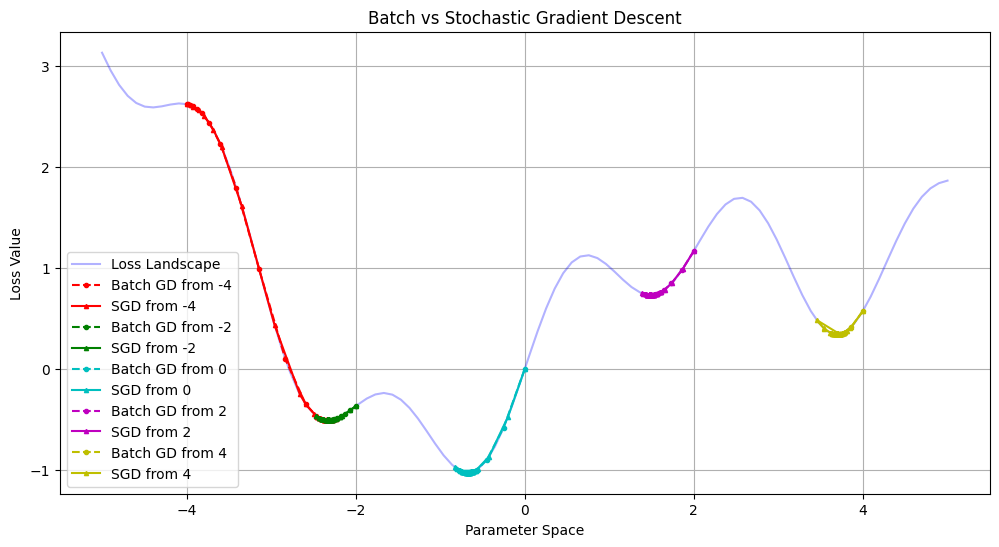

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def create_loss_landscape():
    """Create a loss landscape with multiple local minima"""
    x = np.linspace(-5, 5, 100)
    y = np.sin(x) + 0.5 * np.sin(3 * x) + 0.1 * x**2
    return x, y


def batch_gradient_descent(x_start, learning_rate, iterations):
    """Simulate batch gradient descent"""
    path = [x_start]
    x_current = x_start

    for _ in range(iterations):
        # Compute gradient (derivative of our function)
        gradient = np.cos(x_current) + 1.5 * np.cos(3 * x_current) + 0.2 * x_current
        # Update position
        x_current = x_current - learning_rate * gradient
        path.append(x_current)

    return np.array(path)


def stochastic_gradient_descent(x_start, learning_rate, iterations):
    """Simulate stochastic gradient descent with noise"""
    path = [x_start]
    x_current = x_start

    for _ in range(iterations):
        # Add random noise to the gradient
        noise = np.random.normal(0, 0.5)
        gradient = np.cos(x_current) + 1.5 * np.cos(3 * x_current) + 0.2 * x_current
        # Update position with noisy gradient
        x_current = x_current - learning_rate * (gradient + noise)
        path.append(x_current)

    return np.array(path)


# Create and plot the comparison
plt.figure(figsize=(12, 6))

# Create loss landscape
x, y = create_loss_landscape()
plt.plot(x, y, "b-", label="Loss Landscape", alpha=0.3)

# Run both optimizers from different starting points
start_points = [-4, -2, 0, 2, 4]
colors = ["r", "g", "c", "m", "y"]

for start_point, color in zip(start_points, colors):
    # Run batch gradient descent
    batch_path = batch_gradient_descent(start_point, 0.1, 50)
    plt.plot(
        batch_path,
        np.sin(batch_path) + 0.5 * np.sin(3 * batch_path) + 0.1 * batch_path**2,
        color=color,
        linestyle="--",
        marker="o",
        markersize=3,
        label=f"Batch GD from {start_point}",
    )

    # Run stochastic gradient descent
    sgd_path = stochastic_gradient_descent(start_point, 0.1, 50)
    plt.plot(
        sgd_path,
        np.sin(sgd_path) + 0.5 * np.sin(3 * sgd_path) + 0.1 * sgd_path**2,
        color=color,
        linestyle="-",
        marker="^",
        markersize=3,
        label=f"SGD from {start_point}",
    )

plt.title("Batch vs Stochastic Gradient Descent")
plt.xlabel("Parameter Space")
plt.ylabel("Loss Value")
plt.grid(True)
plt.legend()
plt.show()


The visualization shows several key differences:

1. **Path Behavior**:
   - Batch GD (dashed lines) takes smooth, predictable paths and often gets trapped in the nearest local minimum
   - SGD (solid lines) takes noisier paths but can jump out of local minima and explore more of the parameter space

2. **Convergence**:
   - Batch GD converges more precisely to the nearest minimum
   - SGD might not converge as precisely but is more likely to find better minima

3. **Exploration**:
   - Batch GD is like a cautious explorer who never deviates from the most obvious path
   - SGD is like an adventurous explorer who's willing to try different paths, sometimes finding better routes

This noise in SGD serves several important purposes:
- It adds energy to the system, helping it overcome small barriers
- It allows exploration of different regions of the parameter space
- It makes the algorithm more robust to different initial conditions

In practice, this means that SGD is often better at finding good solutions in complex optimization landscapes, especially in deep learning where there are many local minima. The noise acts as a form of regularization, often leading to solutions that generalize better to new data.

Would you like me to explain more about how we can control this noise level, or how modern variations like mini-batch gradient descent combine the benefits of both approaches?

Let me explain in depth why stochastic gradient descent (SGD) is better at avoiding local extrema compared to batch gradient descent. I'll break this down systematically and build from fundamental concepts to more complex insights.



```python
import numpy as np
import matplotlib.pyplot as plt

class OptimizationVisualizer:
    """
    Demonstrates how batch and stochastic gradient descent behave differently
    with respect to local minima
    """
    def __init__(self):
        # Create a complex loss landscape with multiple local minima
        self.x = np.linspace(-5, 5, 200)
        # Function with multiple local minima
        self.y = (np.sin(self.x) + 
                 0.5 * np.sin(3 * self.x) + 
                 0.25 * np.sin(5 * self.x) + 
                 0.1 * self.x**2)
    
    def gradient(self, x):
        """Compute the gradient at point x"""
        return (np.cos(x) + 
                1.5 * np.cos(3 * x) + 
                1.25 * np.cos(5 * x) + 
                0.2 * x)
    
    def batch_descent(self, start_point, learning_rate=0.1, iterations=100):
        """Simulate batch gradient descent"""
        path = [start_point]
        current = start_point
        
        for _ in range(iterations):
            # Compute exact gradient
            grad = self.gradient(current)
            # Update position using exact gradient
            current = current - learning_rate * grad
            path.append(current)
            
            # Check for convergence (gradient close to zero)
            if abs(grad) < 1e-5:
                break
                
        return np.array(path)
    
    def stochastic_descent(self, start_point, learning_rate=0.1, 
                          iterations=100, noise_scale=0.5):
        """Simulate stochastic gradient descent with controlled noise"""
        path = [start_point]
        current = start_point
        
        # Implement annealing schedule for noise
        noise_schedule = np.linspace(noise_scale, noise_scale/10, iterations)
        
        for i in range(iterations):
            # Add random noise to gradient
            noise = np.random.normal(0, noise_schedule[i])
            grad = self.gradient(current)
            # Update position using noisy gradient
            current = current - learning_rate * (grad + noise)
            path.append(current)
            
        return np.array(path)
    
    def visualize_comparison(self, start_points=[-4, -2, 0, 2, 4]):
        """Create comparative visualization of both methods"""
        plt.figure(figsize=(15, 8))
        
        # Plot loss landscape
        plt.plot(self.x, self.y, 'b-', alpha=0.3, label='Loss Landscape')
        
        # Plot optimization paths from different starting points
        colors = ['r', 'g', 'c', 'm', 'y']
        for start, color in zip(start_points, colors):
            # Run and plot batch gradient descent
            batch_path = self.batch_descent(start)
            plt.plot(batch_path, self.y[np.searchsorted(self.x, batch_path)],
                    f'{color}--o', markersize=4, alpha=0.7,
                    label=f'Batch GD from {start}')
            
            # Run and plot stochastic gradient descent
            sgd_path = self.stochastic_descent(start)
            plt.plot(sgd_path, self.y[np.searchsorted(self.x, sgd_path)],
                    f'{color}-^', markersize=4, alpha=0.7,
                    label=f'SGD from {start}')
        
        plt.title('Comparison of Batch vs Stochastic Gradient Descent')
        plt.xlabel('Parameter Space')
        plt.ylabel('Loss Value')
        plt.grid(True, alpha=0.3)
        plt.legend()
        return plt

# Create and show visualization
visualizer = OptimizationVisualizer()
visualizer.visualize_comparison()
plt.show()

```

Let me explain why stochastic gradient descent is better at escaping local minima through several key concepts:

1. The Nature of Optimization Landscapes

Think of the optimization landscape like a mountainous terrain. In machine learning, this terrain is created by our loss function, with hills and valleys representing higher and lower loss values. The global minimum is the lowest valley in this landscape, but there are many smaller valleys (local minima) along the way.

2. How Batch Gradient Descent Works

Batch gradient descent is like a very careful hiker who:
- Always looks at the entire landscape before taking a step
- Always moves in the direction of steepest descent
- Makes consistent, predictable movements
- Uses perfect information about the slope at each point

This careful approach has a significant drawback: when batch gradient descent reaches any valley (local minimum), it stops. This happens because:
- The gradient (slope) becomes zero or very close to zero
- All directions lead uphill
- The algorithm has no mechanism to explore beyond this point

3. How Stochastic Gradient Descent Works

Stochastic gradient descent is like a hiker who:
- Looks at only one random part of the landscape at a time
- Takes steps that aren't always in the perfect direction
- Makes noisy, unpredictable movements
- Uses imperfect, partial information about the slope

This seemingly less precise approach actually helps because:
- The noise in gradient estimates acts like small random pushes
- These random pushes can help escape shallow local minima
- The algorithm continues exploring even in valleys

4. The Role of Noise in SGD

The noise in SGD serves several crucial purposes:
- Adds energy to the system, helping overcome small barriers
- Allows exploration of different regions of the parameter space
- Prevents premature convergence to poor solutions
- Acts as a natural form of regularization

5. Mathematical Perspective

From a mathematical viewpoint, SGD's ability to escape local minima comes from:
- Variance in gradient estimates providing exploration energy
- Stochastic approximation of the true gradient
- Implicit momentum from the sequence of noisy updates
- Natural annealing as the algorithm progresses

6. Practical Benefits

In practice, SGD's properties lead to several advantages:
- Better generalization to new data
- More robust solutions
- Faster training in many cases
- Ability to handle large datasets efficiently

7. Real-world Analogy

Think of it like trying to find the lowest point in a dark room by feeling the floor:
- Batch gradient descent is like taking careful steps always downward
- SGD is like occasionally stumbling or taking slightly wrong steps
- Those "stumbles" in SGD might help you find an even lower point you would have missed with careful steps

Would you like me to elaborate on any of these aspects? For instance, we could explore how to control the amount of noise in SGD, or how modern variations like mini-batch gradient descent combine the benefits of both approaches?

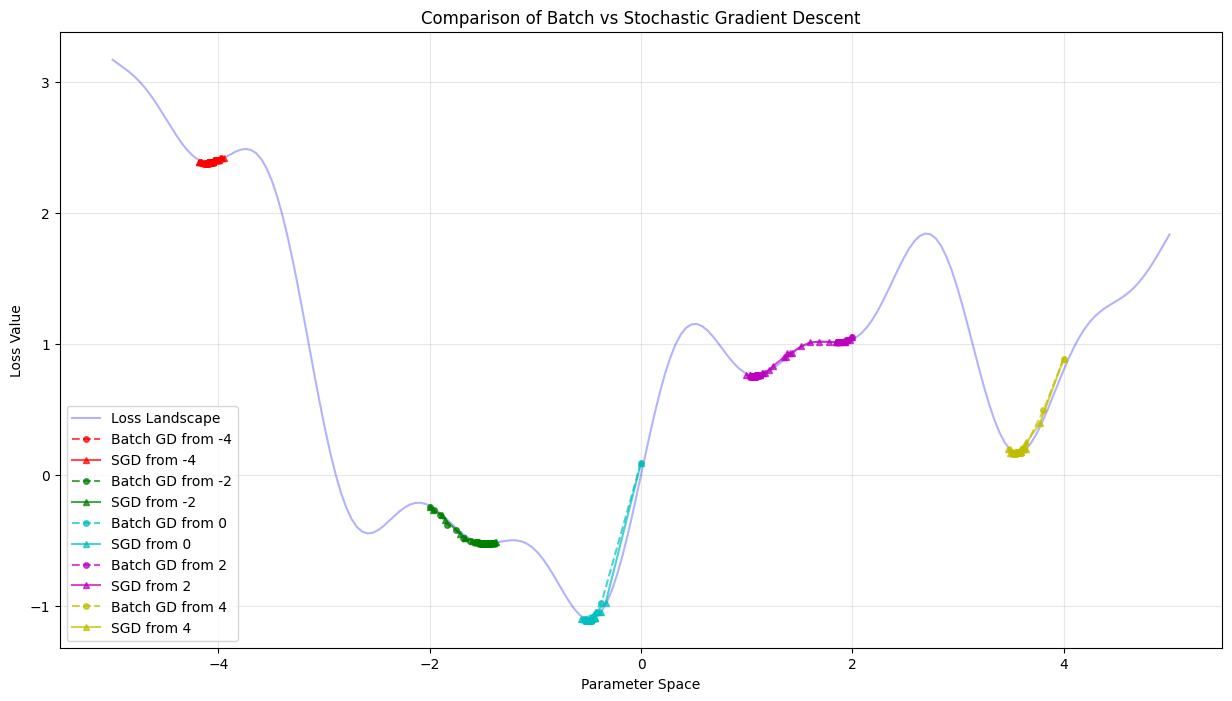

In [2]:
import numpy as np
import matplotlib.pyplot as plt


class OptimizationVisualizer:
    """
    Demonstrates how batch and stochastic gradient descent behave differently
    with respect to local minima
    """

    def __init__(self):
        # Create a complex loss landscape with multiple local minima
        self.x = np.linspace(-5, 5, 200)
        # Function with multiple local minima
        self.y = (
            np.sin(self.x)
            + 0.5 * np.sin(3 * self.x)
            + 0.25 * np.sin(5 * self.x)
            + 0.1 * self.x**2
        )

    def gradient(self, x):
        """Compute the gradient at point x"""
        return np.cos(x) + 1.5 * np.cos(3 * x) + 1.25 * np.cos(5 * x) + 0.2 * x

    def batch_descent(self, start_point, learning_rate=0.1, iterations=100):
        """Simulate batch gradient descent"""
        path = [start_point]
        current = start_point

        for _ in range(iterations):
            # Compute exact gradient
            grad = self.gradient(current)
            # Update position using exact gradient
            current = current - learning_rate * grad
            path.append(current)

            # Check for convergence (gradient close to zero)
            if abs(grad) < 1e-5:
                break

        return np.array(path)

    def stochastic_descent(
        self, start_point, learning_rate=0.1, iterations=100, noise_scale=0.5
    ):
        """Simulate stochastic gradient descent with controlled noise"""
        path = [start_point]
        current = start_point

        # Implement annealing schedule for noise
        noise_schedule = np.linspace(noise_scale, noise_scale / 10, iterations)

        for i in range(iterations):
            # Add random noise to gradient
            noise = np.random.normal(0, noise_schedule[i])
            grad = self.gradient(current)
            # Update position using noisy gradient
            current = current - learning_rate * (grad + noise)
            path.append(current)

        return np.array(path)

    def visualize_comparison(self, start_points=[-4, -2, 0, 2, 4]):
        """Create comparative visualization of both methods"""
        plt.figure(figsize=(15, 8))

        # Plot loss landscape
        plt.plot(self.x, self.y, "b-", alpha=0.3, label="Loss Landscape")

        # Plot optimization paths from different starting points
        colors = ["r", "g", "c", "m", "y"]
        for start, color in zip(start_points, colors):
            # Run and plot batch gradient descent
            batch_path = self.batch_descent(start)
            plt.plot(
                batch_path,
                self.y[np.searchsorted(self.x, batch_path)],
                f"{color}--o",
                markersize=4,
                alpha=0.7,
                label=f"Batch GD from {start}",
            )

            # Run and plot stochastic gradient descent
            sgd_path = self.stochastic_descent(start)
            plt.plot(
                sgd_path,
                self.y[np.searchsorted(self.x, sgd_path)],
                f"{color}-^",
                markersize=4,
                alpha=0.7,
                label=f"SGD from {start}",
            )

        plt.title("Comparison of Batch vs Stochastic Gradient Descent")
        plt.xlabel("Parameter Space")
        plt.ylabel("Loss Value")
        plt.grid(True, alpha=0.3)
        plt.legend()
        return plt


# Create and show visualization
visualizer = OptimizationVisualizer()
visualizer.visualize_comparison()
plt.show()

Stochastic Gradient Descent (SGD) and Batch Gradient Descent (BGD) behave differently when optimizing a loss function because of how they compute gradients. The key difference lies in the **deterministic** nature of BGD versus the **randomized** nature of SGD, which affects their ability to escape **local extrema** (minima or saddle points). Let's dive deeper into this, covering all aspects:

---

### 1. **Key Concepts: Local Extrema and Saddle Points**
- **Local Extrema**: A point on the loss surface where the gradient is zero, and the loss is smaller (local minima) or larger (local maxima) compared to its immediate neighbors.
- **Saddle Points**: A flat point where the gradient is zero, but the loss curves upward in some directions and downward in others. It's not a true minimum or maximum.

---

### 2. **Batch Gradient Descent (BGD)**
#### How It Works:
- Computes the gradient of the loss function using the **entire dataset**:
  \[
  \nabla L(\theta) = \frac{1}{N} \sum_{i=1}^N \nabla L_i(\theta)
  \]
  where \( N \) is the total number of data points, \( \theta \) are the model parameters, and \( L_i(\theta) \) is the loss for the \( i \)-th data point.
- Updates parameters in the direction of the **average gradient**:
  \[
  \theta = \theta - \eta \nabla L(\theta)
  \]
  where \( \eta \) is the learning rate.

#### Behavior at Local Extrema:
- At a **local minima** or **saddle point**, the average gradient \( \nabla L(\theta) \) becomes zero (or very close to zero).
- Since BGD relies on the average gradient over the dataset, it has no way to escape these points once the gradient is zero.
- BGD is **deterministic**, meaning the gradient points exactly in the direction of the steepest descent based on the entire dataset, which makes it unable to "explore" other directions.

---

### 3. **Stochastic Gradient Descent (SGD)**
#### How It Works:
- Computes the gradient using a **single randomly selected data point** (or a small subset, in mini-batch SGD):
  \[
  \nabla L(\theta) = \nabla L_i(\theta)
  \]
  where \( i \) is chosen randomly at each step.
- Updates parameters using this noisy gradient:
  \[
  \theta = \theta - \eta \nabla L_i(\theta)
  \]

#### Behavior at Local Extrema:
- **Randomness in Gradients**:
  - Even at a local minima or saddle point for the full dataset, the gradient computed for individual data points (\( \nabla L_i(\theta) \)) is not necessarily zero because the loss function for individual data points may still vary.
  - This randomness allows SGD to "jitter" around and potentially escape local extrema.

- **Escape from Saddle Points**:
  - Saddle points are often flat in some directions and steep in others. The random gradient from a single data point can nudge the parameters away from the flat region, leading to exploration of new areas on the loss surface.

---

### 4. **Comparison: Why SGD Avoids Getting Stuck**

| Aspect                 | Batch Gradient Descent (BGD)                | Stochastic Gradient Descent (SGD)           |
|------------------------|---------------------------------------------|---------------------------------------------|
| **Gradient Calculation** | Uses the full dataset, deterministic.       | Uses a single/random subset, noisy.         |
| **Behavior at Local Minima** | Gradient becomes zero; cannot escape.      | Noisy gradients allow movement.             |
| **Behavior at Saddle Points** | Gradient is zero; remains stuck.          | Random gradients push parameters away.      |
| **Exploration**        | Deterministic; limited exploration.          | Randomness enables exploration.             |
| **Efficiency**         | Slower for large datasets.                  | Faster due to smaller gradient computations.|

---

### 5. **Mathematical Intuition**

- **BGD at Local Minima**:
  At a local minima, the gradient:
  \[
  \nabla L(\theta) = \frac{1}{N} \sum_{i=1}^N \nabla L_i(\theta) = 0
  \]
  Since the average gradient is zero, BGD stops updating the parameters.

- **SGD at Local Minima**:
  For individual data points, the gradient:
  \[
  \nabla L_i(\theta) \neq 0
  \]
  Even if the average gradient is zero, the gradients of individual data points vary due to randomness, allowing updates to continue.

- **Saddle Points**:
  - At a saddle point, the loss surface is flat in some directions and steep in others.
  - BGD computes the average gradient, which is zero in all directions at the saddle point.
  - SGD, however, computes gradients based on individual data points. The random gradients may have a non-zero component in a direction that escapes the saddle point.

---

### 6. **Geometric Intuition**
- **BGD**:
  Imagine a ball rolling down a smooth valley. If the valley flattens (local minima or saddle point), the ball stops moving because there's no slope to guide it.

- **SGD**:
  The ball is shaken randomly as it rolls. Even if the valley flattens, the shaking causes the ball to explore other areas, potentially finding a steeper slope to descend.

---

### 7. **Practical Implications**
1. **Global Minima vs Local Minima**:
   - SGD's randomness increases the likelihood of escaping local minima, helping the optimizer move toward a global minima.

2. **Learning Rate**:
   - A larger learning rate in SGD increases the exploration but may overshoot minima. A smaller learning rate improves stability but reduces the ability to escape local extrema.

3. **Mini-Batch SGD**:
   - Combines the benefits of both BGD and SGD by computing gradients over small batches of data. This reduces noise compared to SGD while retaining some randomness for exploration.

---

### 8. **Real-Life Example**
- **BGD**: 
  Imagine following a map to the shortest route (deterministic). If a road is blocked (local minima), you stop and can’t proceed.

- **SGD**: 
  Imagine taking a random walk through the city. If you encounter a blocked road, you randomly choose another path, eventually finding an alternate route to your destination.

---

### 9. **Key Takeaways**
- **BGD** computes gradients over the entire dataset, making it deterministic and prone to getting stuck at local extrema or saddle points.
- **SGD** uses noisy gradients from individual data points, introducing randomness that allows it to escape local minima and saddle points.
- This behavior makes SGD more robust for non-convex optimization problems, such as training deep neural networks.